<a href="https://colab.research.google.com/github/kua5269/requests_OpenCV/blob/main/20220818.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

載入函式庫：

*   [OpenCV](https://opencv.org/) -> 影像處理
*   [NumPy](https://numpy.org/) -> 矩陣運算

Colab專用：

*   IPython.display
*   google.colab.patches


In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

**讀取並顯示圖片**

* 1 => 一般(不含透明度)
* -1 => 完整(包含透明度)
* 0 => 灰階

In [ ]:
m0 = cv2.imread("m0.jpg",1) 
print(m0) # m0為一個矩陣變數
print('維度', m0.shape)
print('高：', m0.shape[0])
print('寬：', m0.shape[1])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
維度 (701, 991, 3)
高： 701
寬： 991


**色彩空間的轉換** -> 預設讀取進來的圖片皆為RGB

Colab專用指令：cv2_imshow(圖片變數)

Note: 同樣的維度才能做運算！

初始彩色維度 (701, 991, 3)
彩色轉灰階維度 (701, 991)
灰階轉彩色維度 (701, 991, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


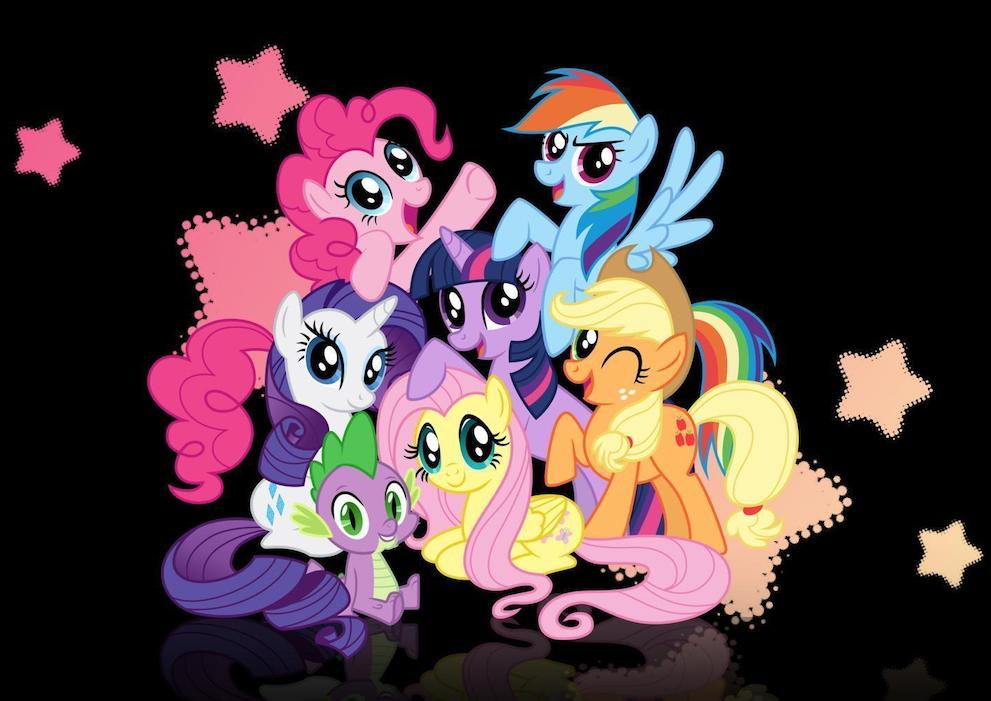

In [ ]:
m0 = cv2.imread("m0.jpg",1) 
print('初始彩色維度', m0.shape)
m1 = cv2.cvtColor(m0, cv2.COLOR_BGR2GRAY)
print('彩色轉灰階維度', m1.shape)
m1 = cv2.cvtColor(m1, cv2.COLOR_GRAY2BGR) # 顏色並不會改變，但色彩空間會多一維。
print('灰階轉彩色維度', m1.shape) 
print(m1) # 灰階是沒有第三維的，故多塞入一維與前兩維一樣的值用於提高增一維度！

# 一般指令 cv2.imshow()
cv2_imshow(m0) 


**壓縮儲存圖片**：

1. PNG => 支援透明色(陣列的第三維的第四個值會當作透明色值) -> 檔案較大
2. JPG => 不支援透明色，但可調整壓縮率 -> 檔案較小

In [ ]:
cv2.imwrite("photo1.png", m0)
cv2.imwrite("photo2.jpg", m0, [cv2.IMWRITE_JPEG_QUALITY,0])
cv2.imwrite("photo3.jpg", m0, [cv2.IMWRITE_JPEG_QUALITY,100])

True

**建立圖片** -> OpenCV靠NumPy陣列來記錄圖像資訊 -> 只要建個NumPy陣列就等於建立一個圖像

基本上各個色彩空間都是8bit！

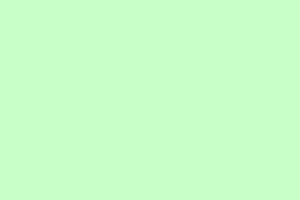

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

# 建立一張圖片(藍、綠、紅)
m0 = np.full((200, 300, 3), (200,255,200), np.uint8)
# print(m0)
# imshow()成像只支援RGB -> 若矩陣數值超過255則會爆掉輪迴值來顯示
cv2_imshow(m0)

**繪圖**：座標點都只能是Tuple類型

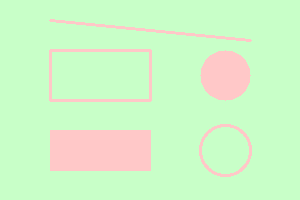

In [ ]:
cv2.line(m0, (50,20), (250,40), (200,200,255), 2)
cv2.rectangle(m0, (50,50), (150,100), (200,200,255), 2)
cv2.rectangle(m0, (50,130), (150,170), (200,200,255), -1)
cv2.circle(m0, (225,150), 25, (200,200,255), 2)
cv2.circle(m0, (225,75), 25, (200,200,255), -1)
cv2_imshow(m0) 

**寫字**：[PIL函式庫](https://pypi.org/project/Pillow/) <- 可支援TTF字型

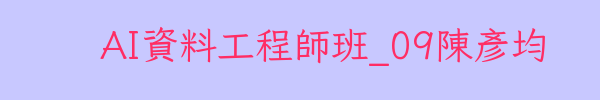

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image
import io

# 建立文字，須先上傳字型檔案.ttf
m0 = np.full((100, 600, 3), (255,200,200), np.uint8)
m1 = Image.fromarray(m0)
ImageDraw.Draw(m1).text((100,25), 'AI資料工程師班_09陳彥均', (100,45,255), ImageFont.truetype('Iansui.ttf', 38))
m1 = np.array(m1)
cv2_imshow(m1)

**製作動畫** -> 多張圖片連續播放 -> 以下為Colab指令
* 清除畫面：dp.clear_output(等待新輸出與否)
* 等待時間：time.sleep(秒數)

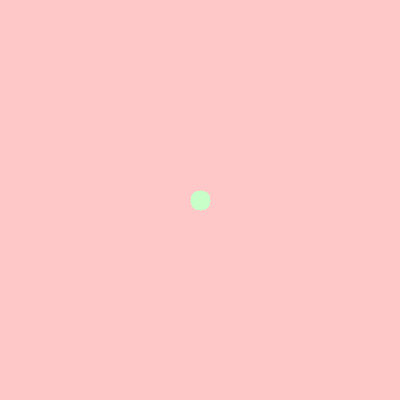

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

for r in range(5,200, 2):
    dp.clear_output(True)
    m0 = np.full((400, 400, 3), (200,200,255), np.uint8)
    cv2.circle(m0, (200,200), r, (200,255,200), -1)
    cv2_imshow(m0)
    time.sleep(0.5)

time.sleep(2)

for r in range(200,5, -5):
    dp.clear_output(True)
    m0 = np.full((400, 400, 3), (200,200,255), np.uint8)
    cv2.circle(m0, (200,200), r, (200,255,200), -1)
    cv2_imshow(m0)
    time.sleep(0.2)

**影片儲存** -> 建立變數 -> 格式設定 -> 寫入影格 -> 釋放變數

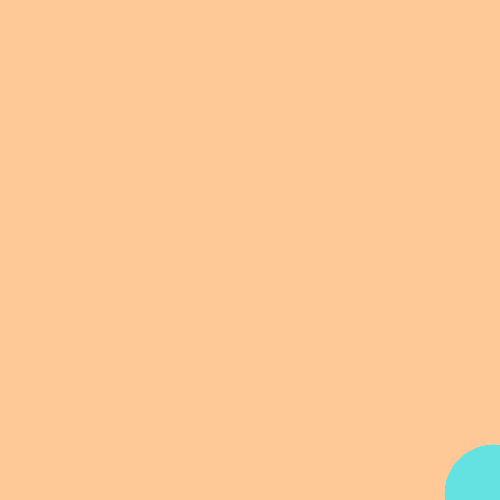

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

p1 = cv2.VideoWriter('v1.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 60, (500, 500))
for r in range(5,495, 1):
    dp.clear_output(True)
    m0 = np.full((500, 500, 3), (150,200,255), np.uint8)
    cv2.circle(m0, (r,r), 50, (225,225,100), -1)
    cv2_imshow(m0)
    time.sleep(0.2)
    p1.write(m0)
p1.release()

將影片格式轉檔，因在Web播放必須同時有畫面與音檔，缺一不可，故加上空音軌後才能正常播放。

In [ ]:
!ffmpeg -i v1.mp4 -vcodec libx264 v2.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

在colab顯示**播放影片** -> 經過上面的轉檔才可以讀取再藉由網頁播放出來

In [ ]:
import base64
import codecs
import IPython.display as dp

with codecs.open("v2.mp4","rb") as f:
    b1 = base64.b64encode(f.read()).decode()
dp.HTML(
f'<video src="data:video/mp4;base64,{b1}" controls />'
)

把影片讀出來變成一張張動畫並全部顯示。

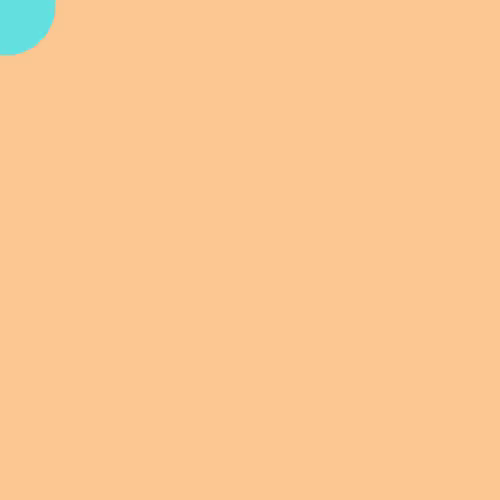

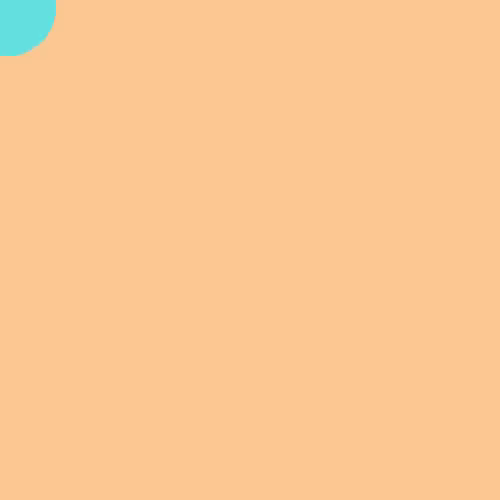

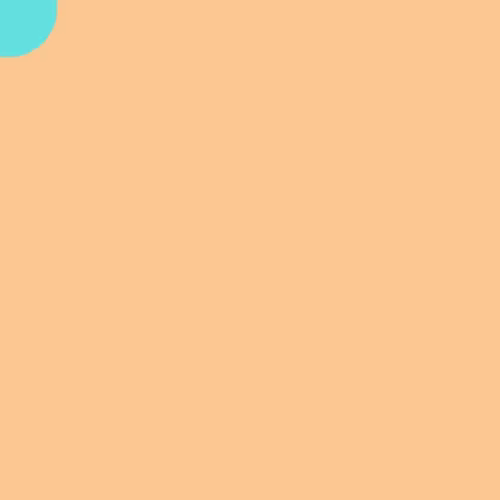

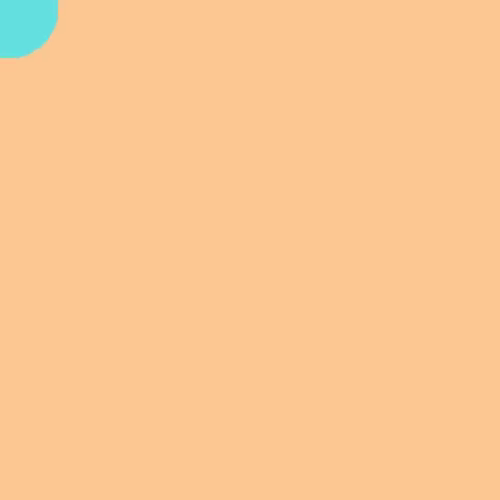

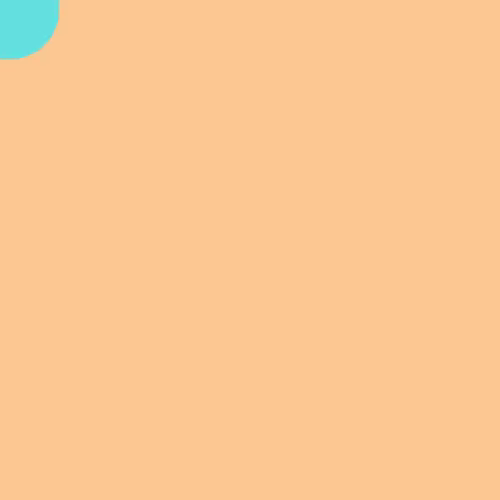

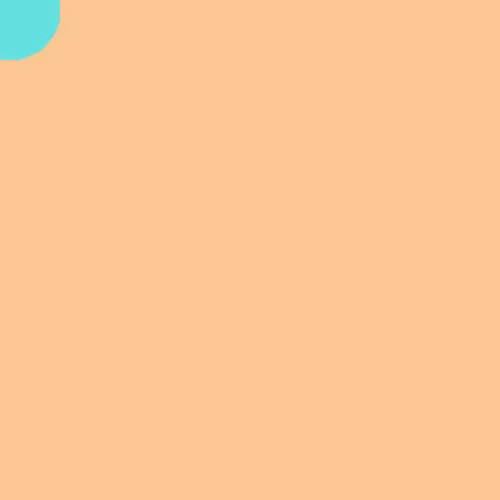

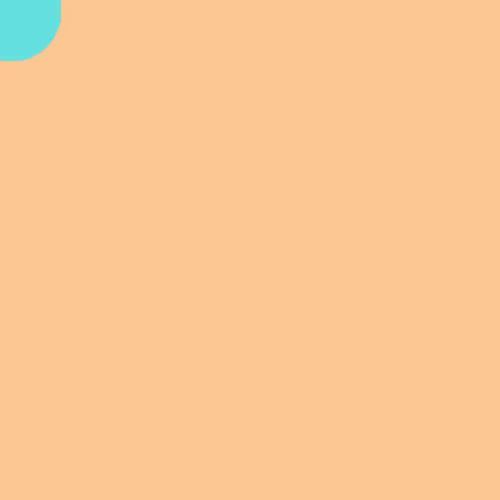

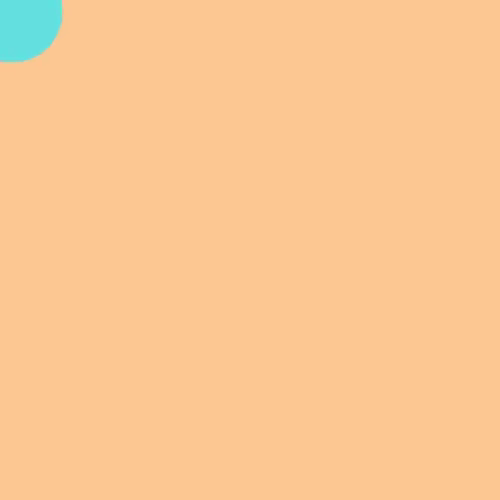

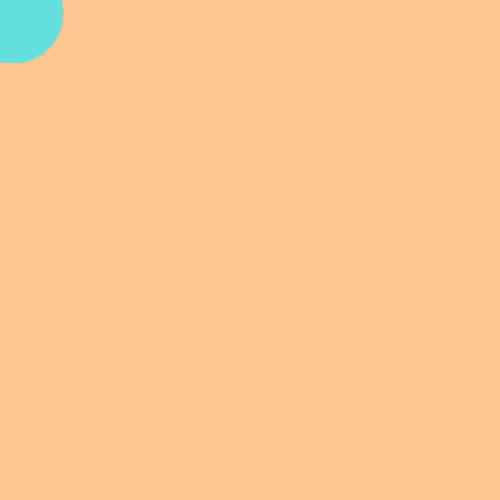

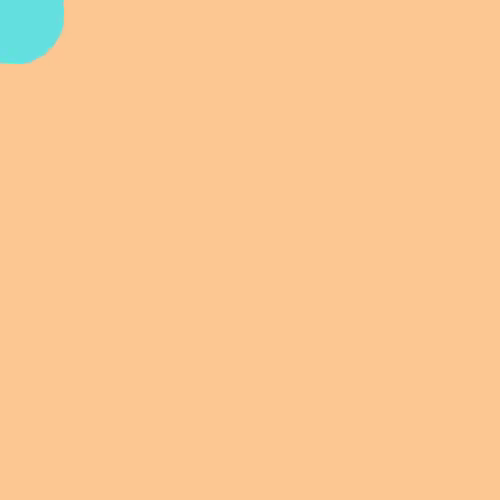

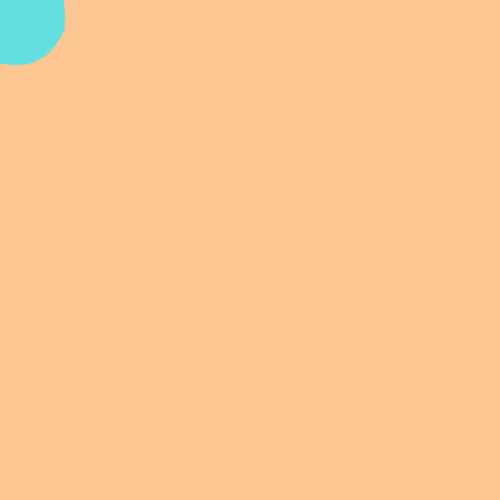

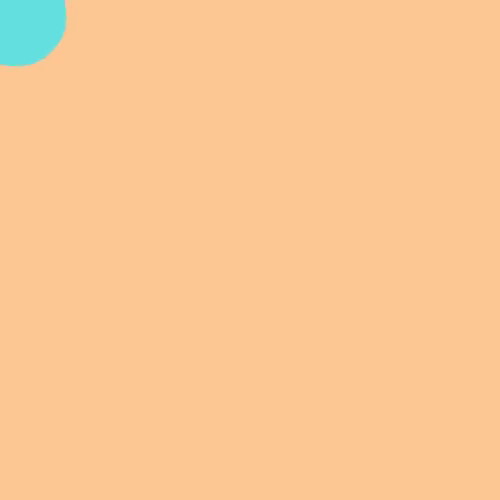

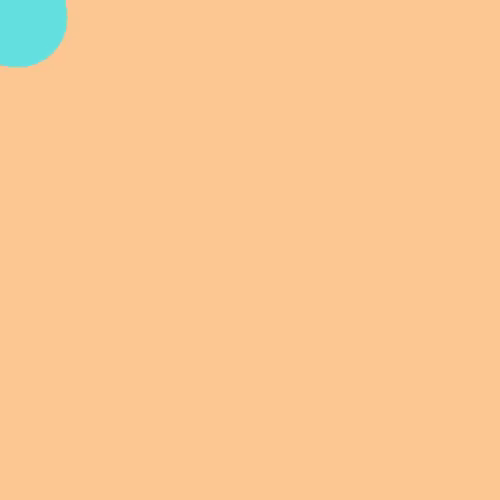

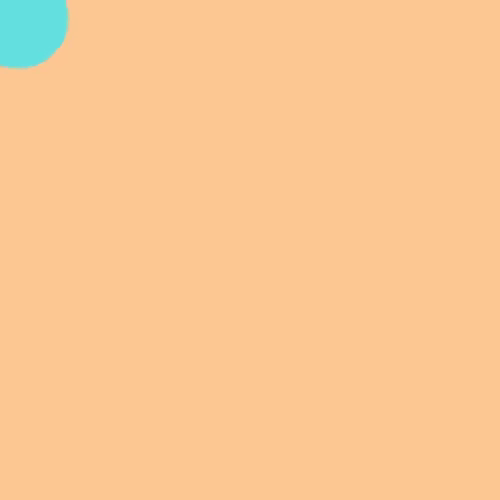

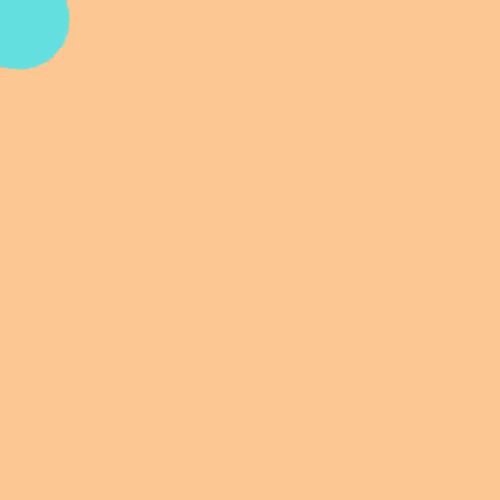

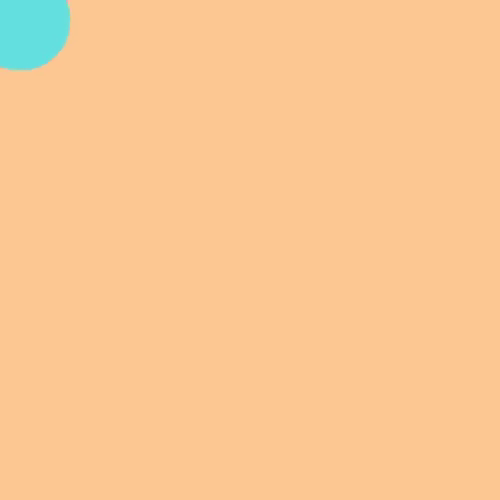

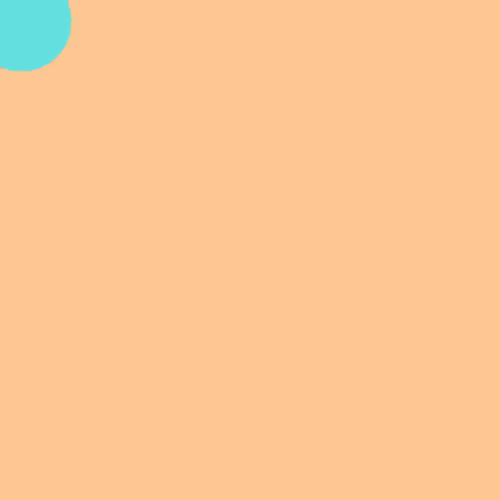

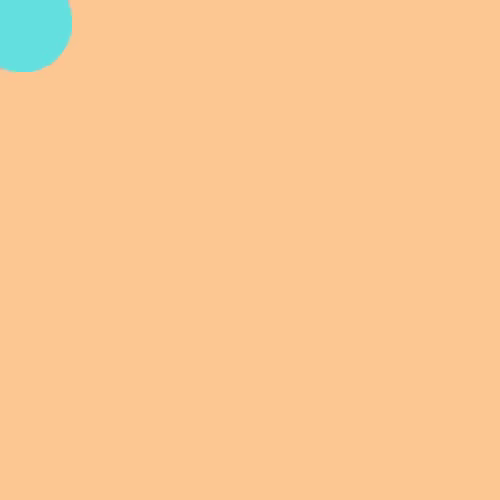

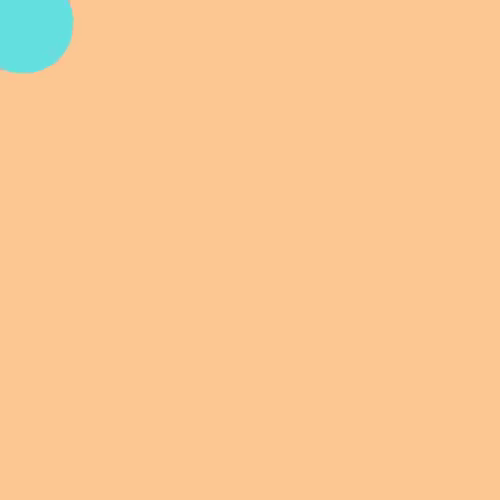

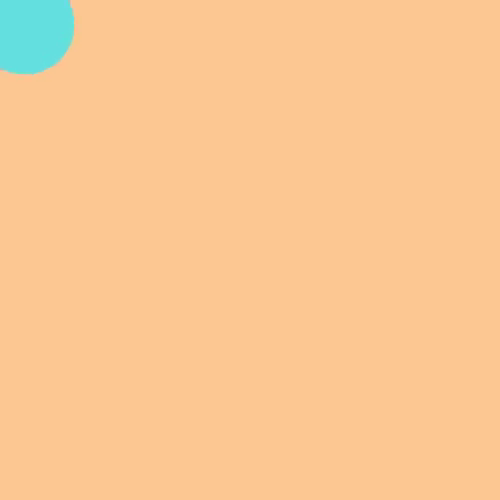

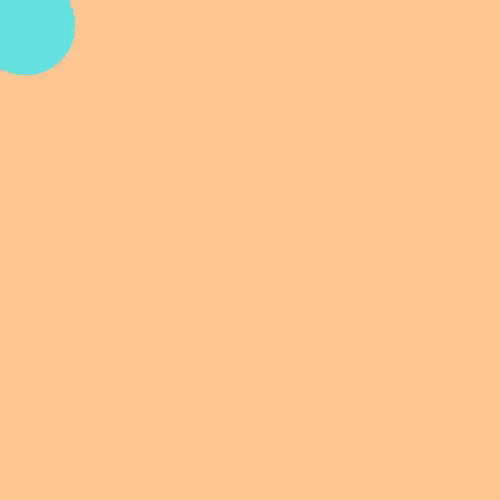

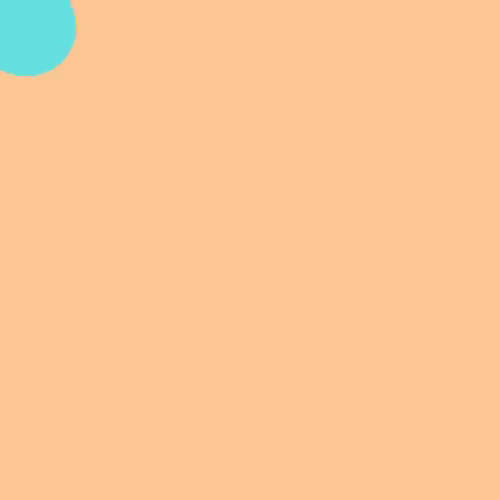

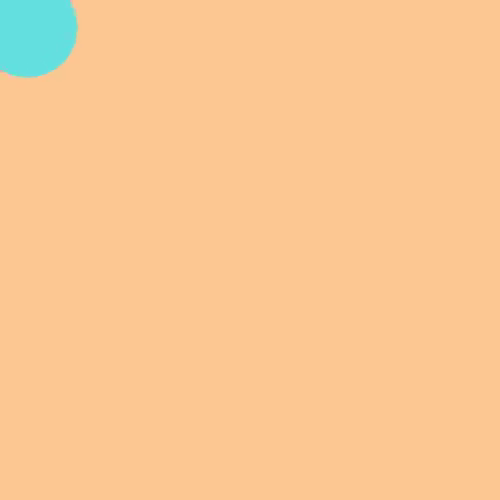

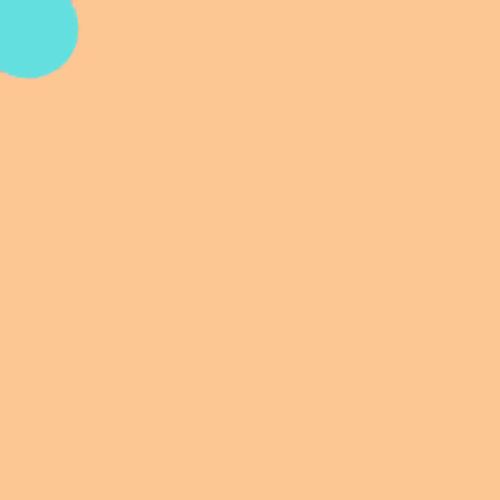

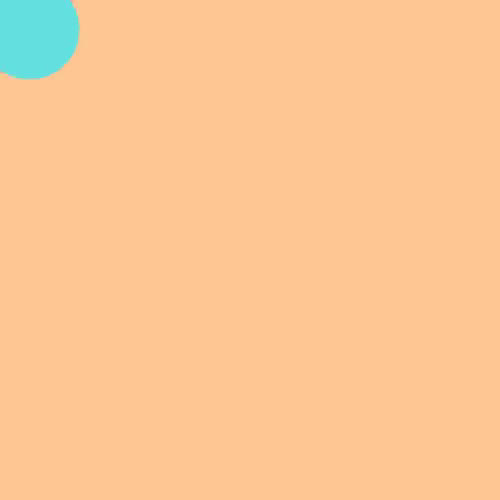

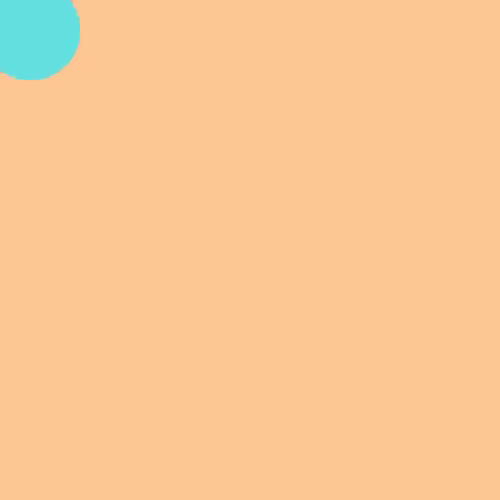

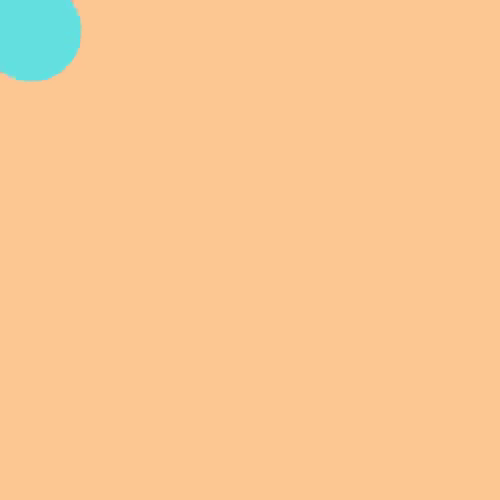

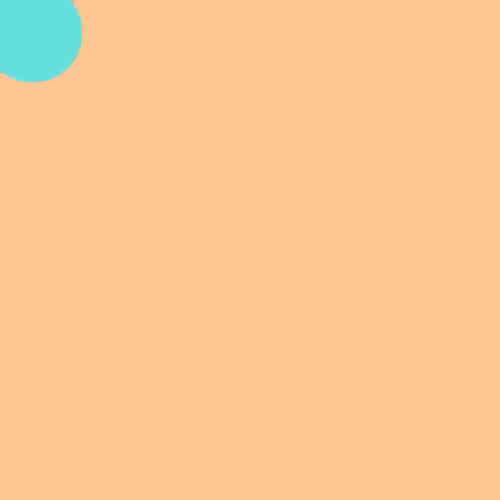

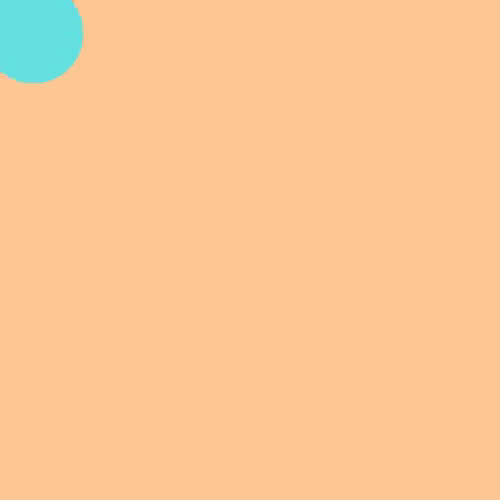

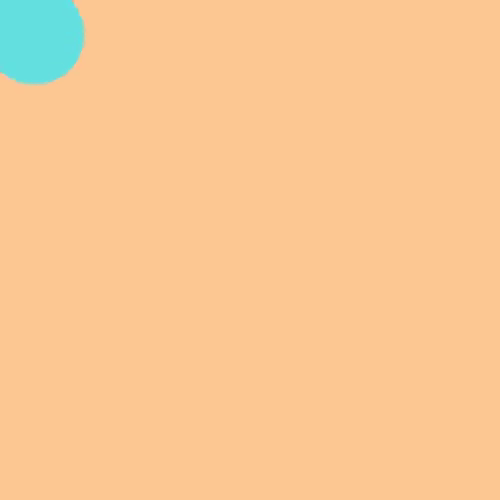

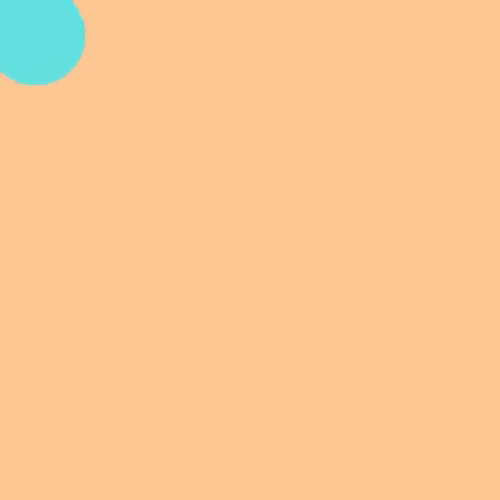

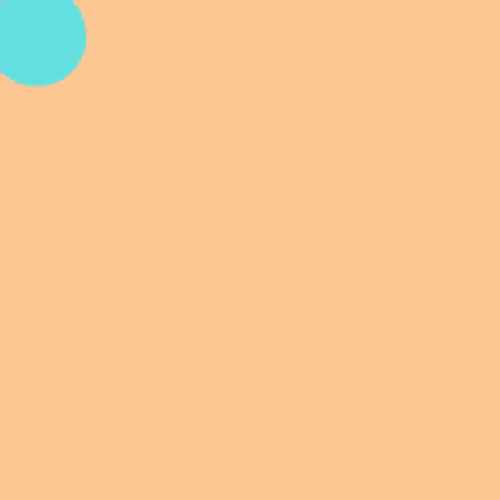

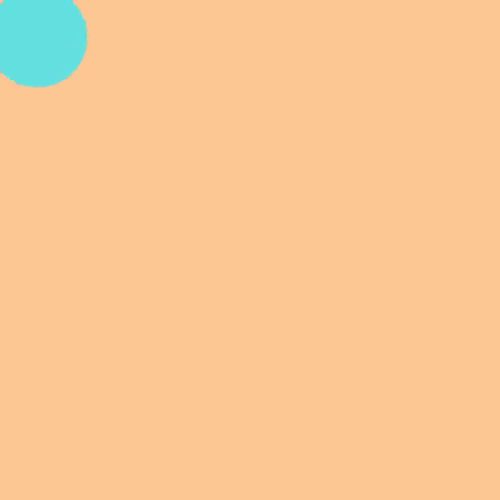

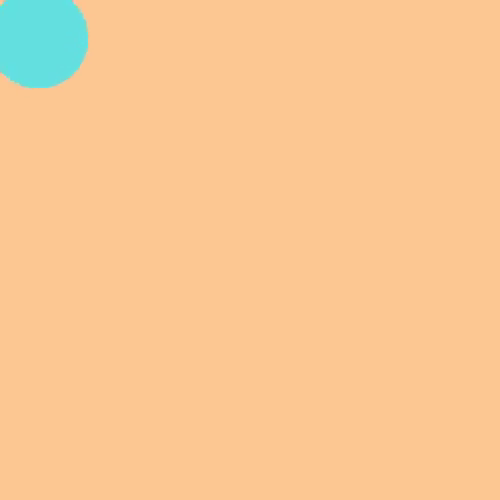

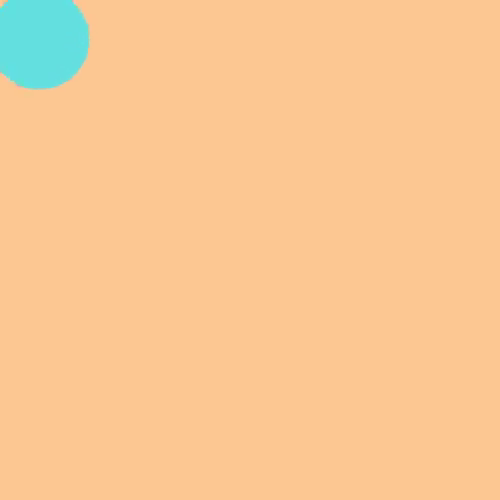

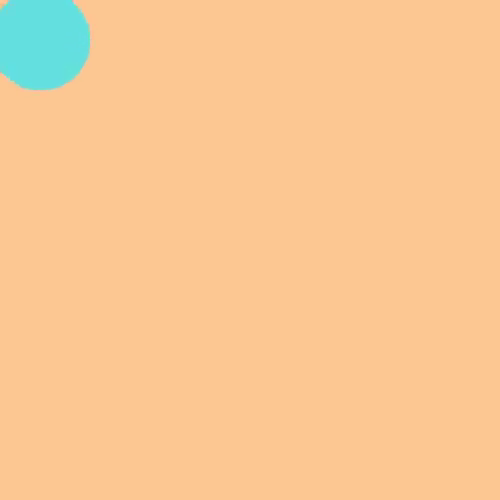

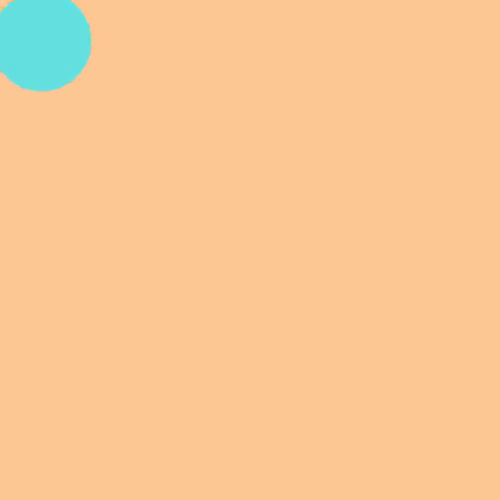

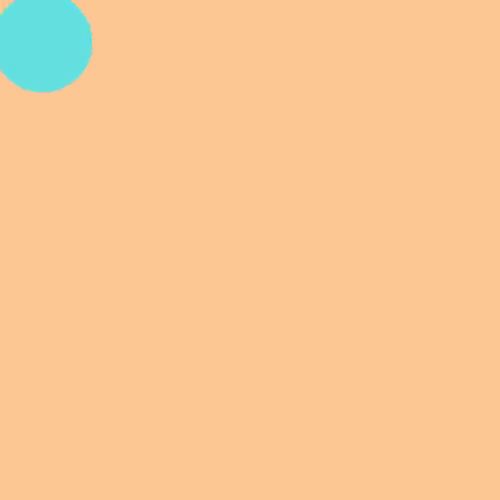

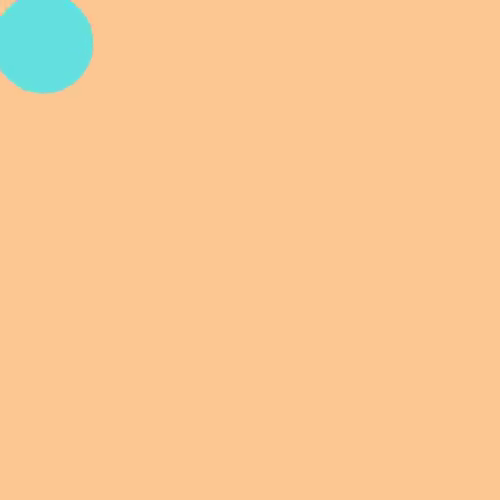

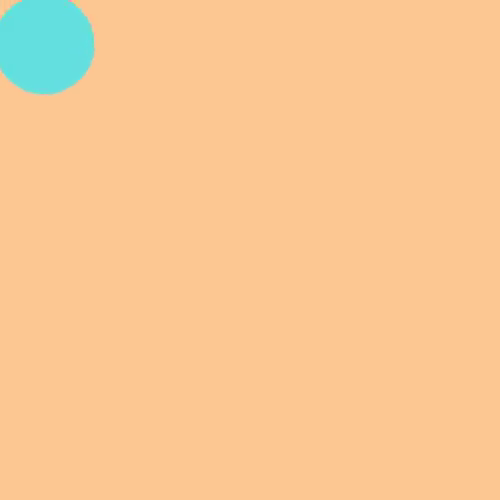

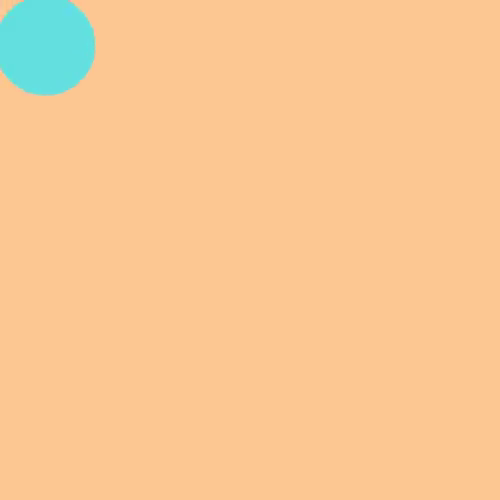

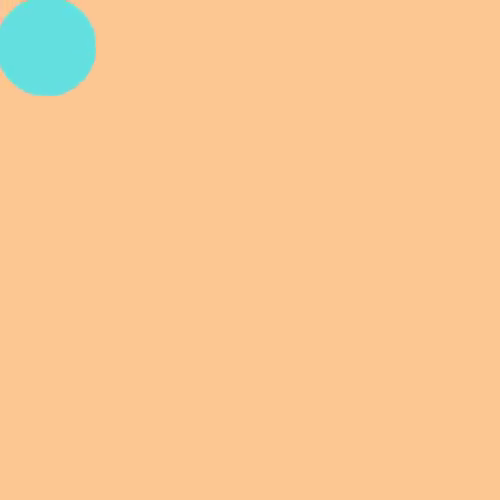

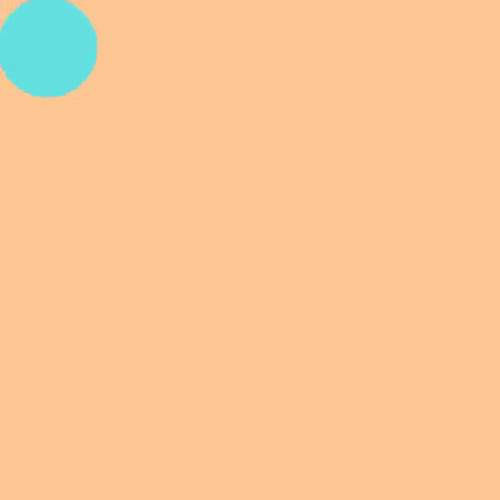

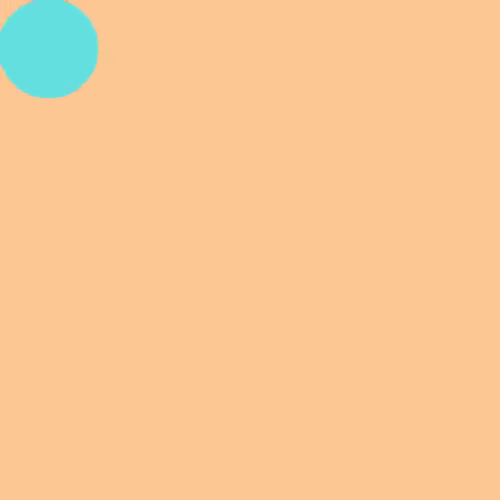

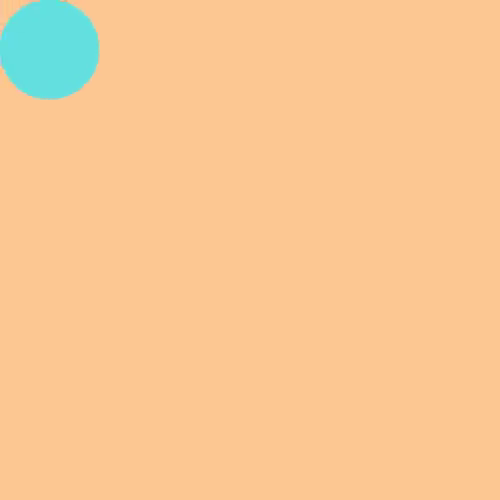

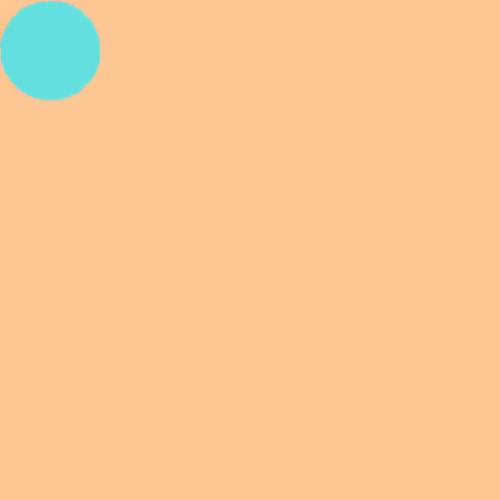

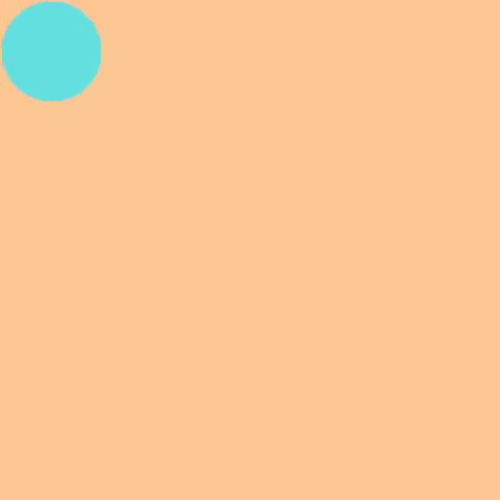

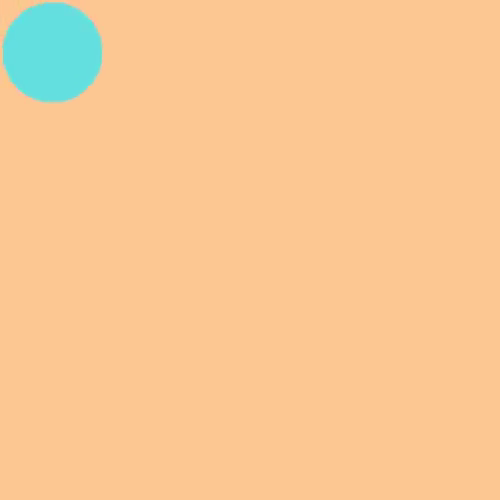

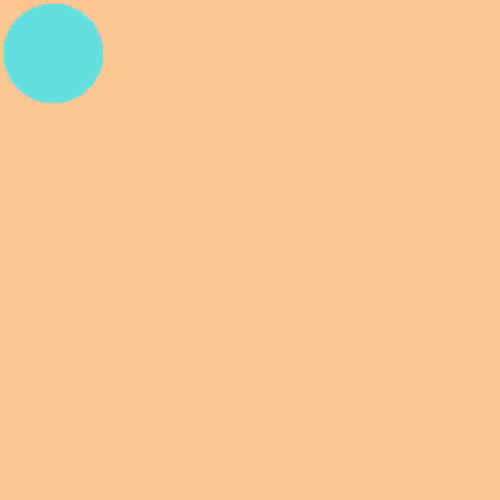

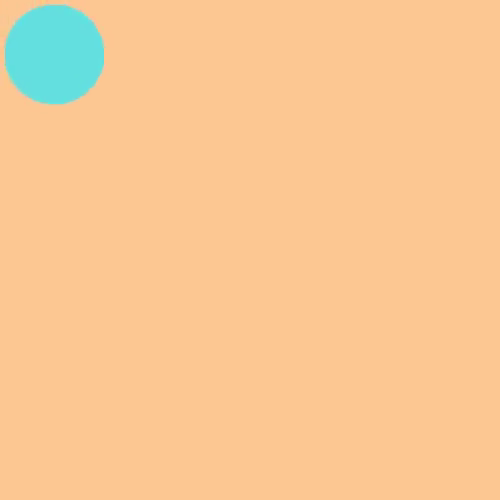

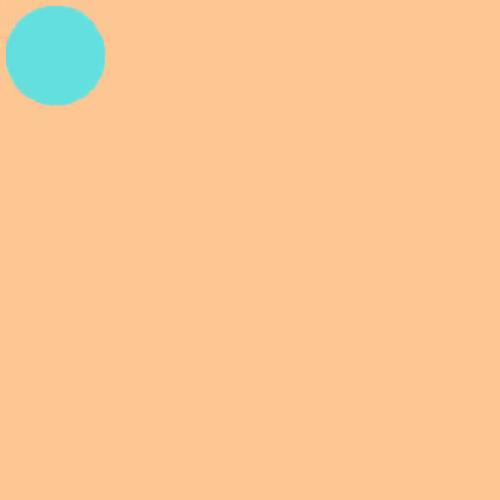

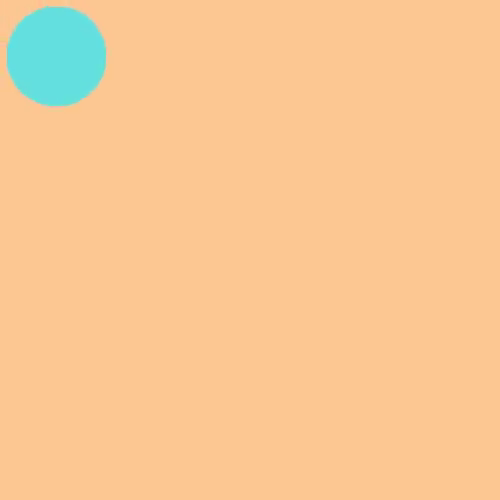

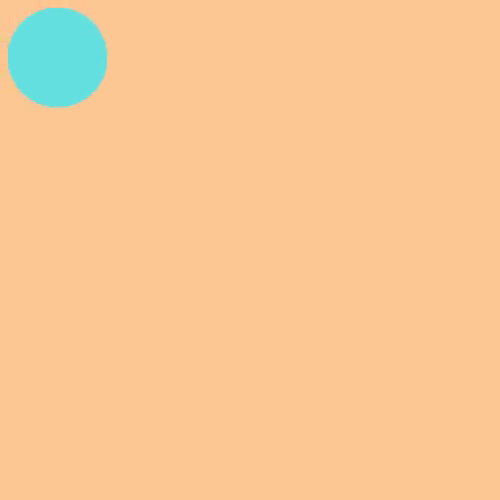

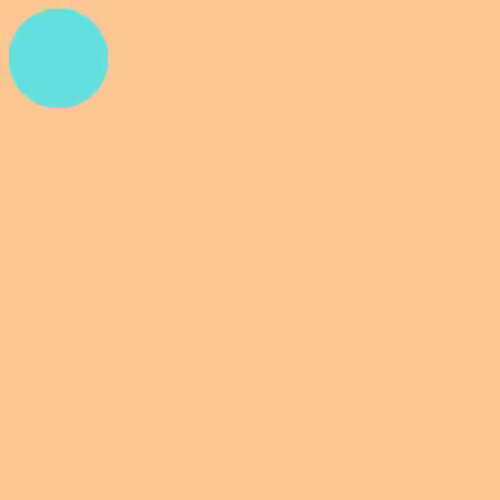

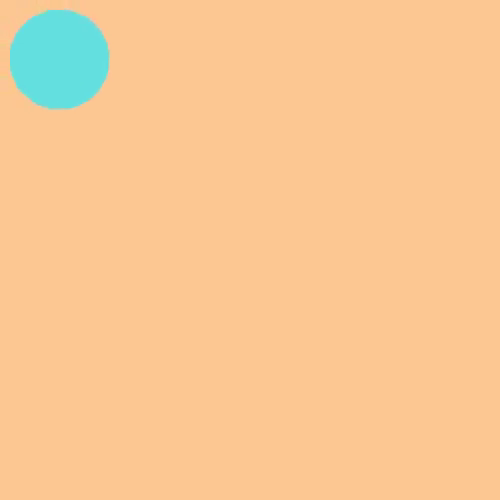

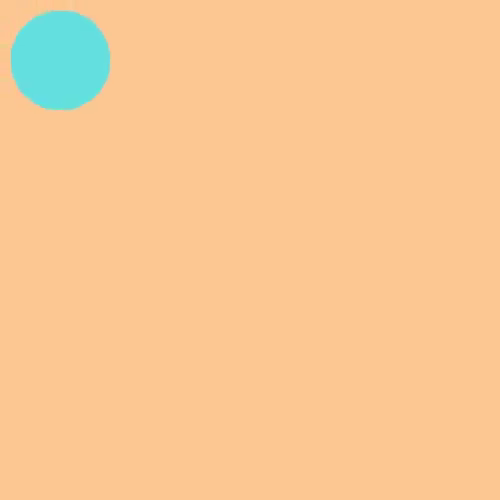

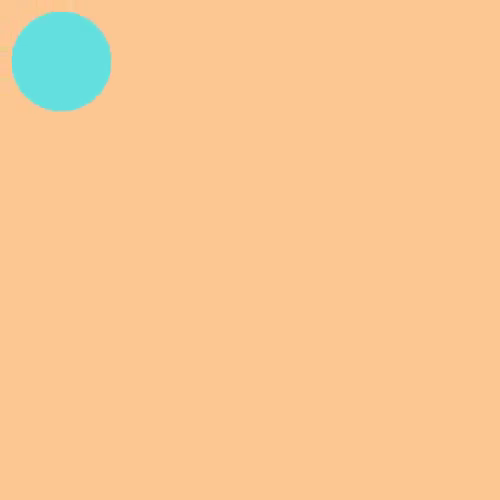

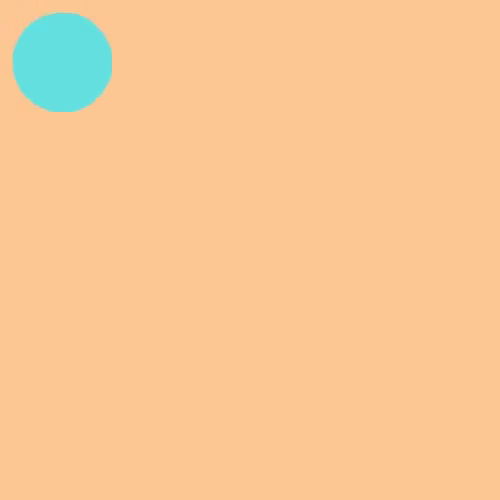

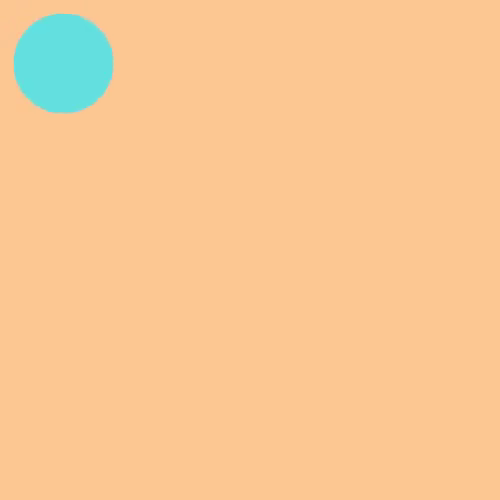

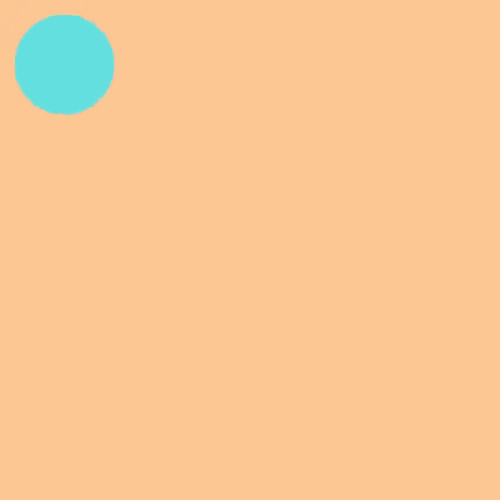

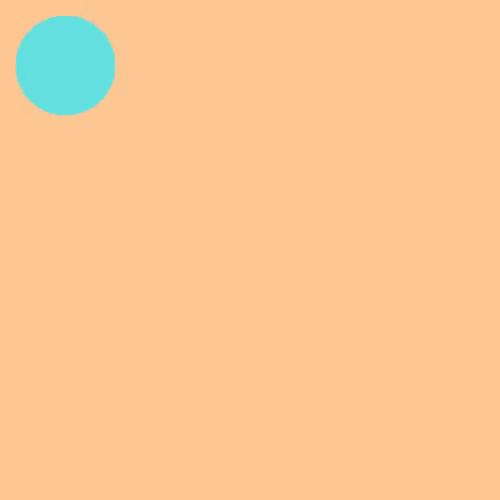

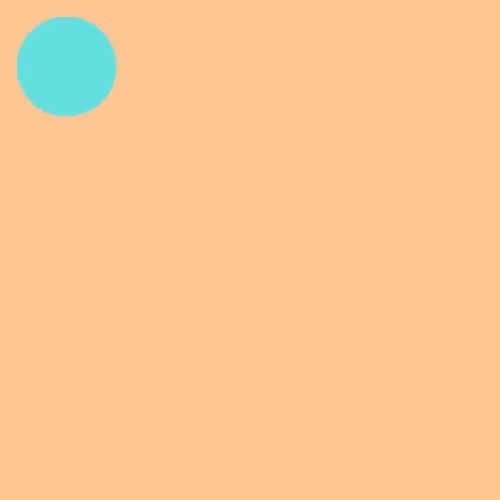

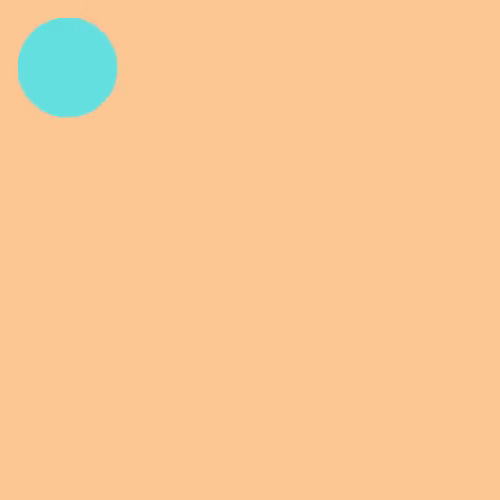

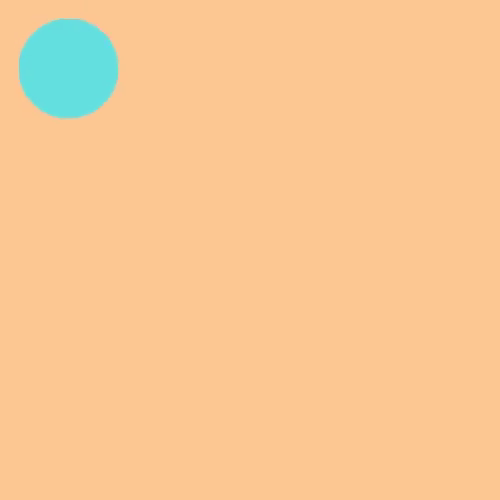

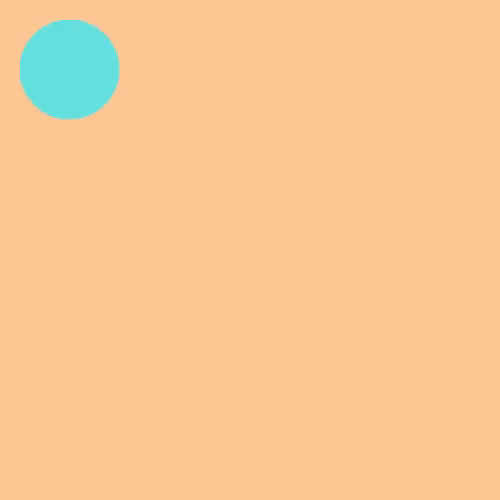

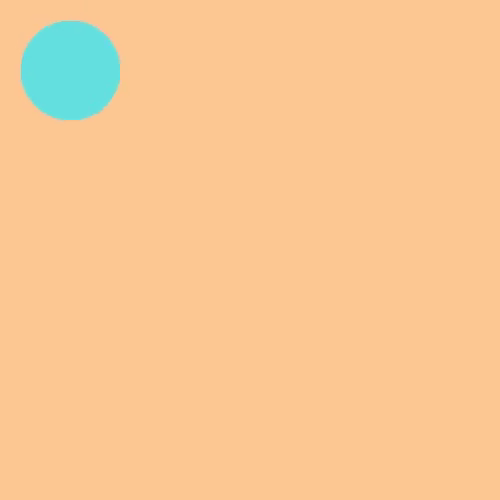

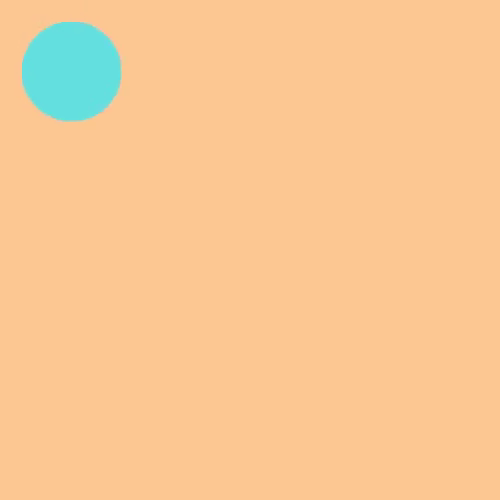

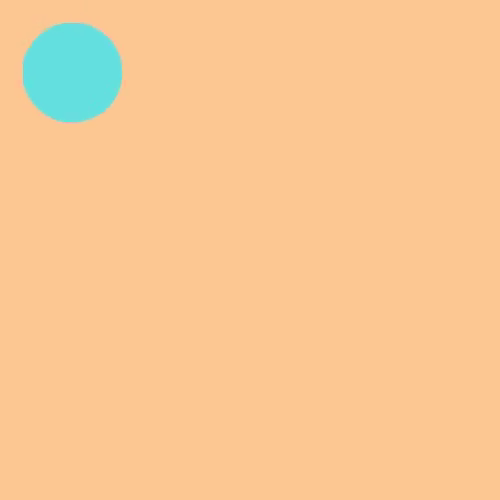

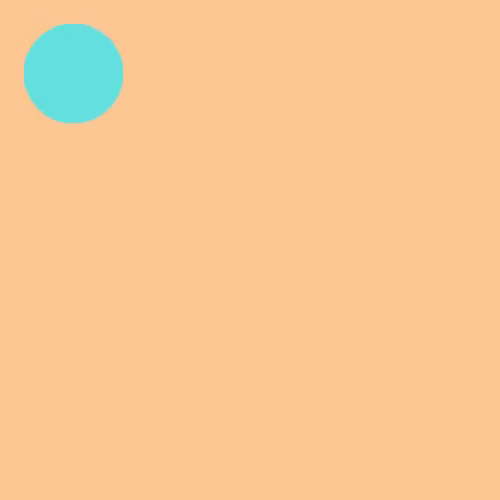

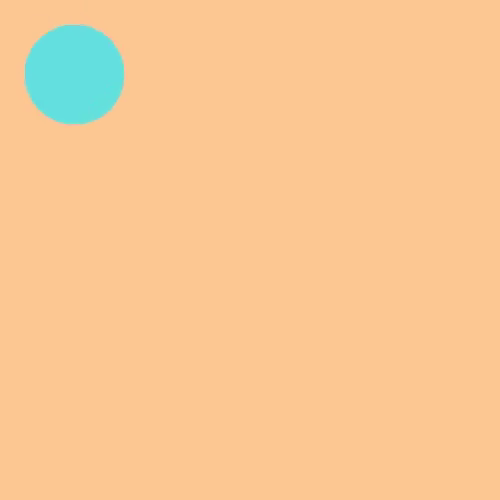

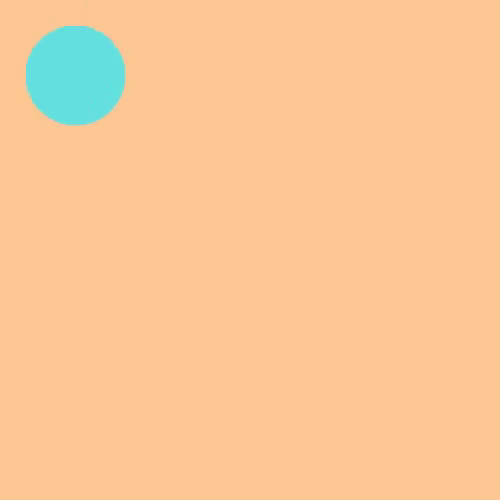

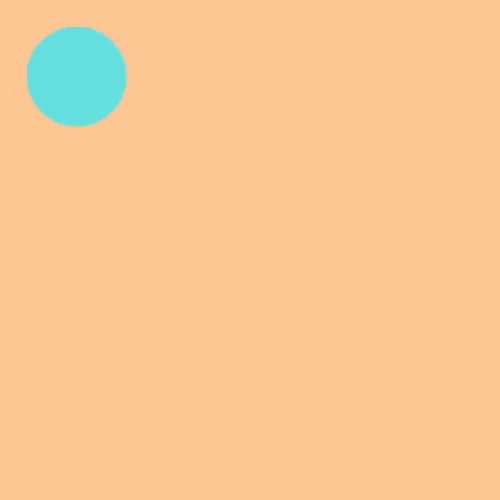

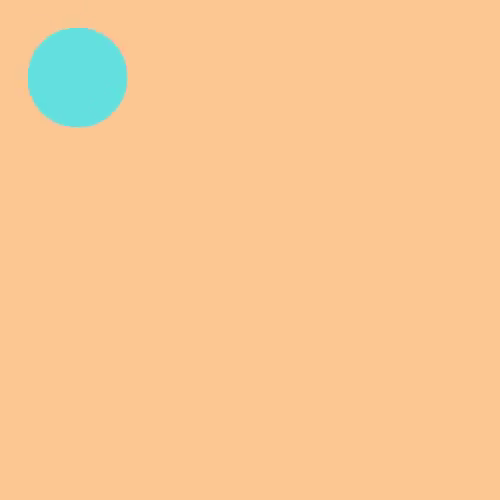

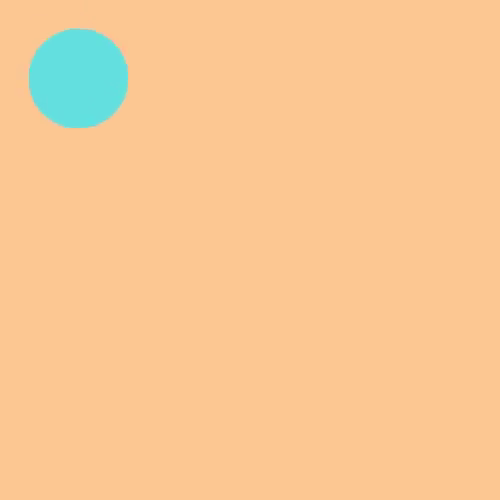

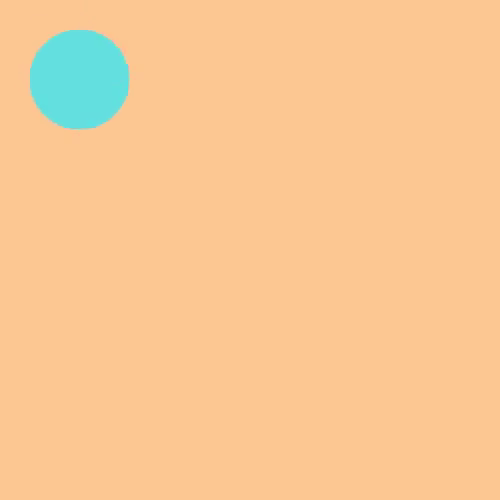

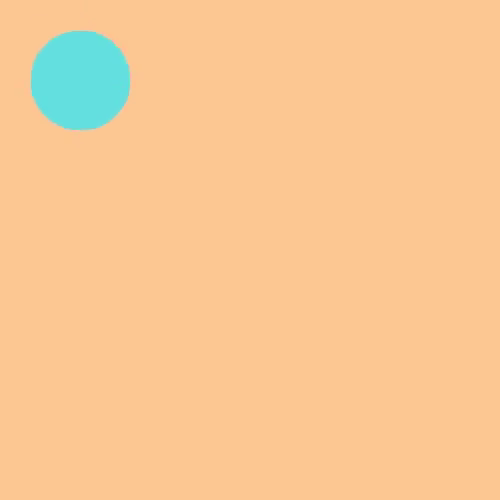

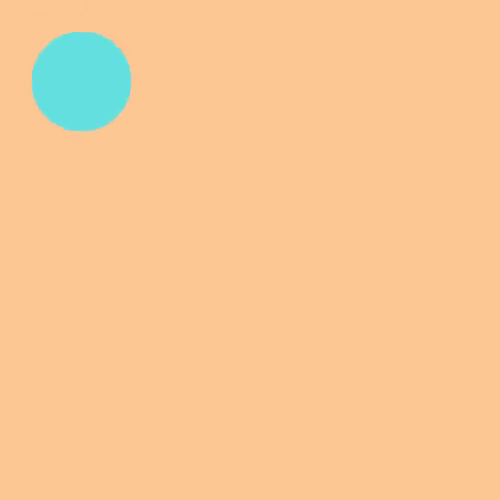

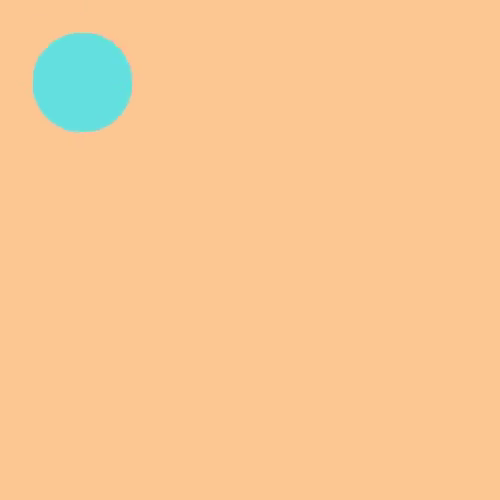

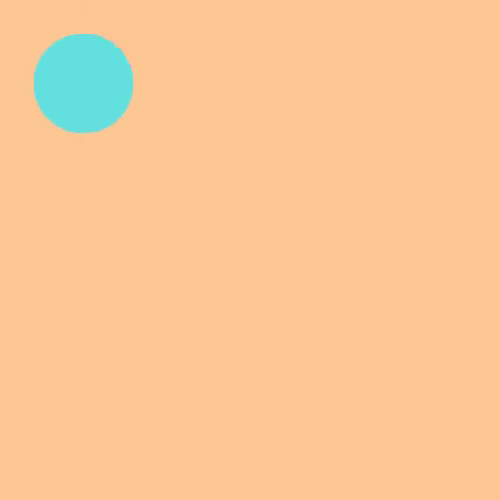

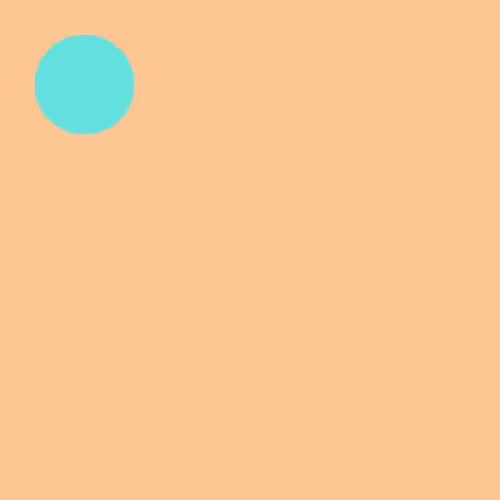

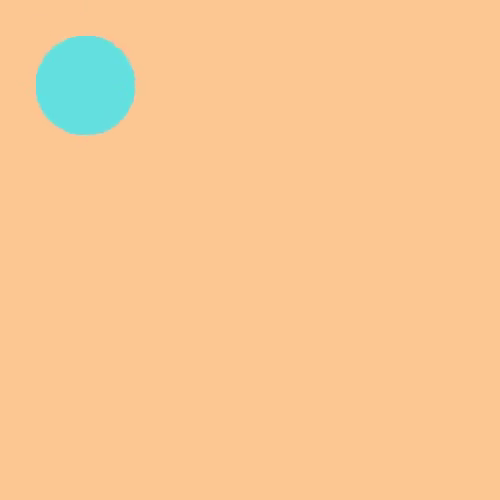

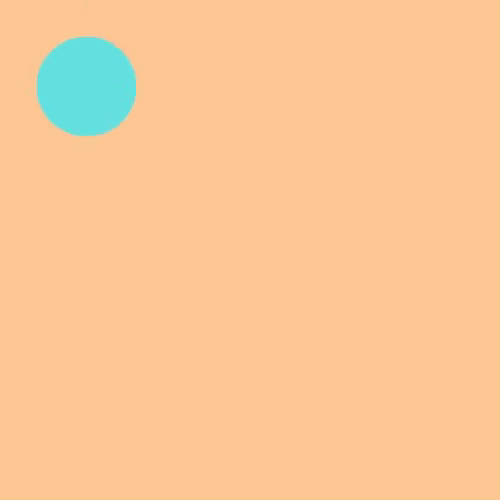

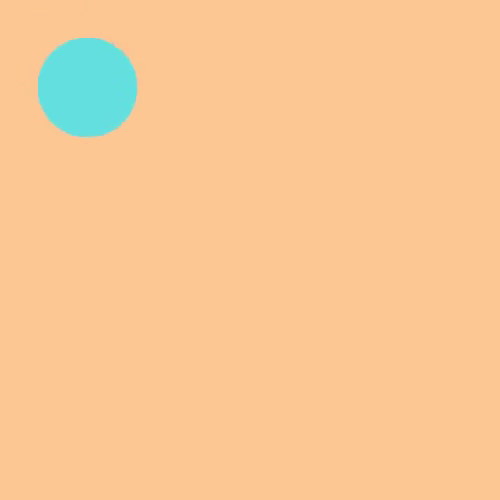

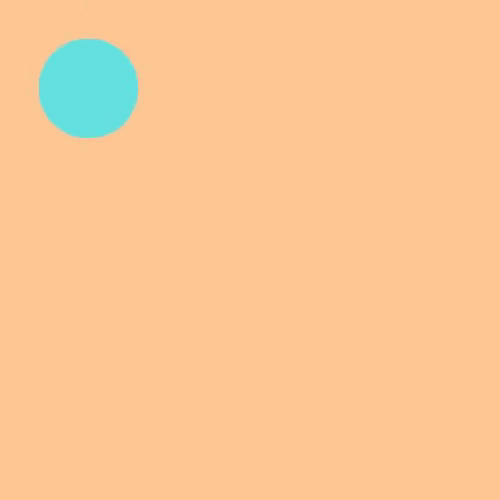

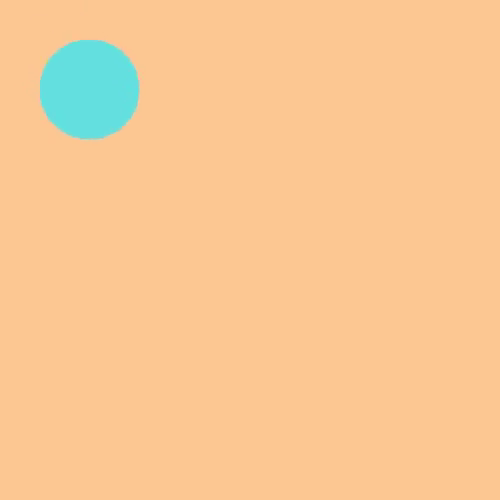

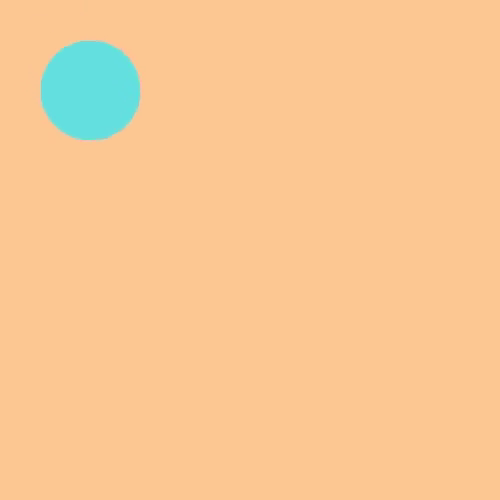

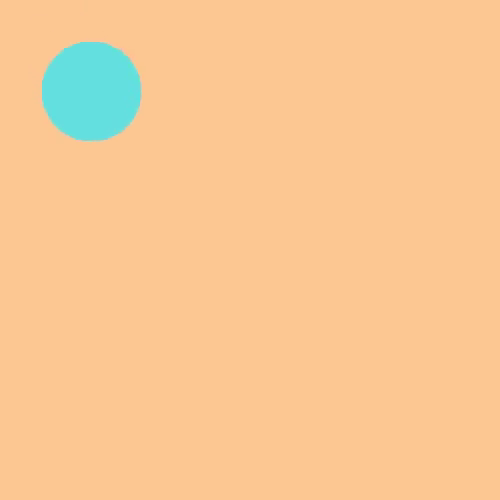

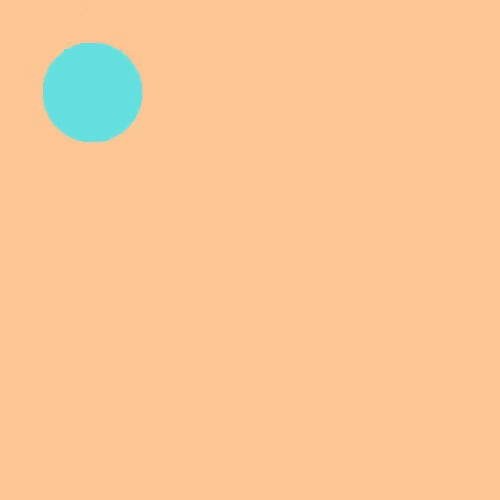

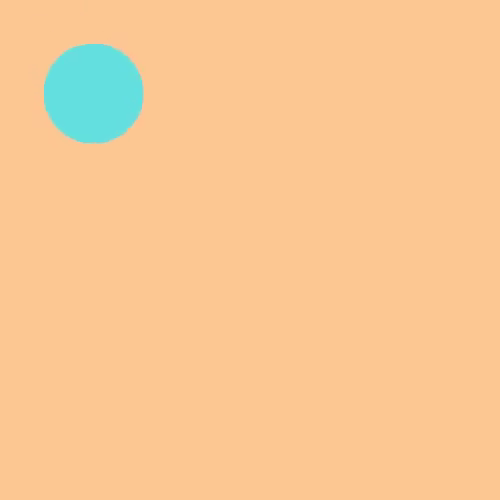

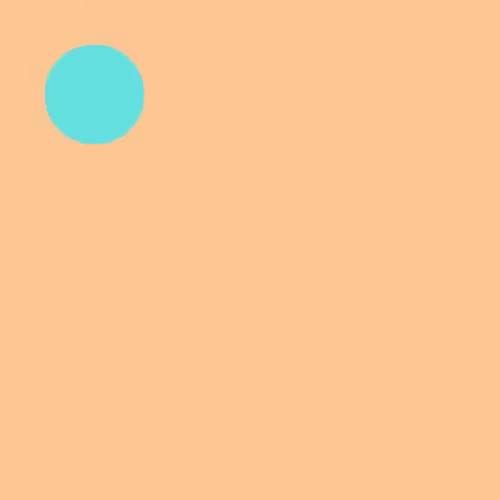

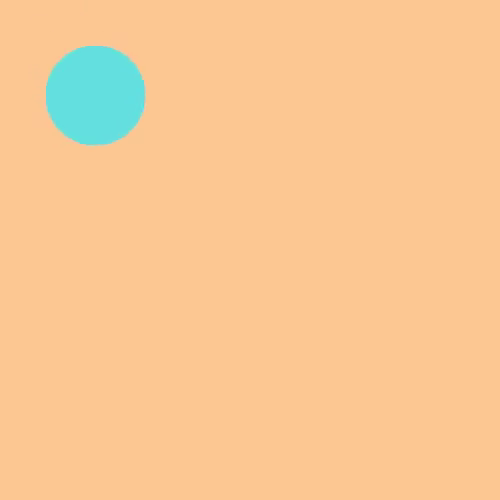

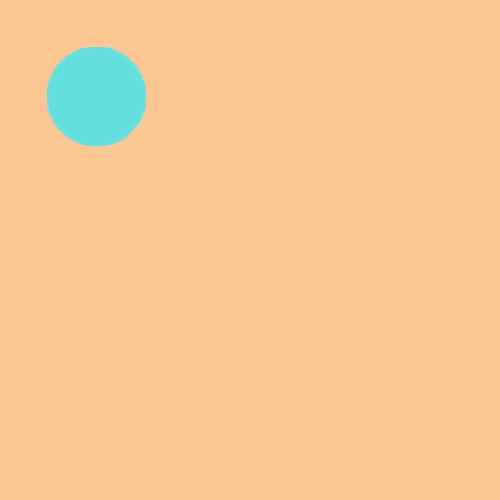

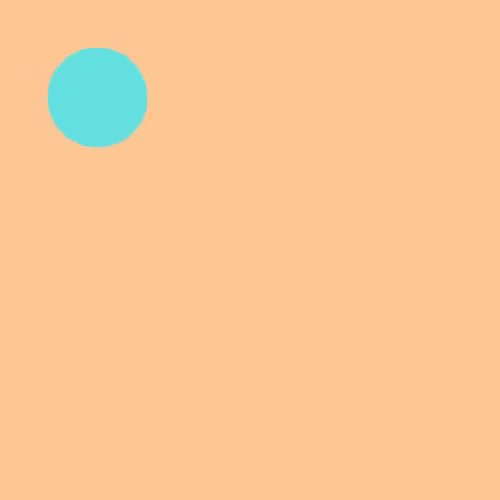

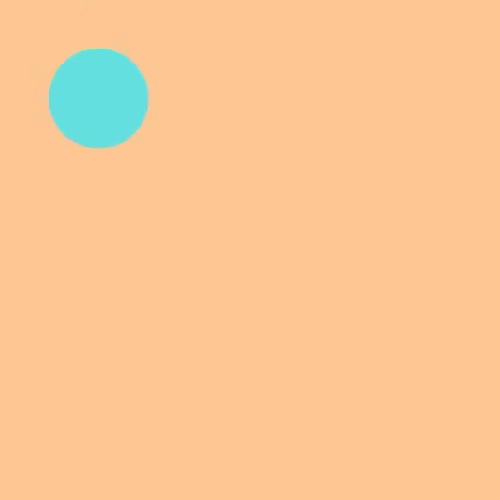

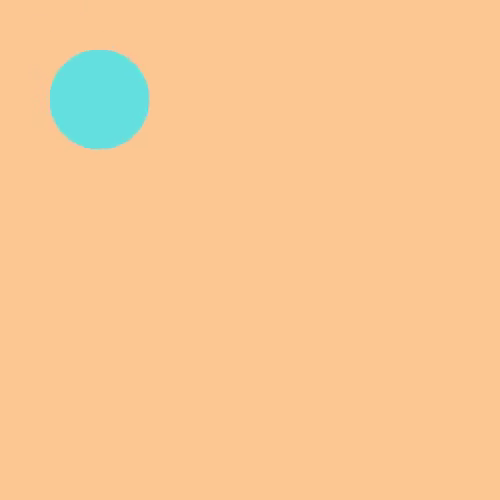

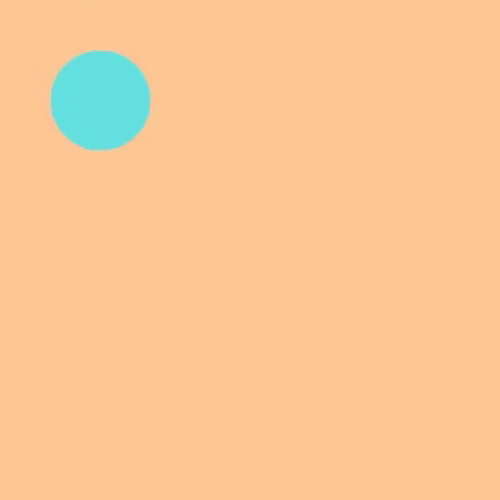

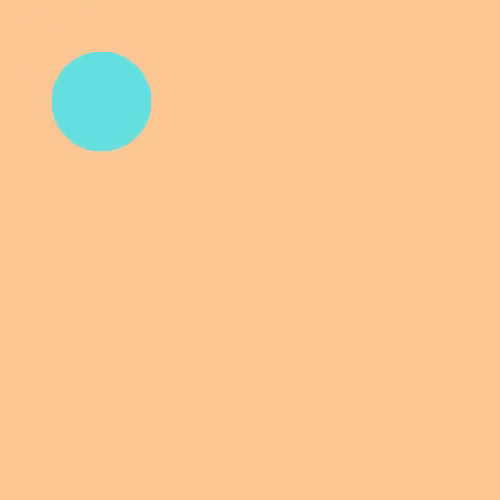

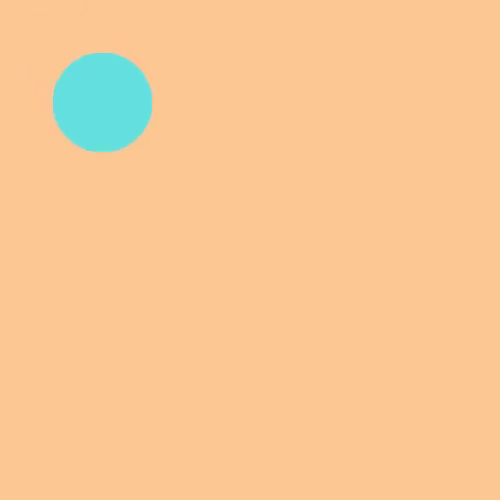

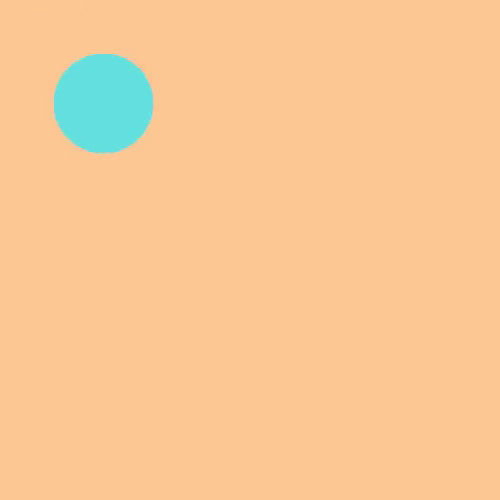

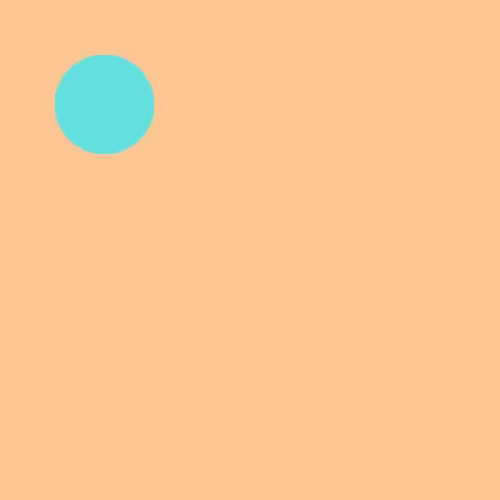

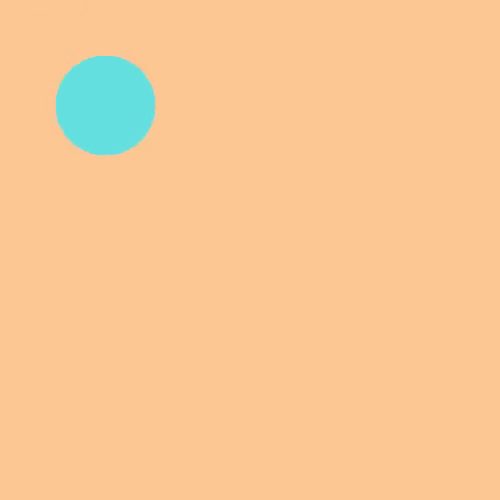

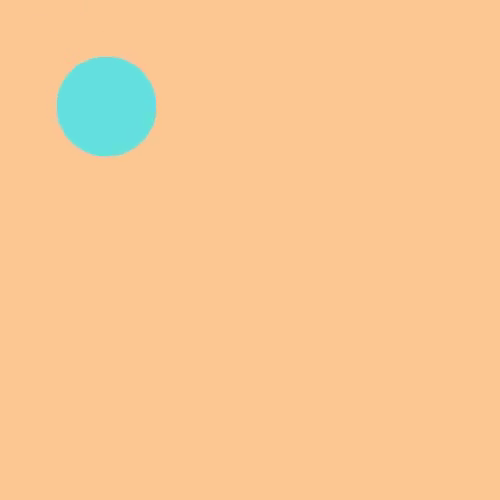

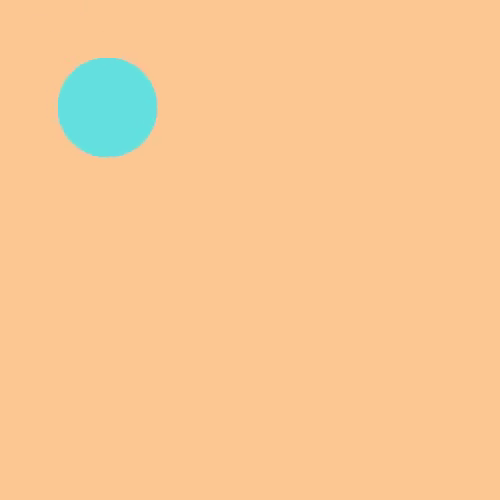

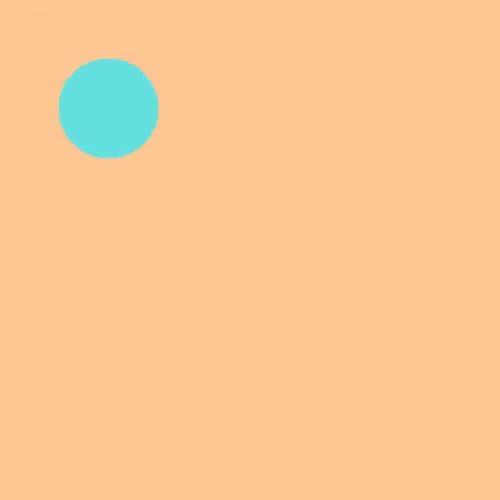

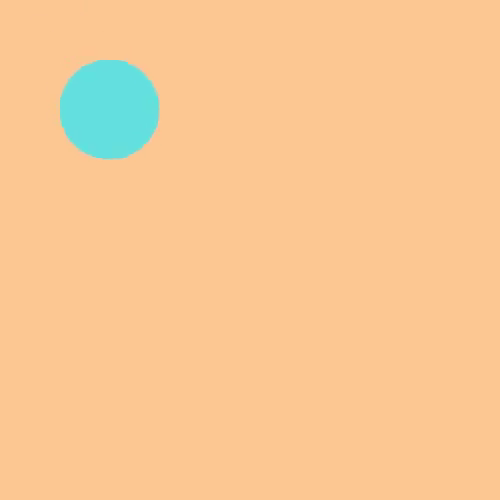

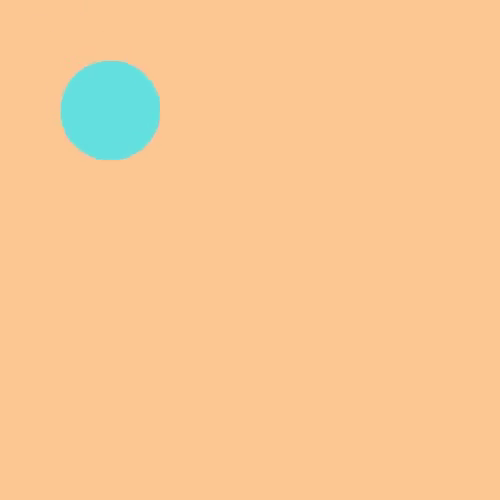

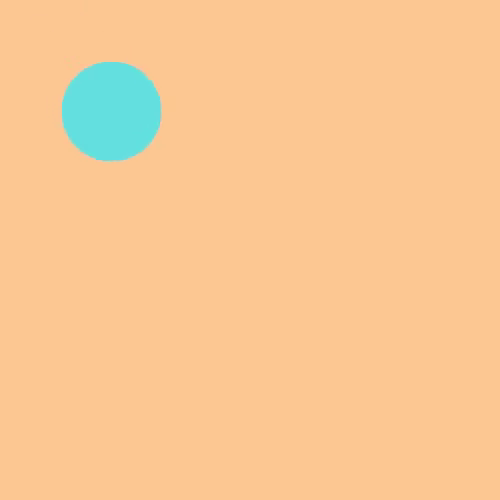

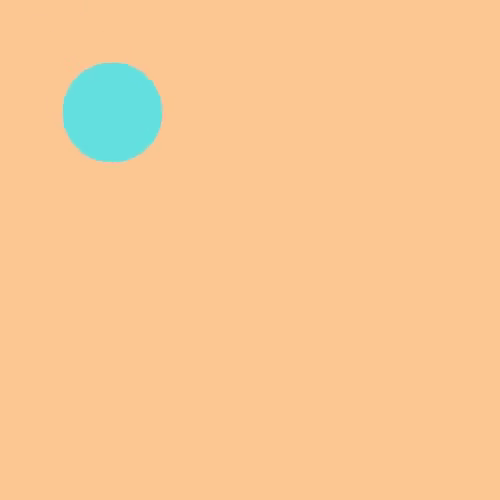

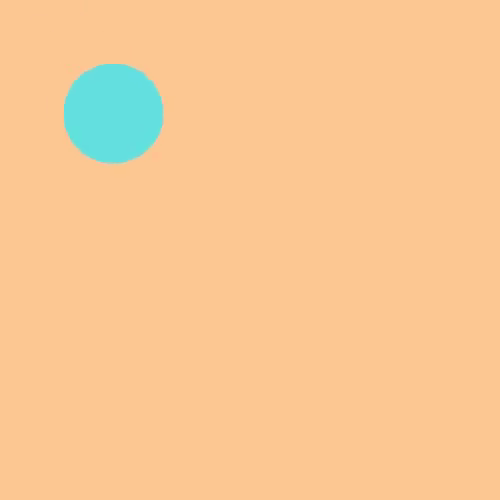

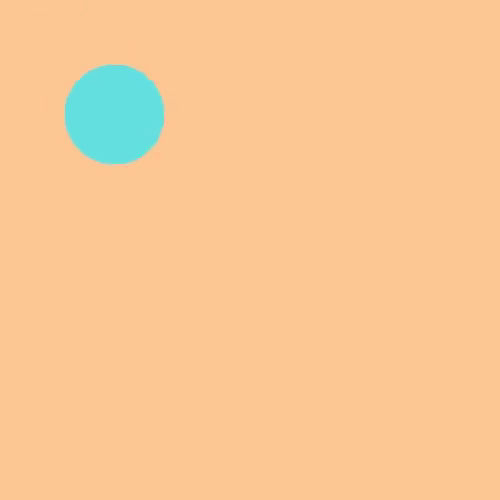

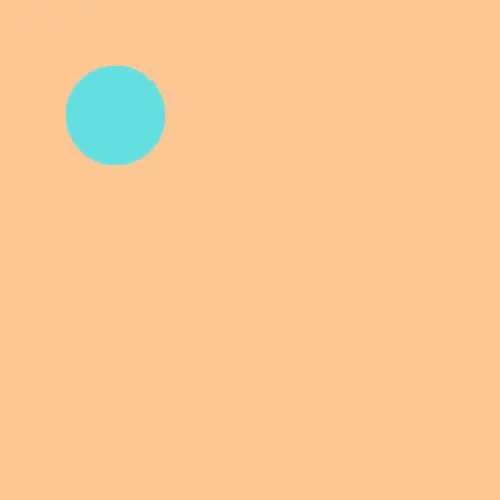

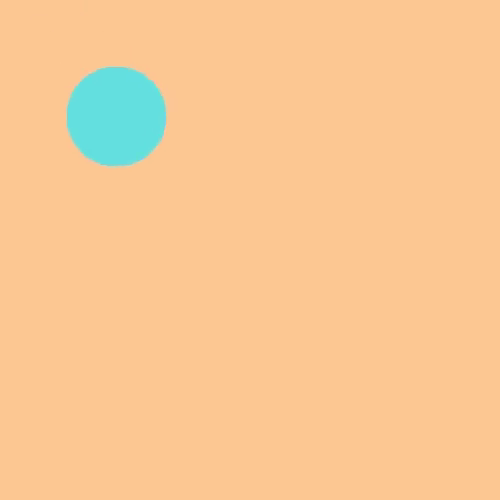

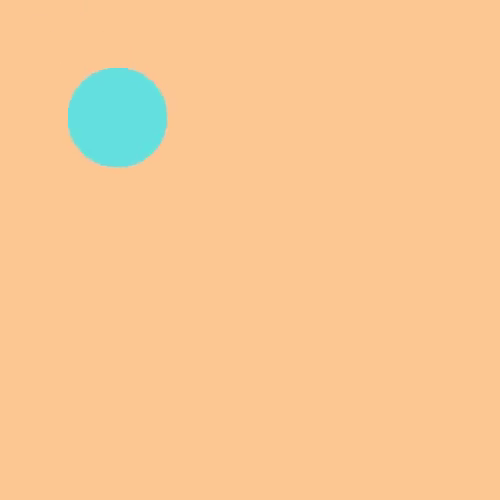

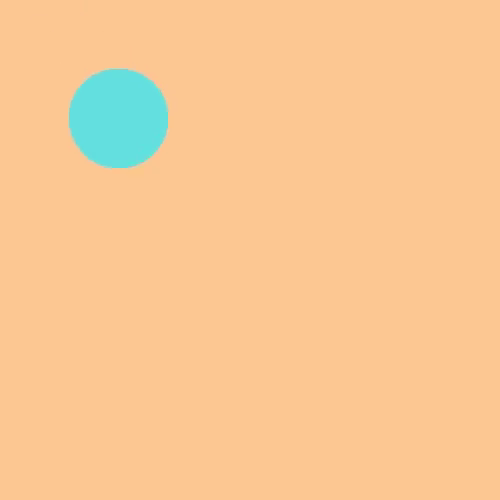

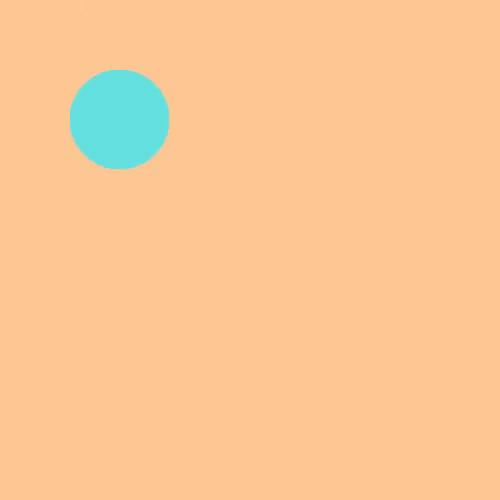

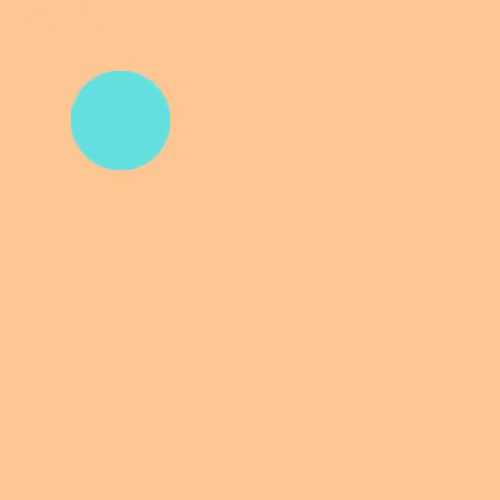

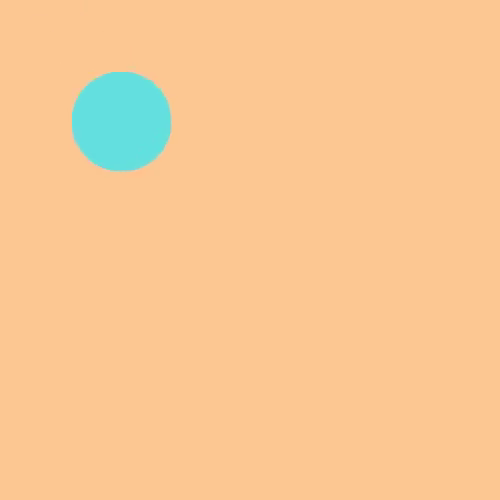

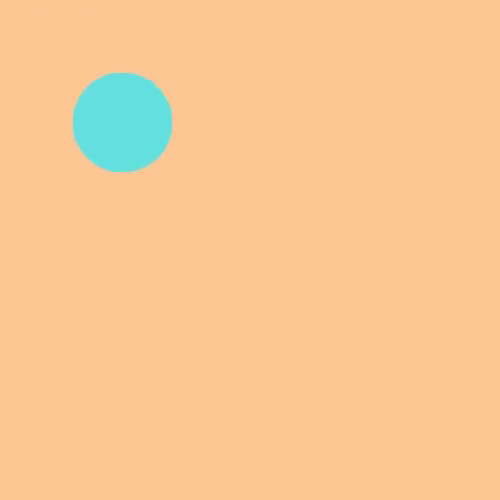

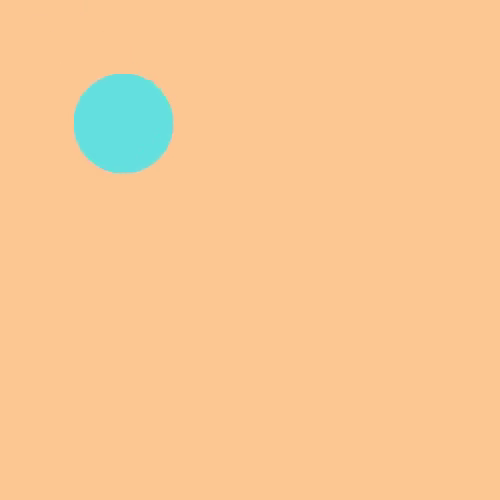

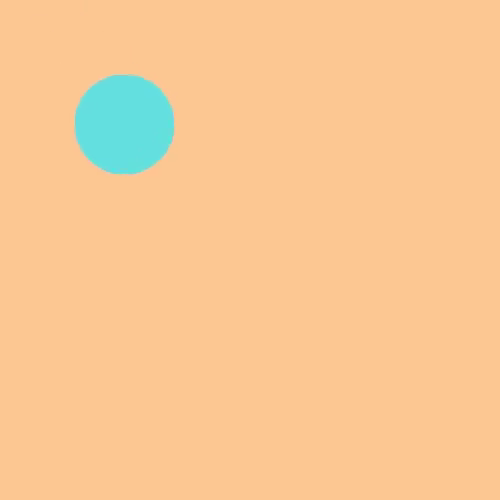

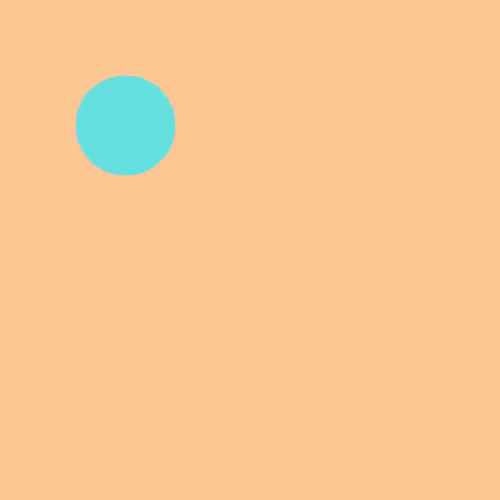

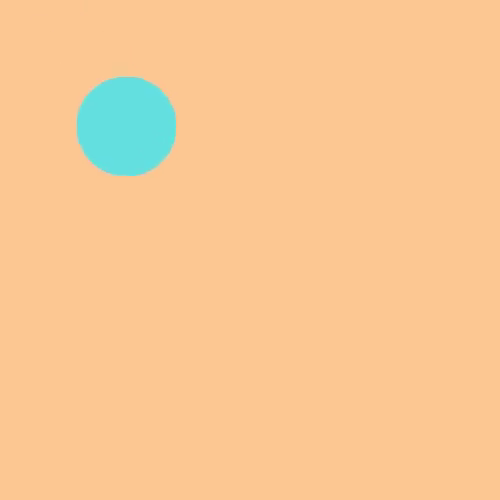

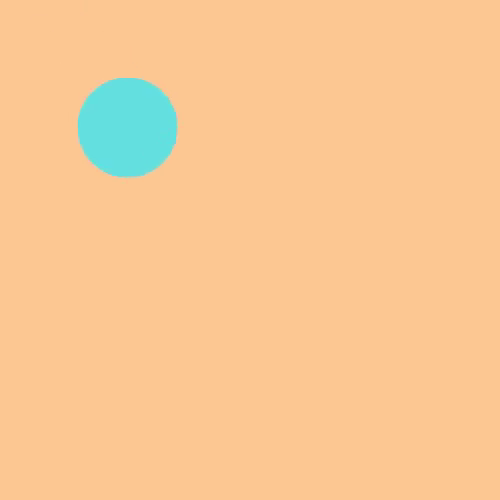

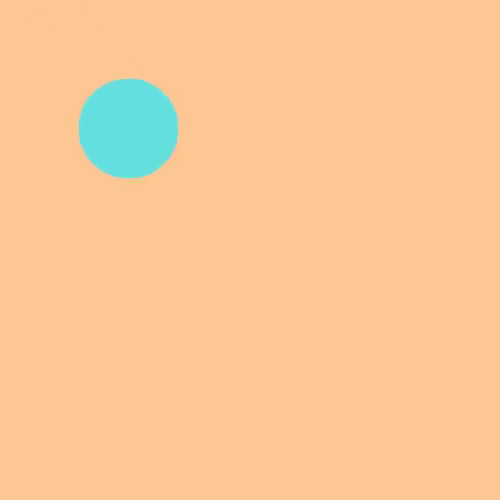

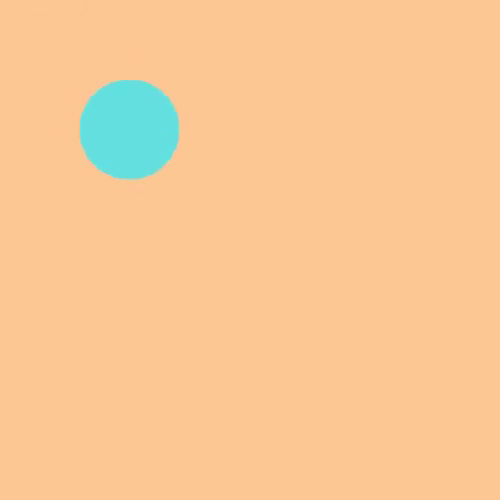

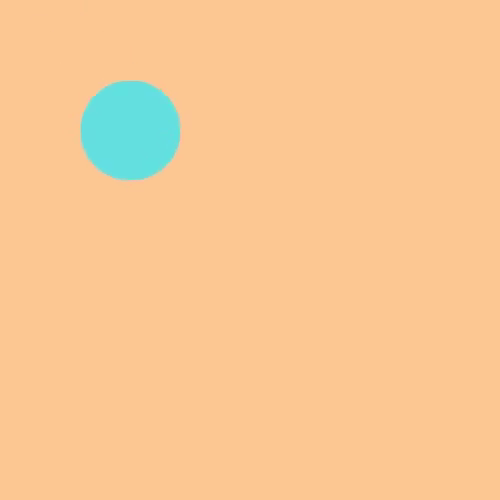

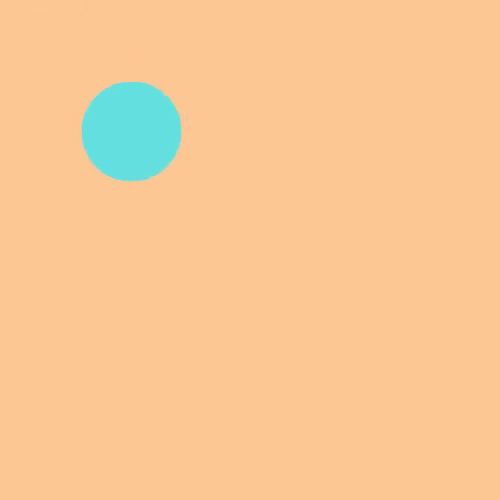

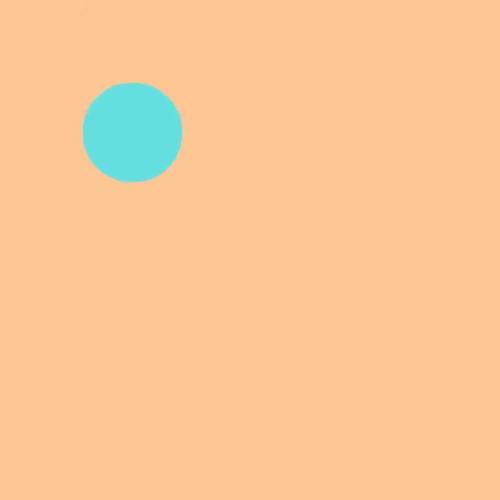

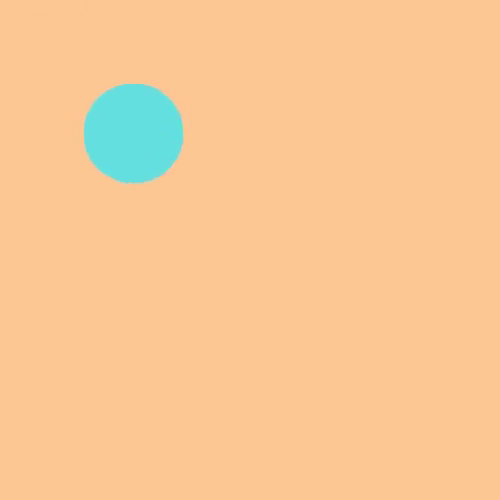

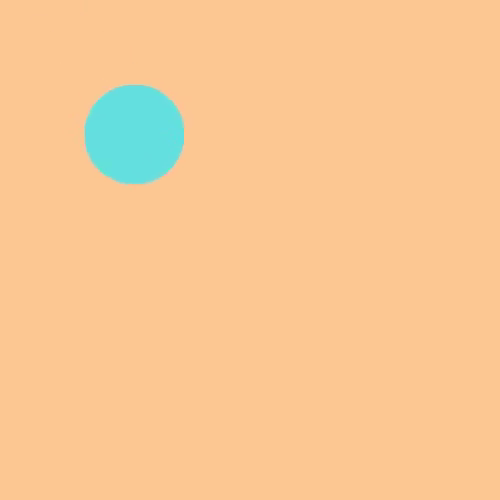

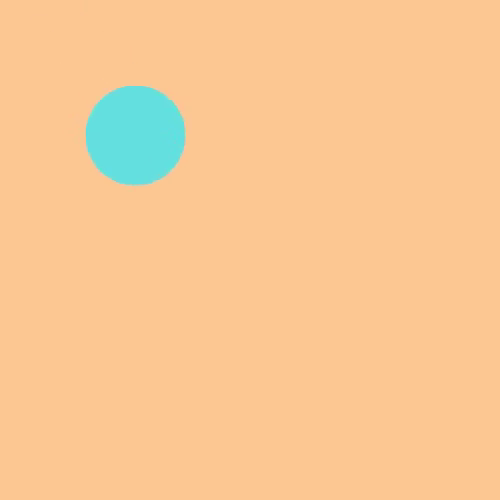

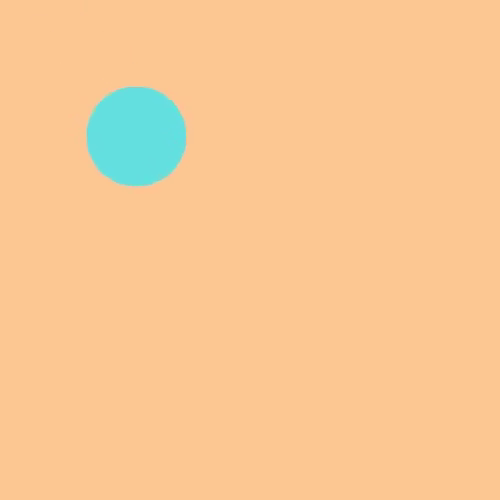

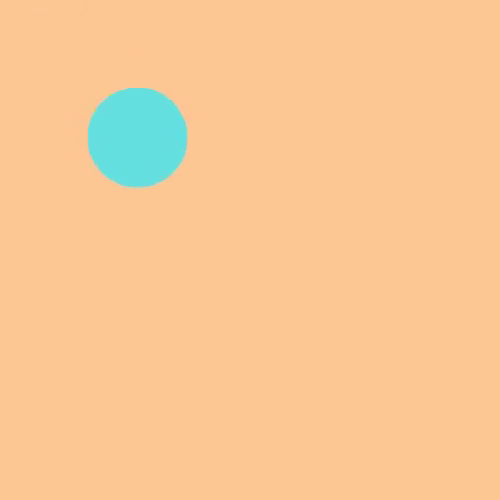

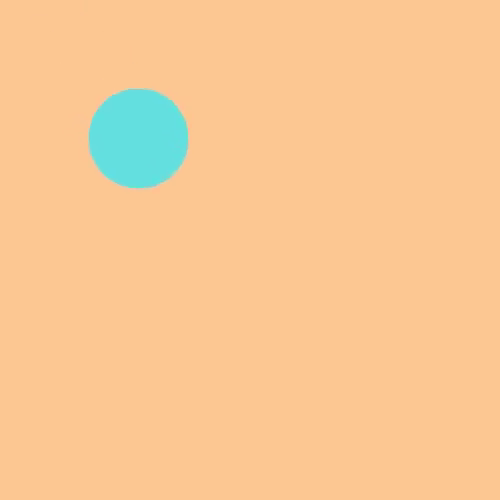

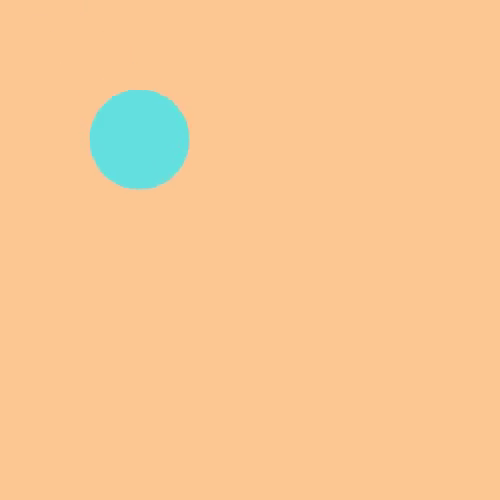

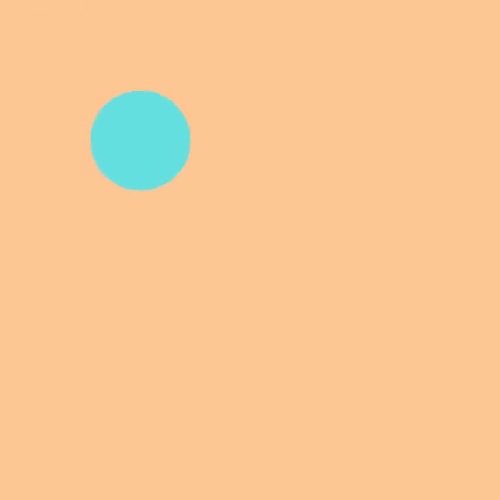

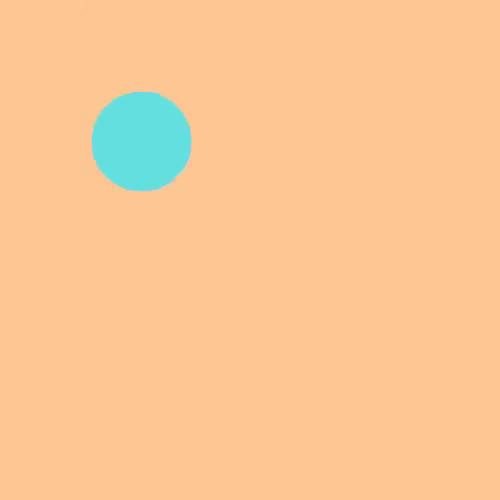

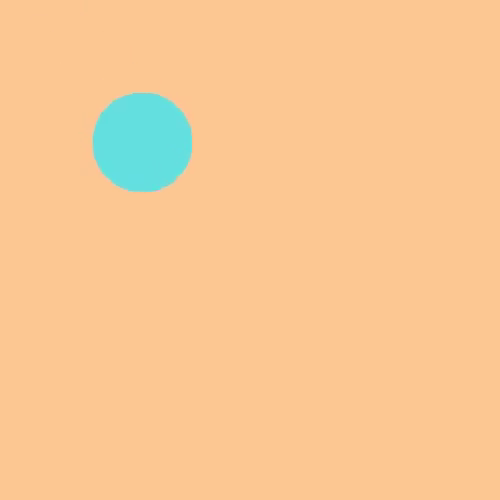

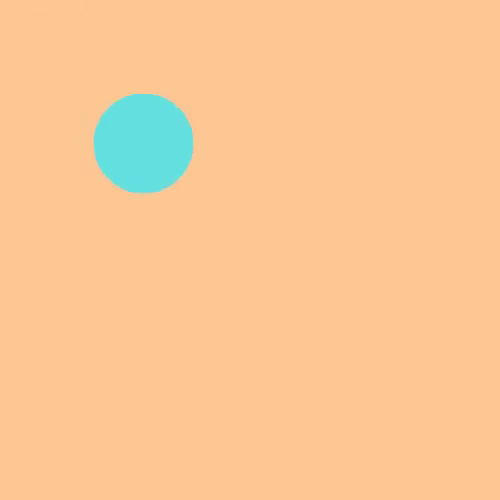

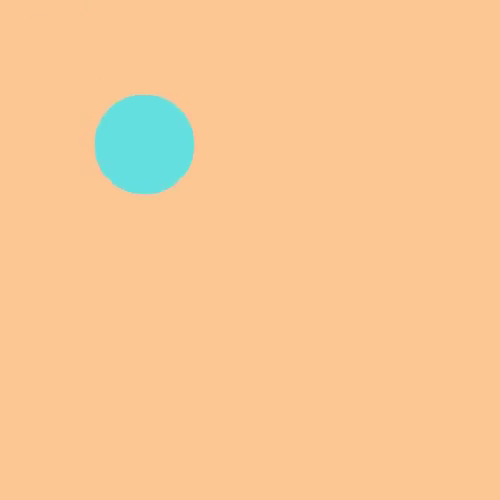

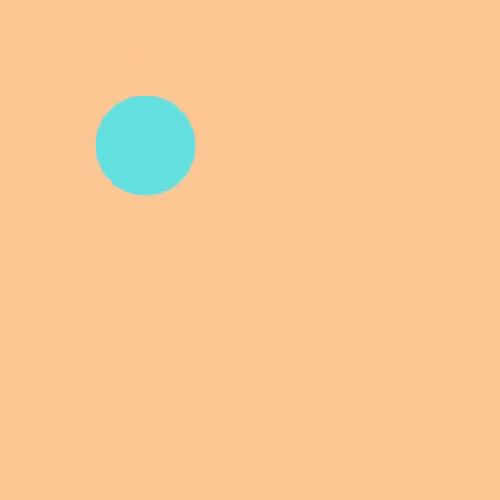

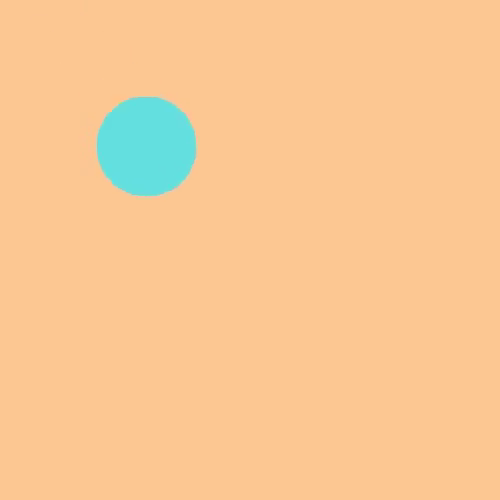

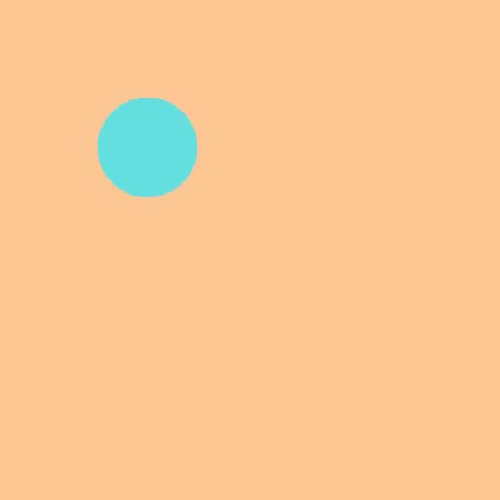

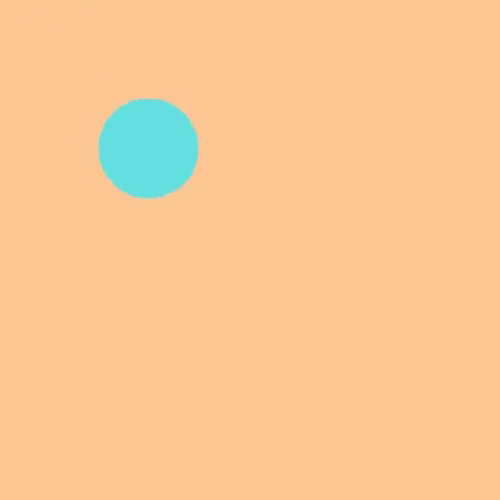

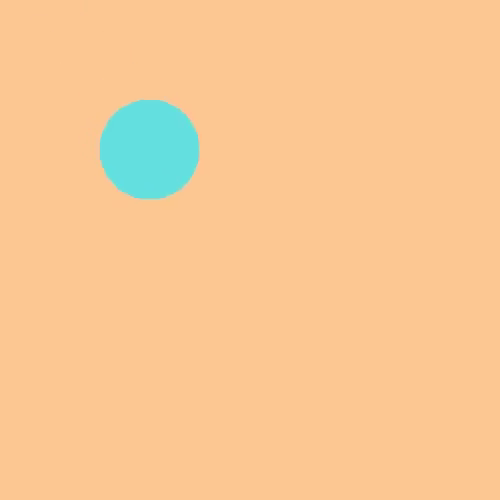

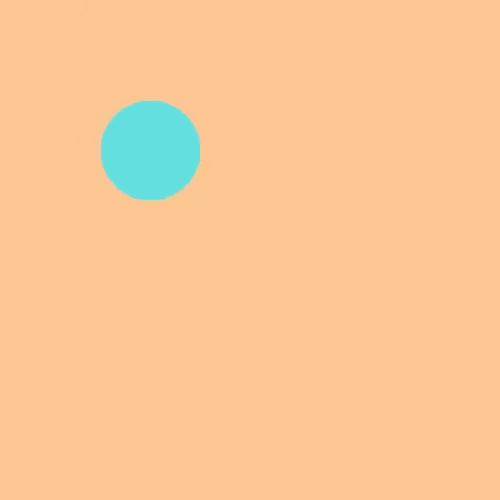

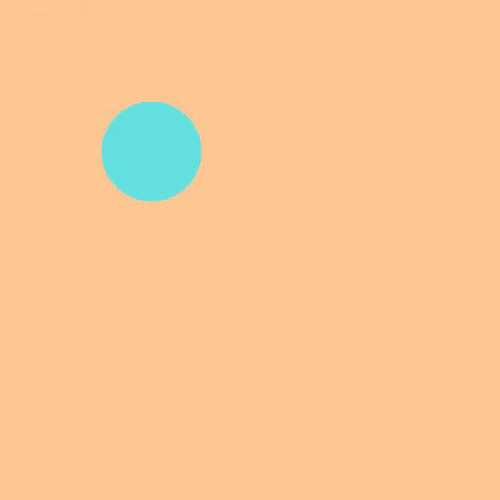

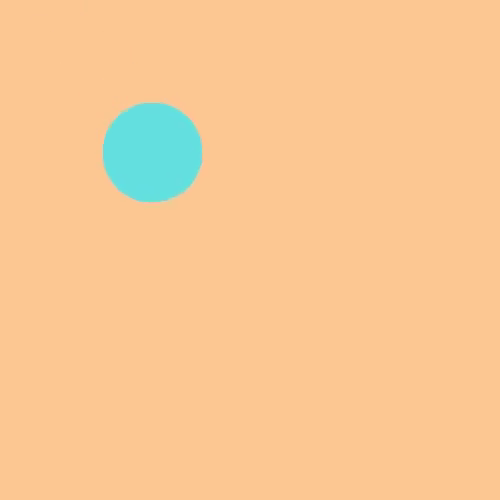

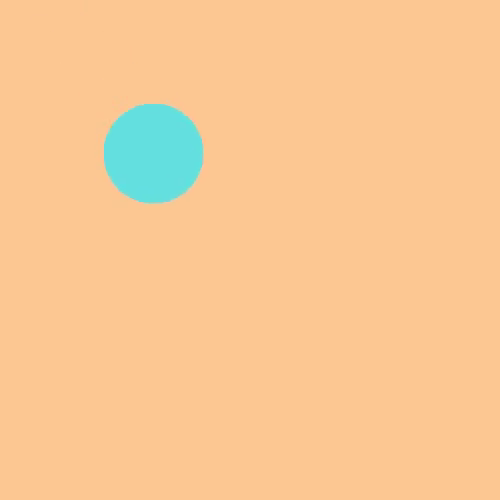

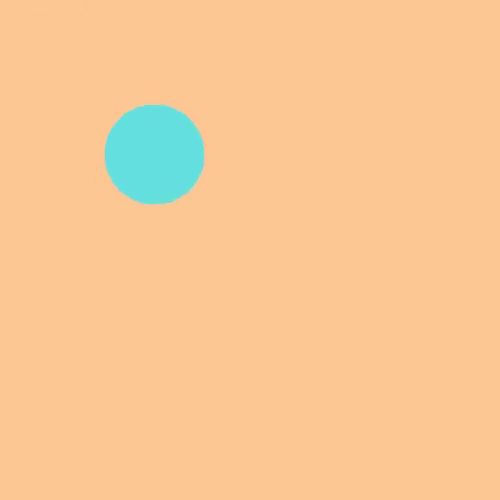

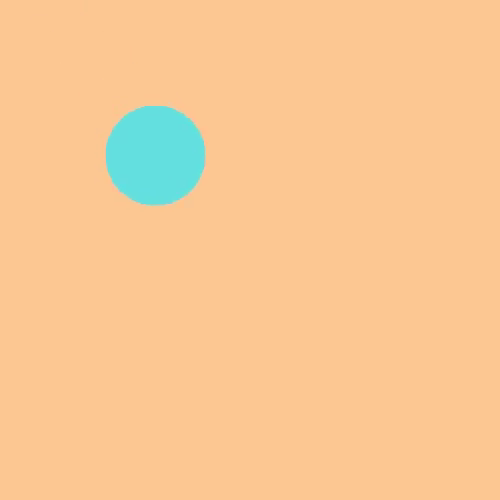

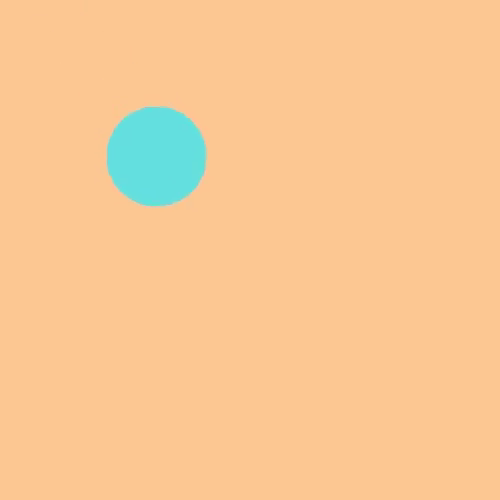

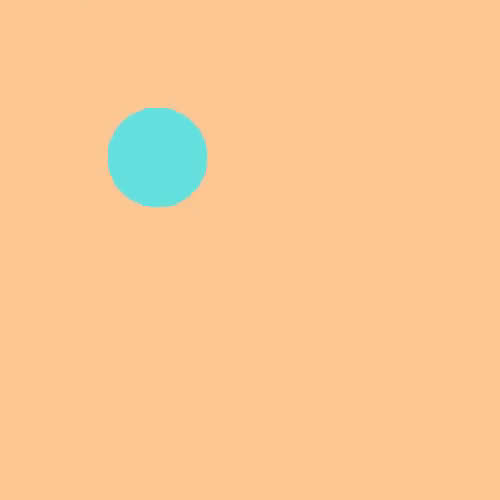

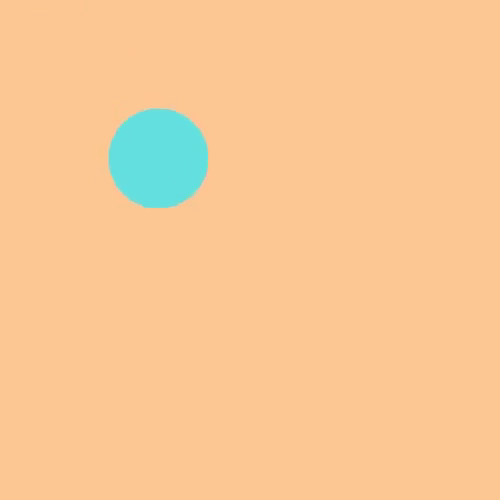

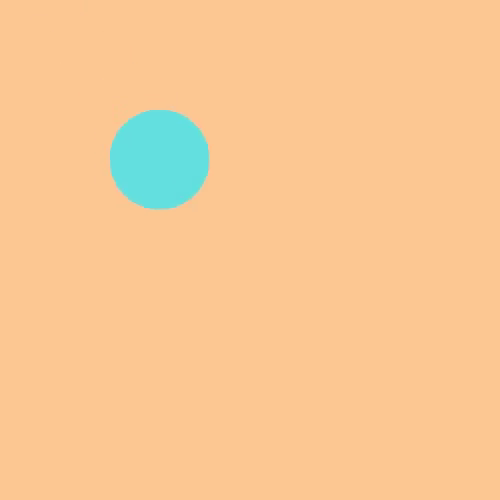

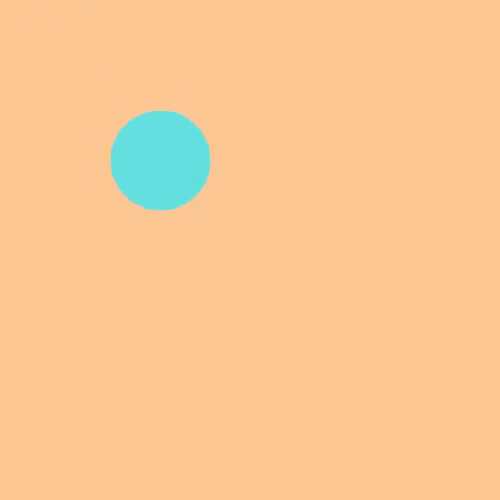

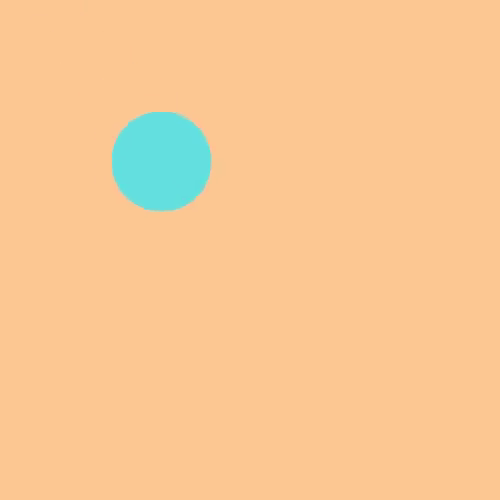

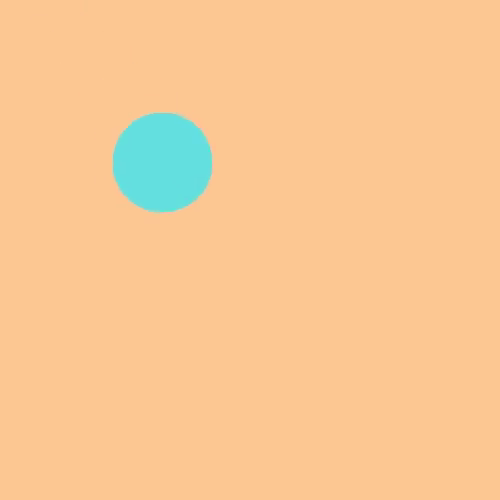

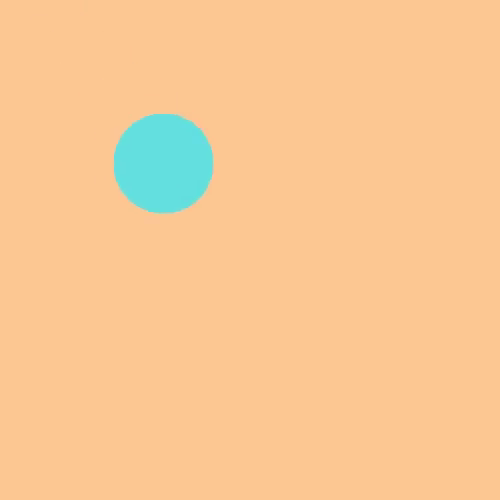

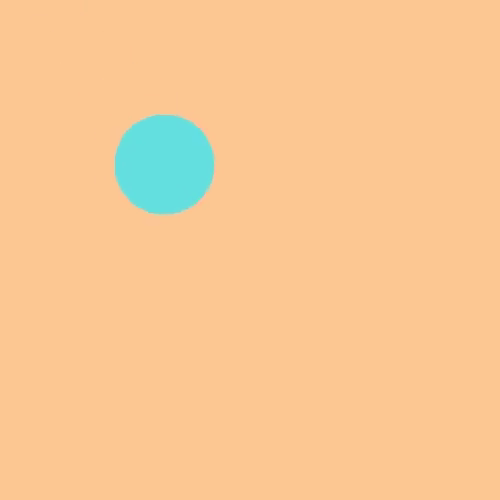

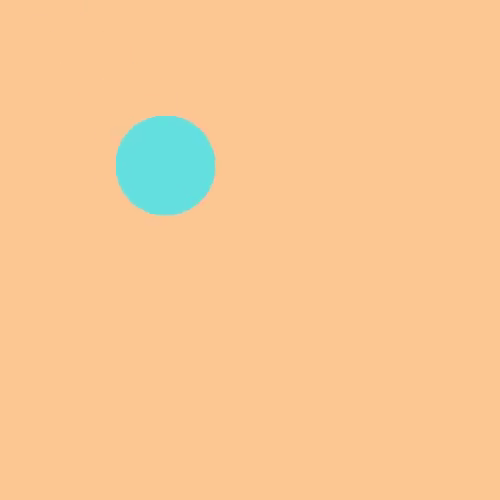

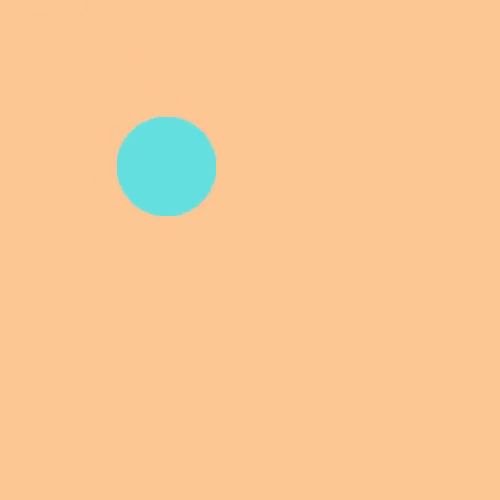

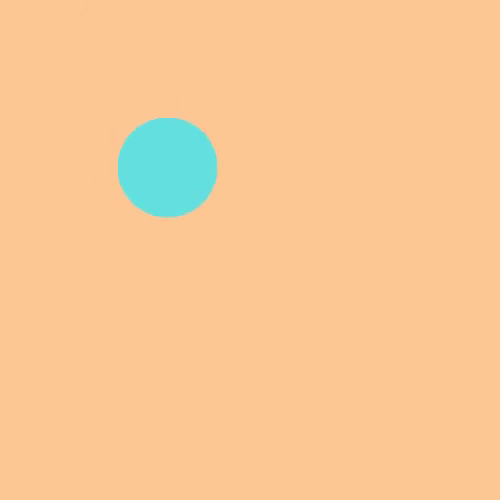

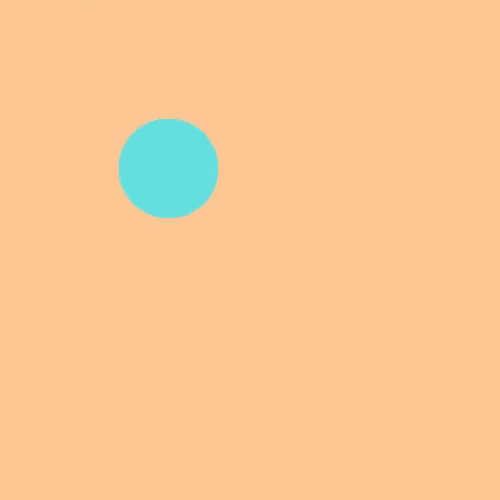

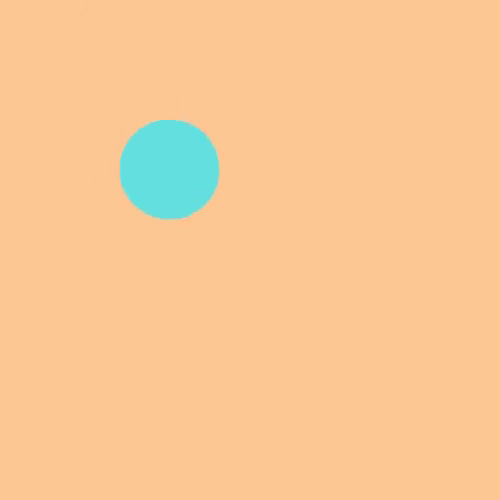

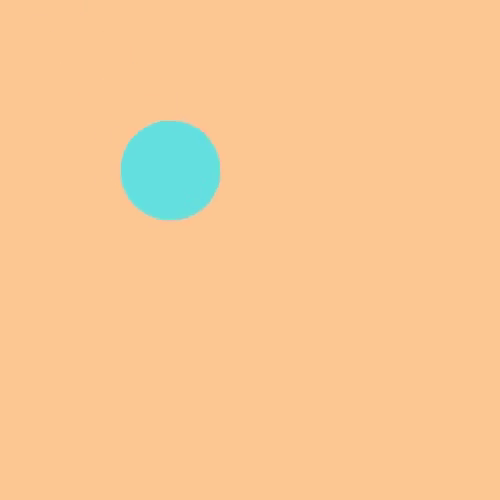

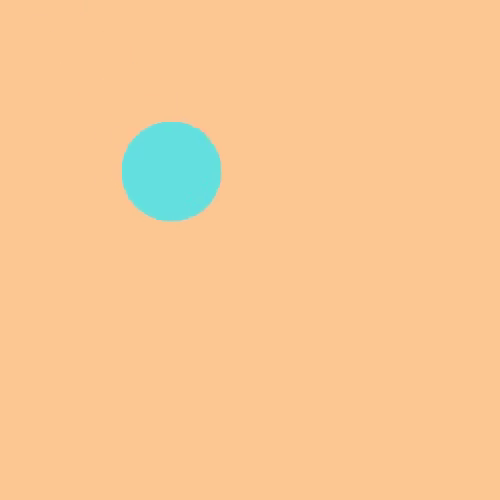

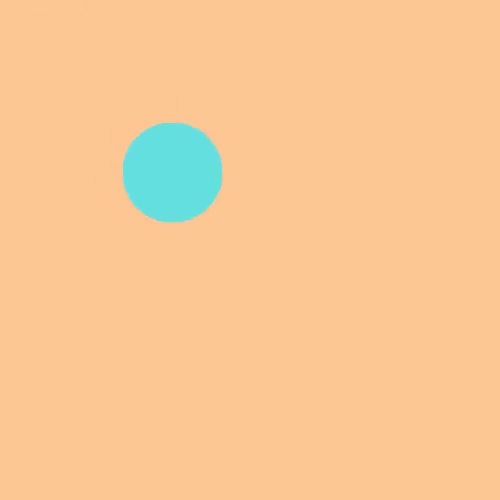

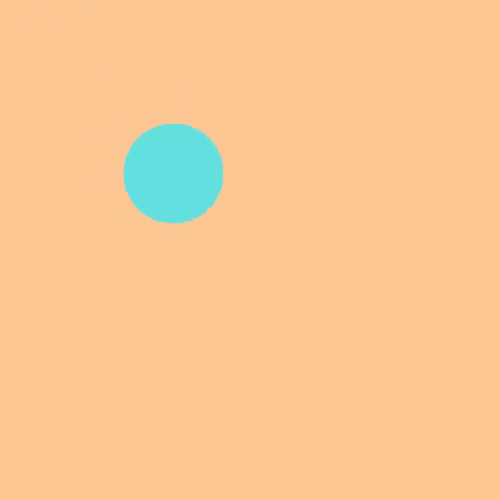

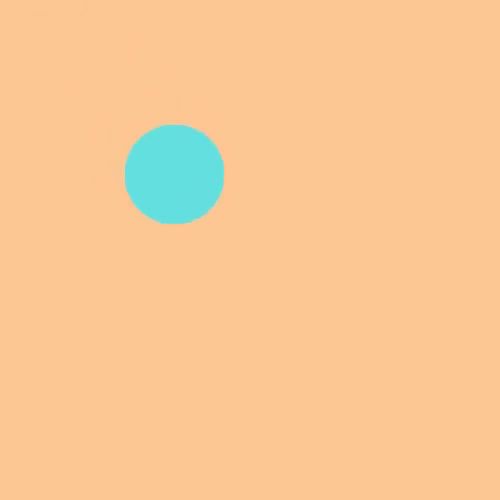

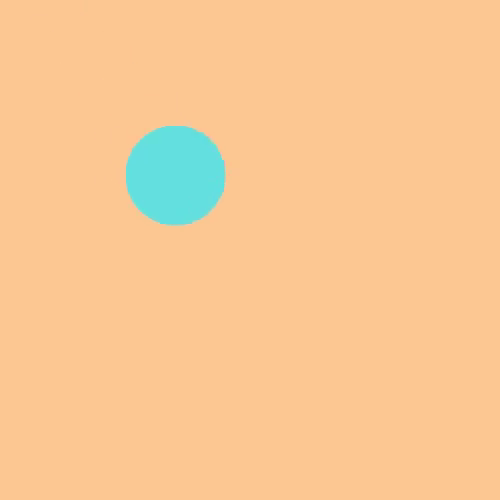

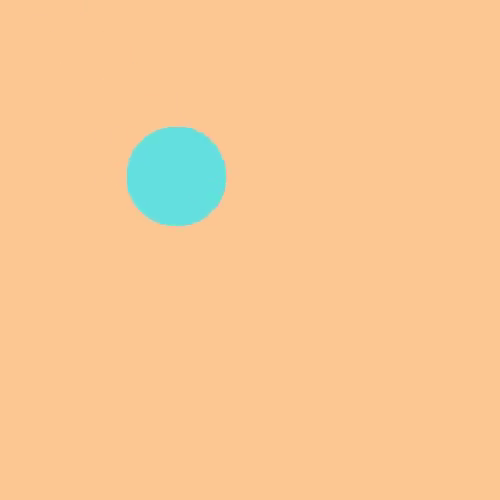

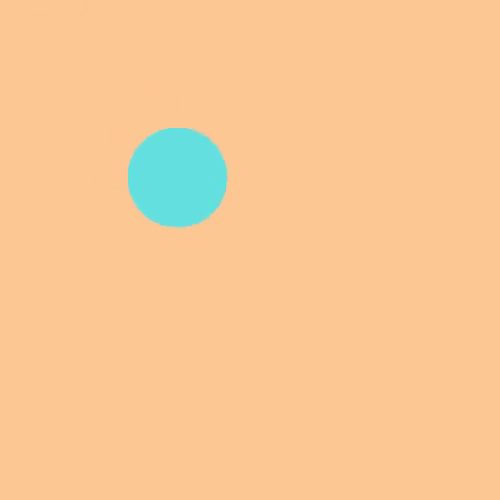

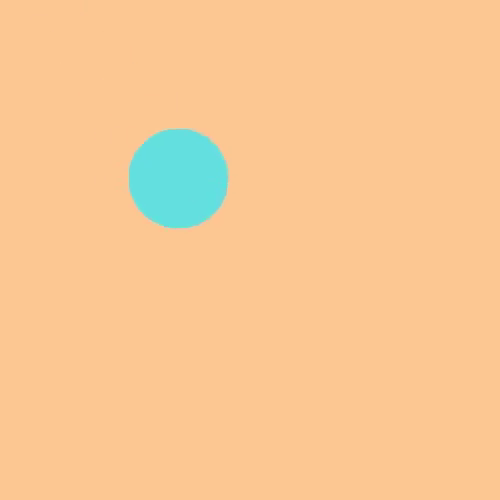

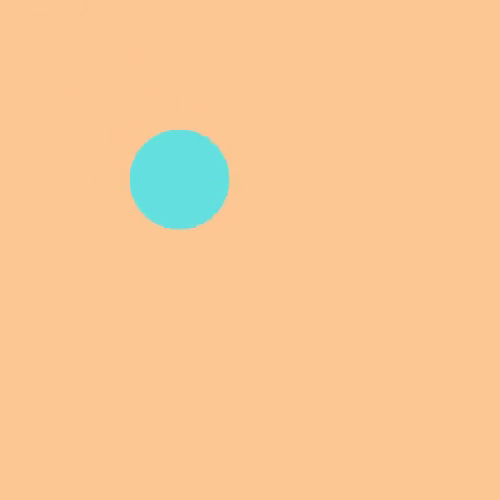

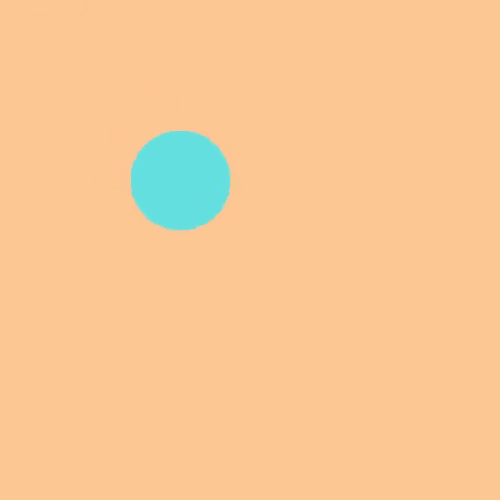

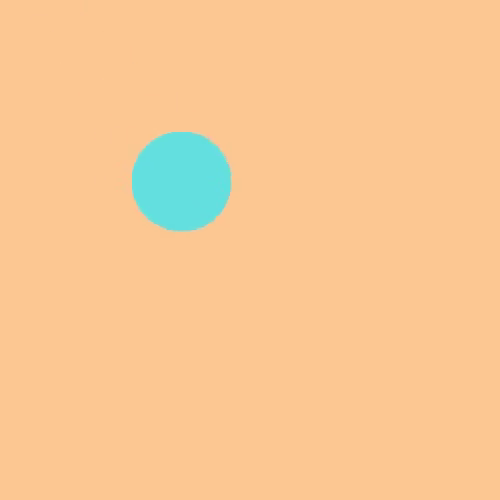

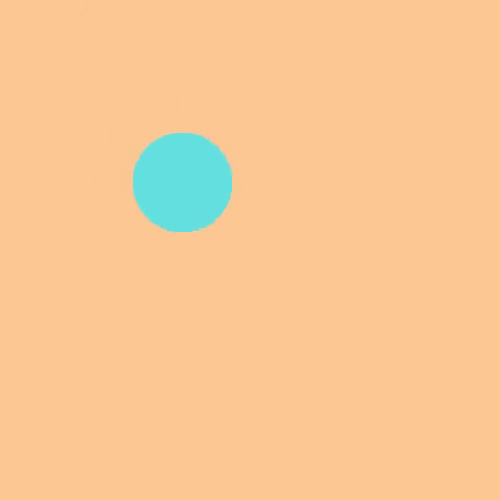

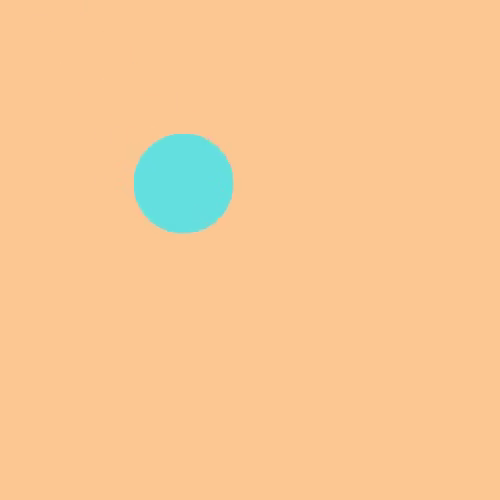

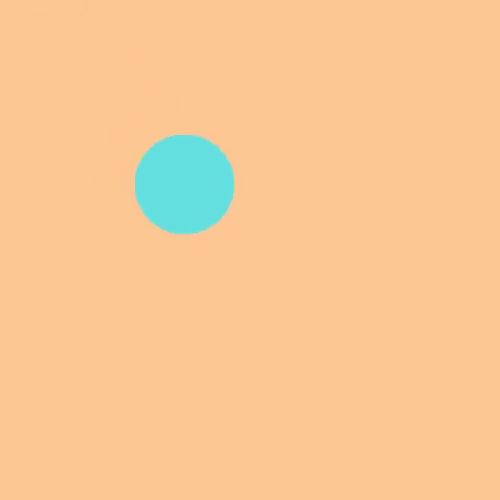

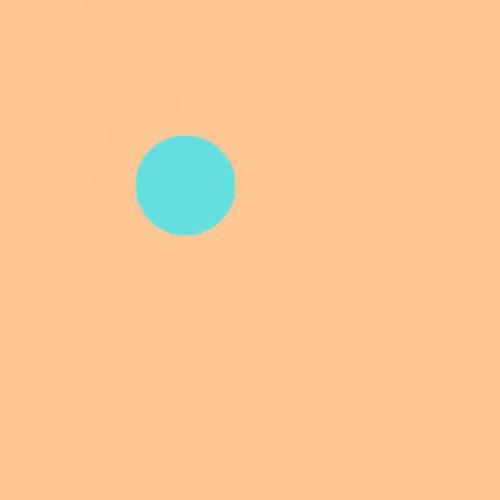

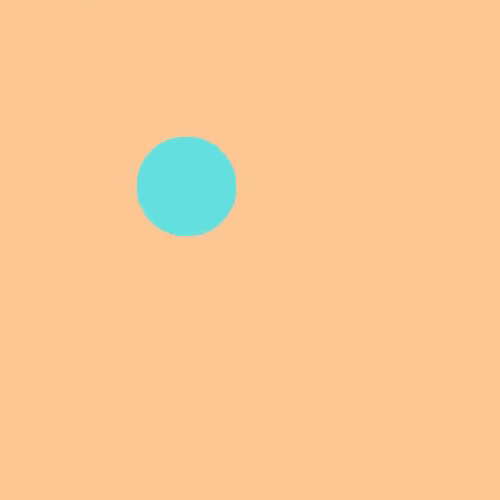

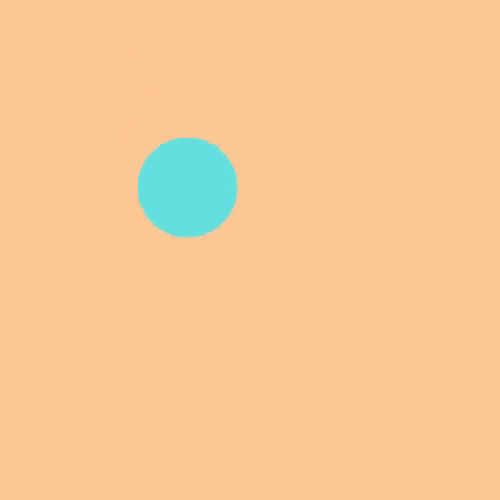

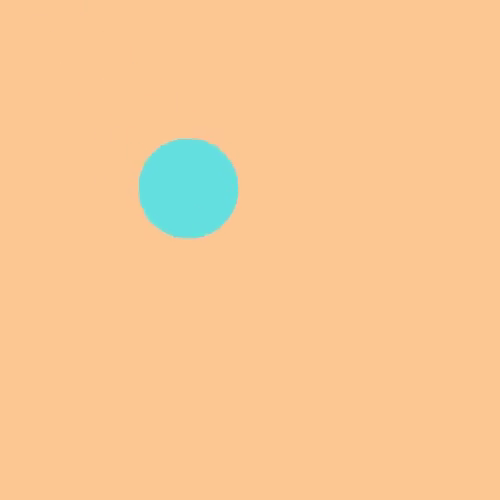

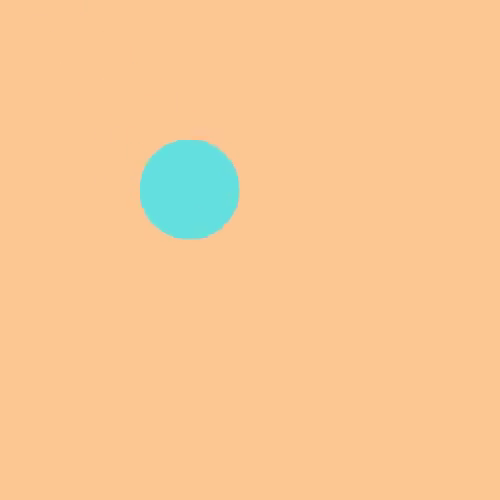

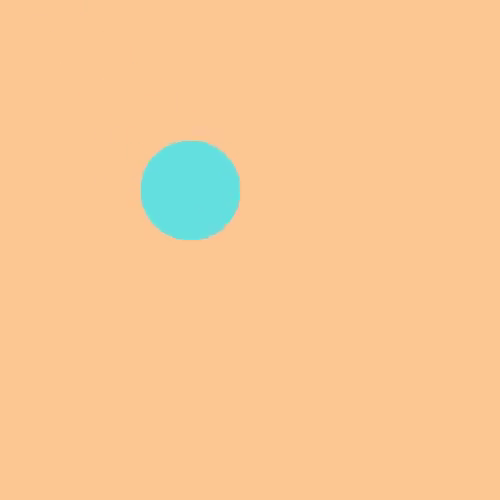

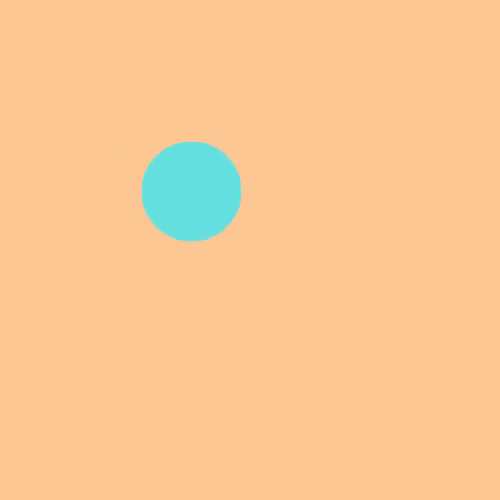

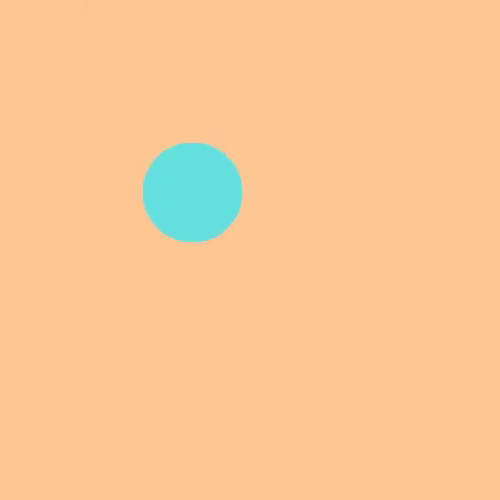

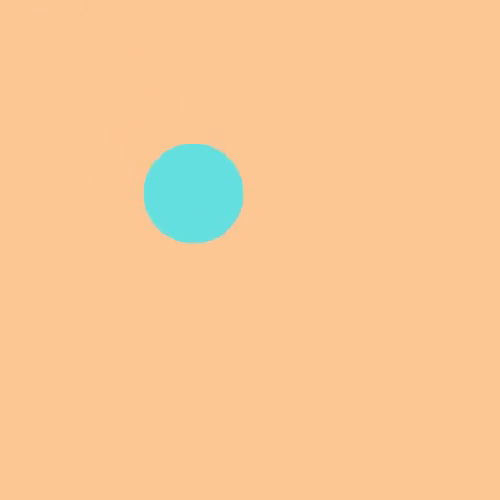

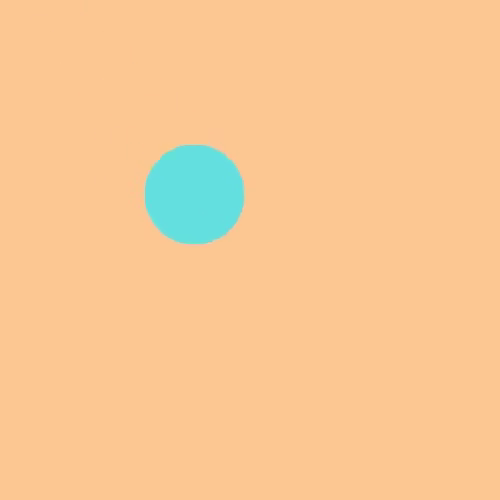

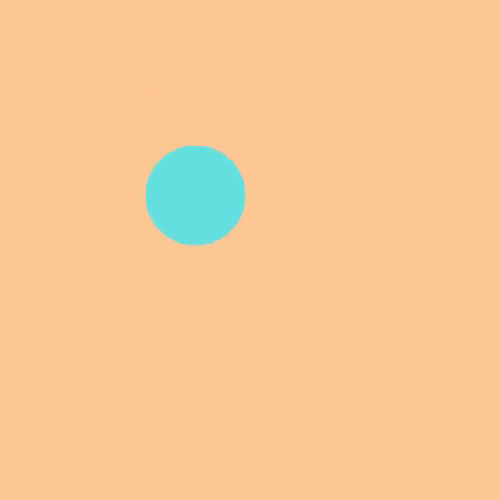

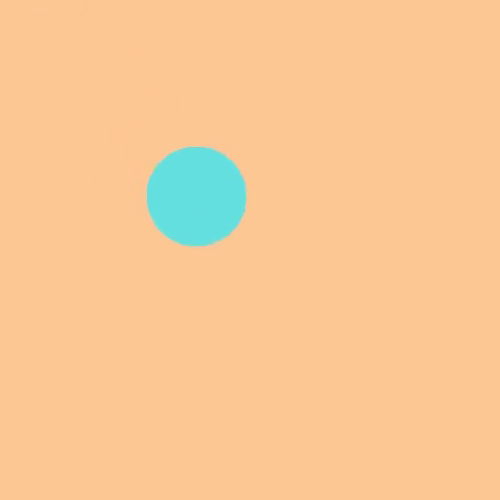

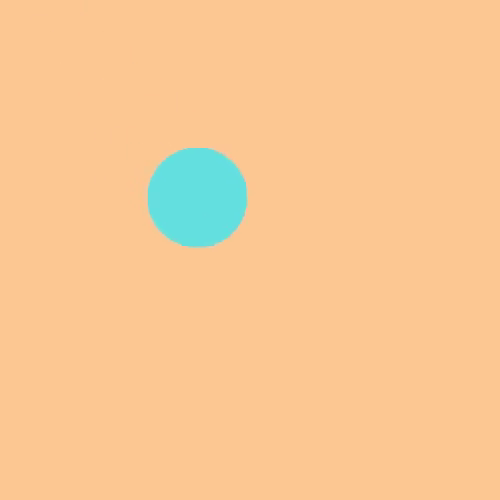

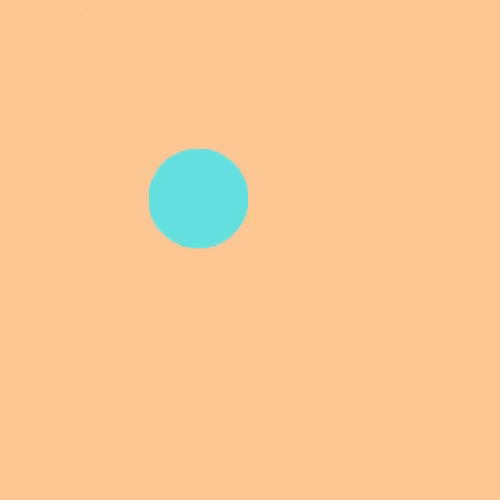

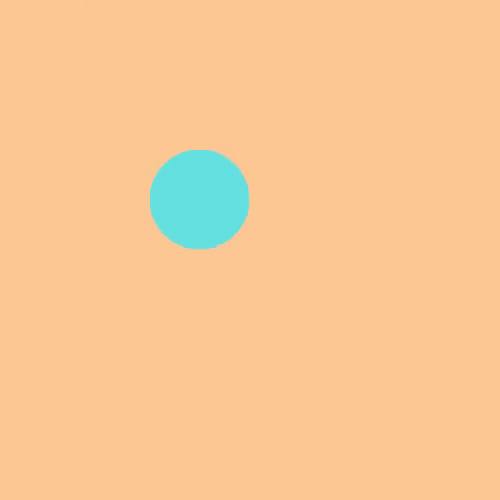

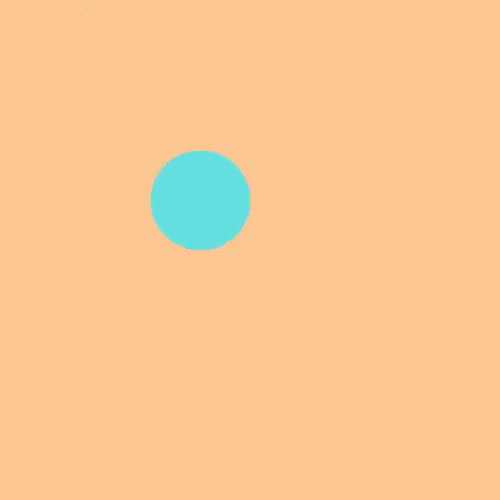

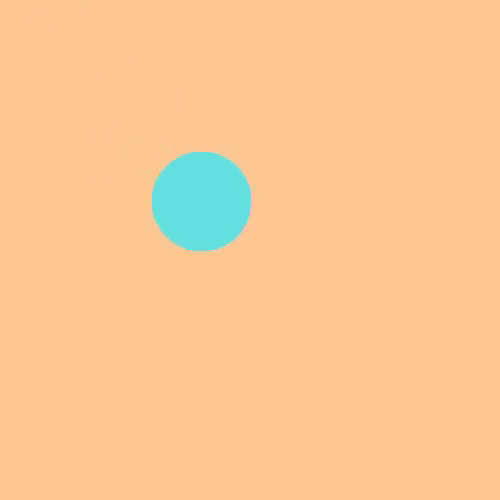

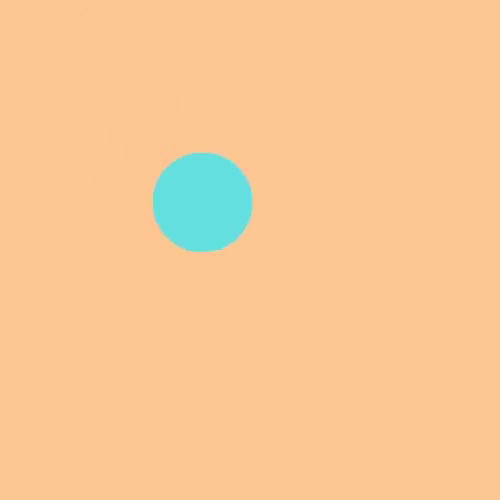

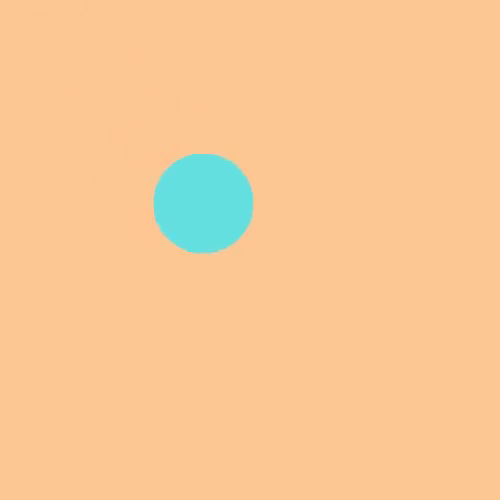

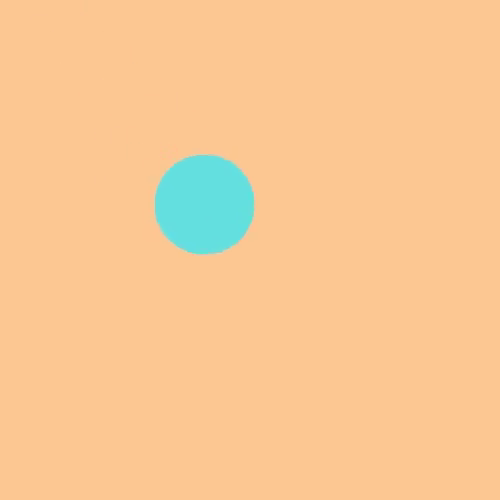

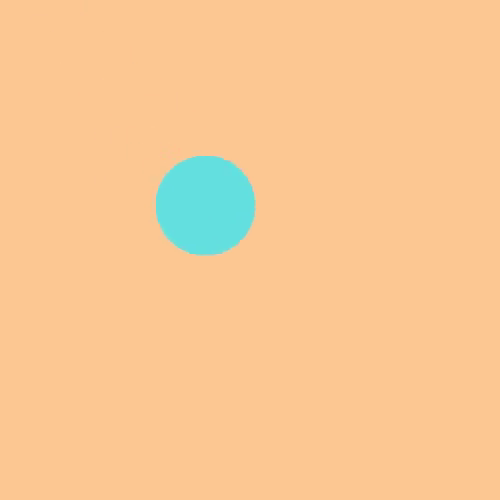

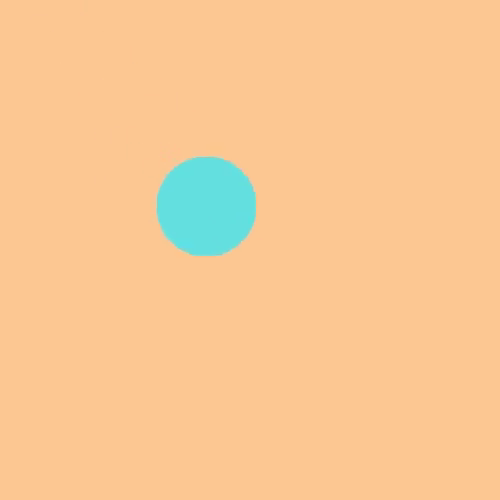

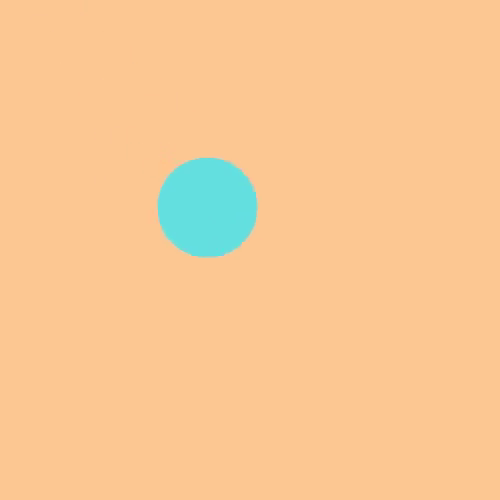

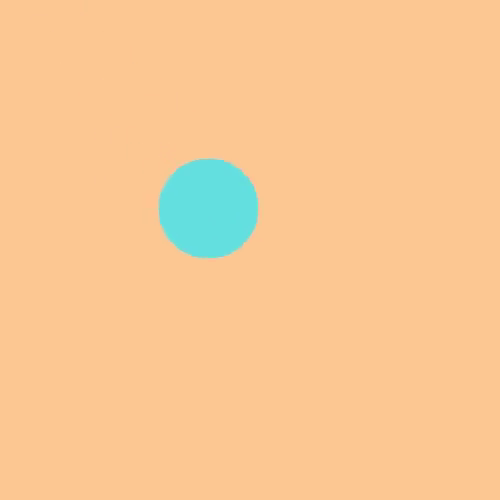

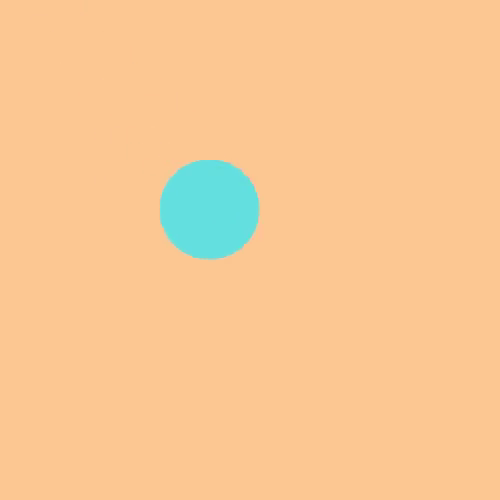

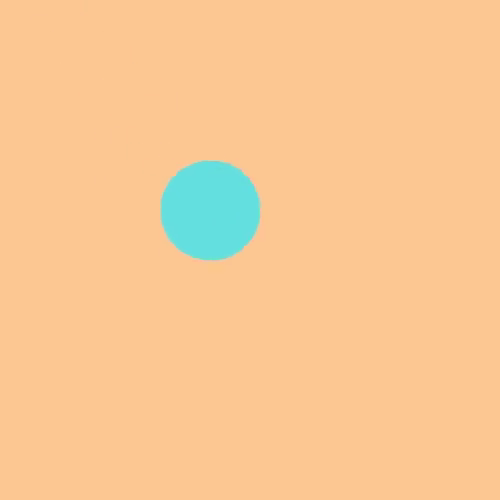

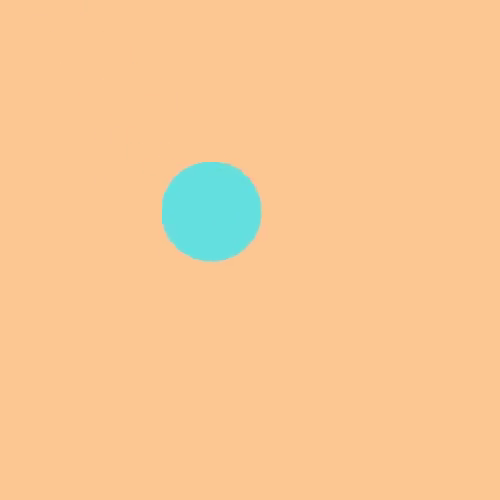

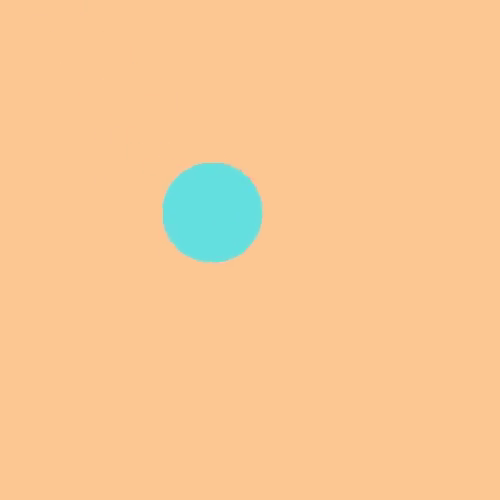

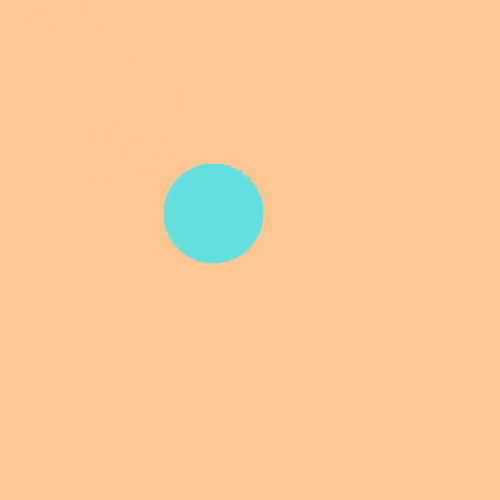

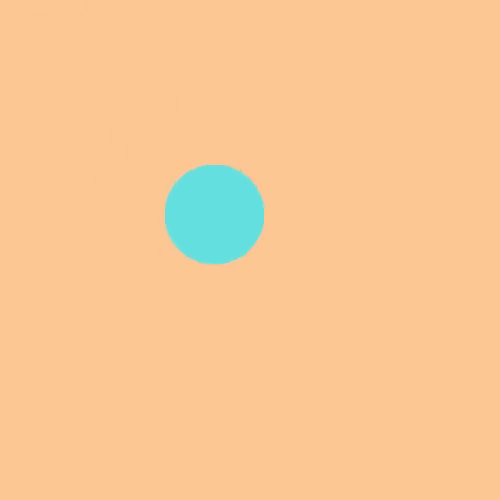

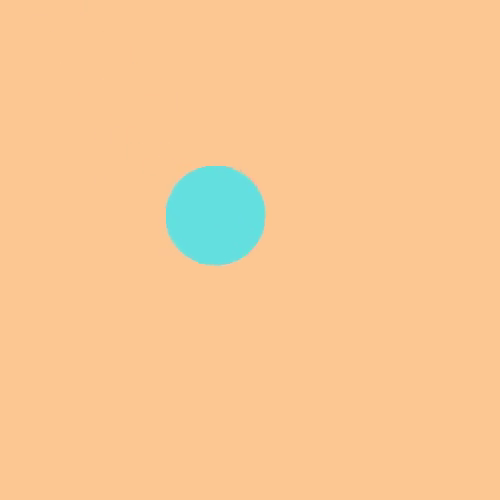

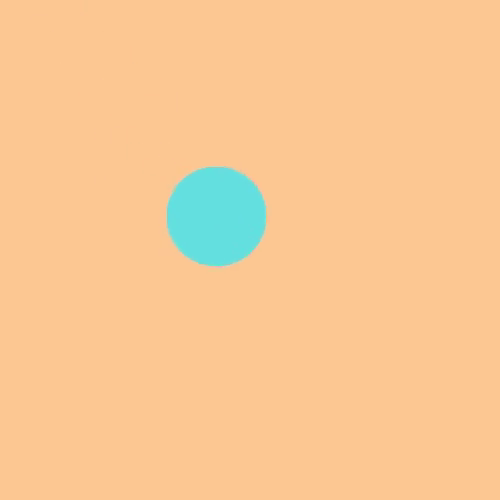

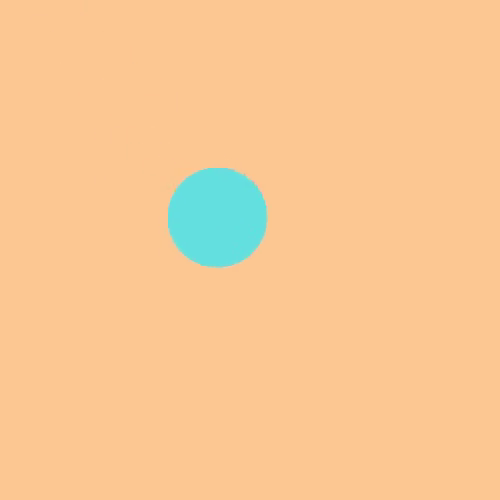

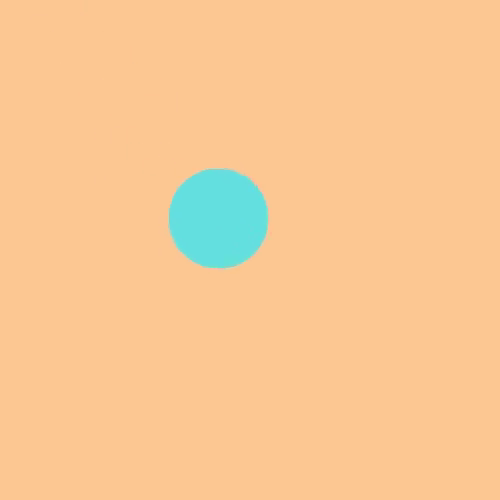

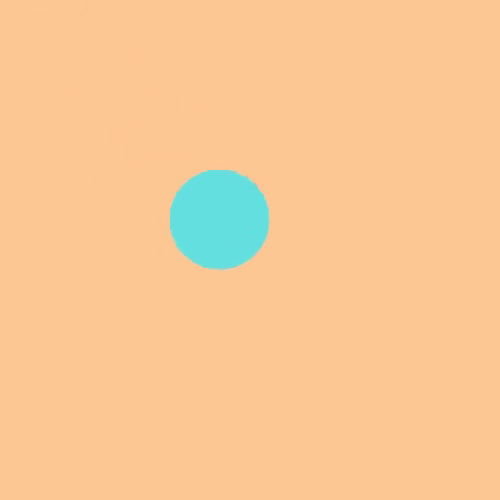

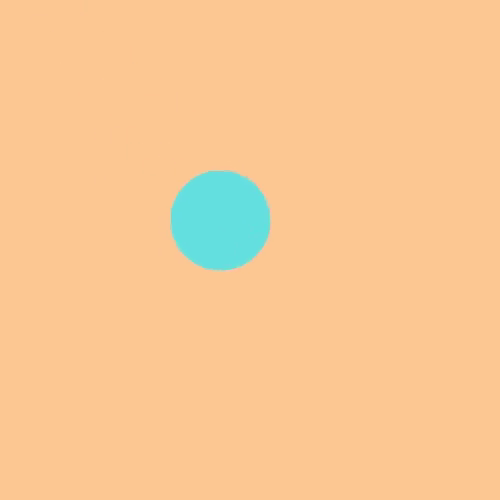

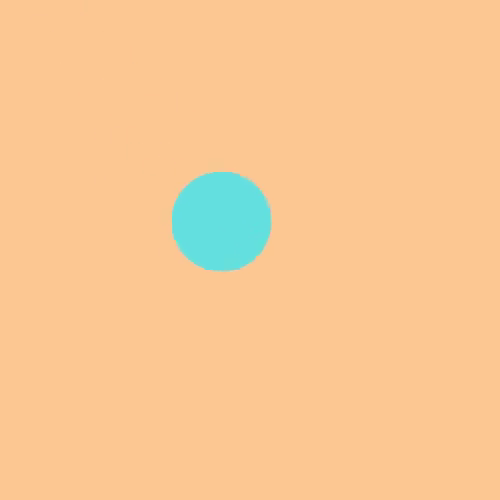

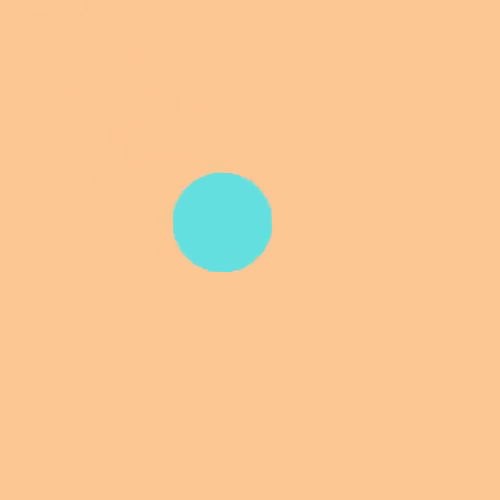

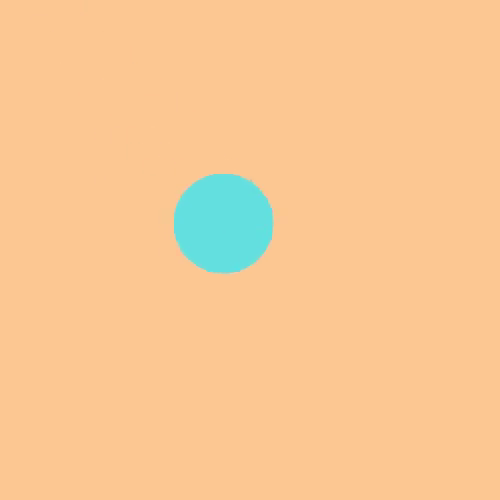

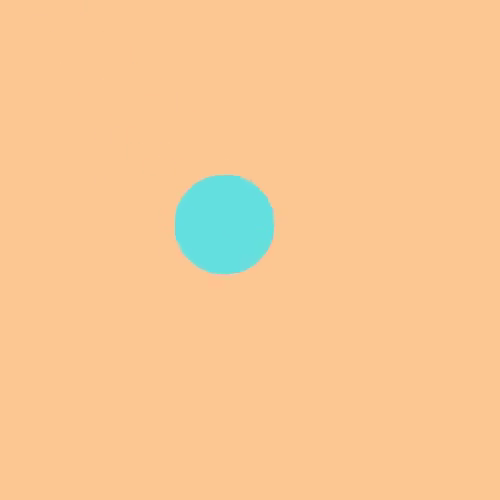

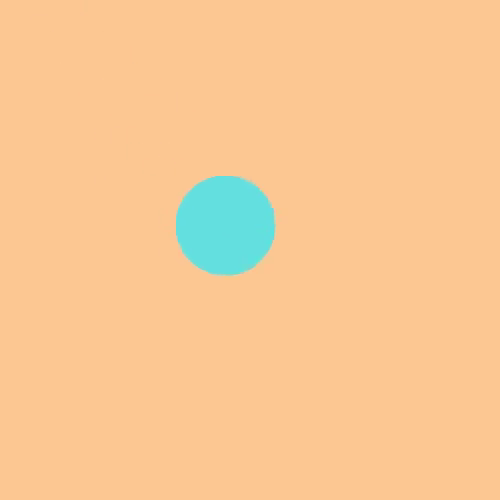

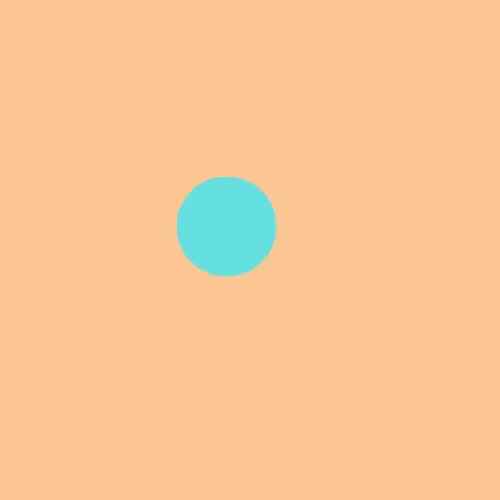

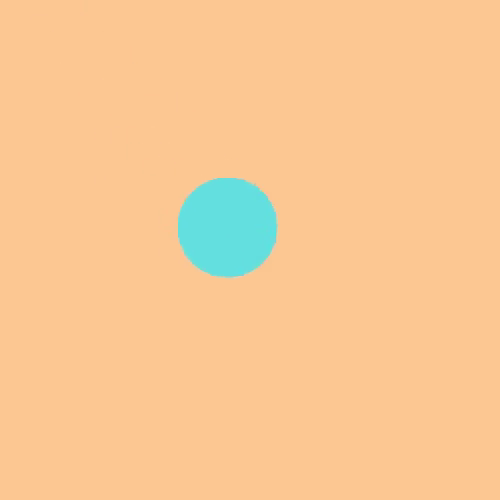

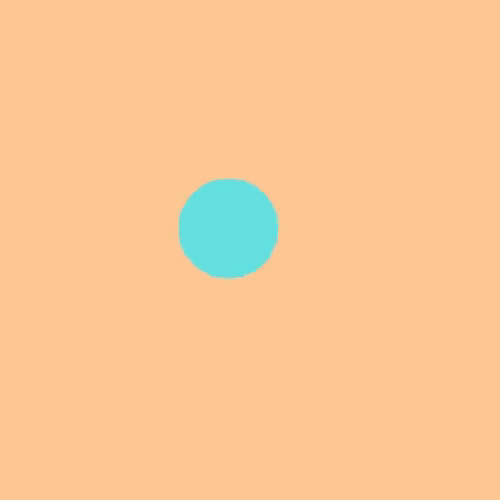

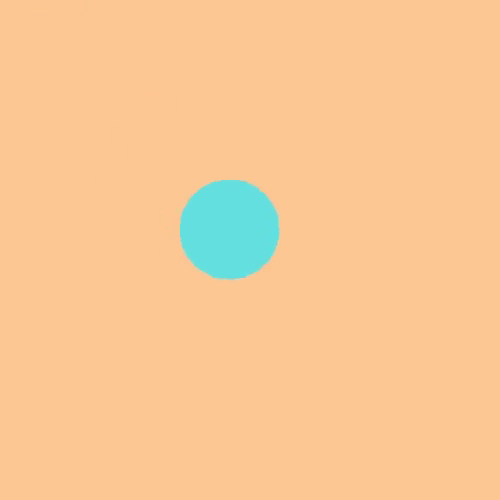

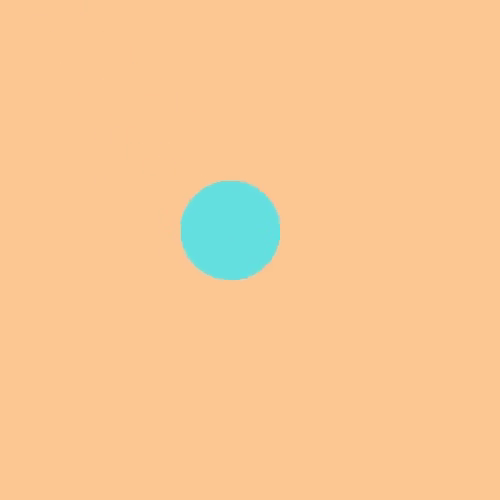

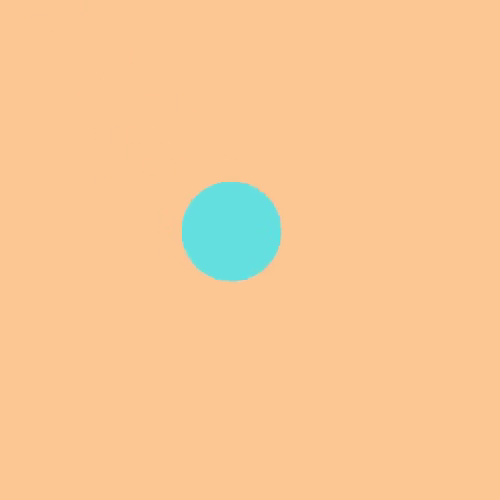

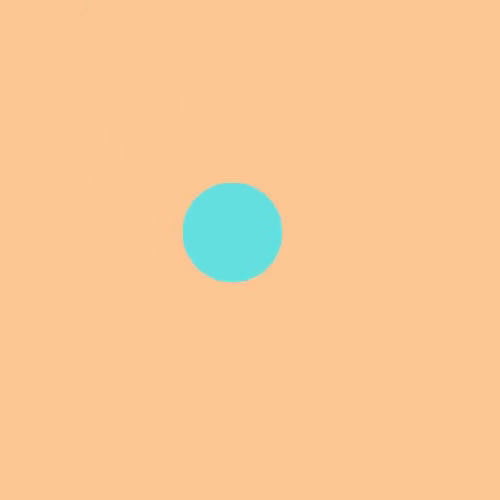

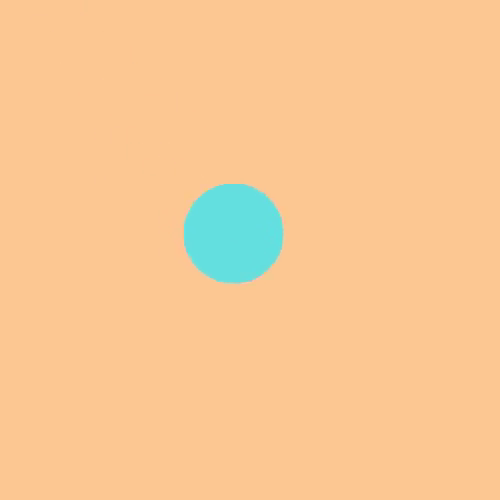

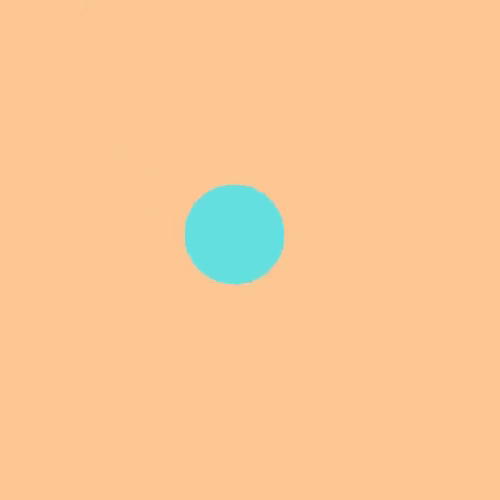

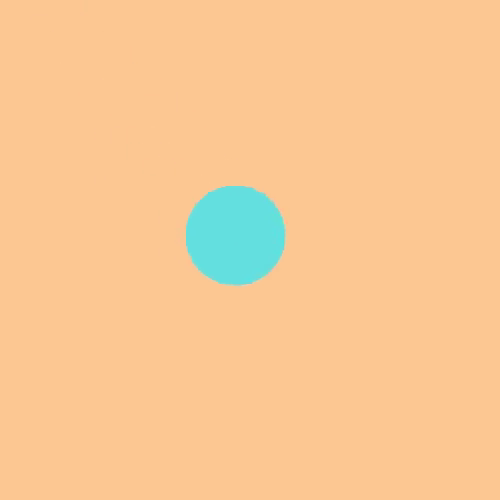

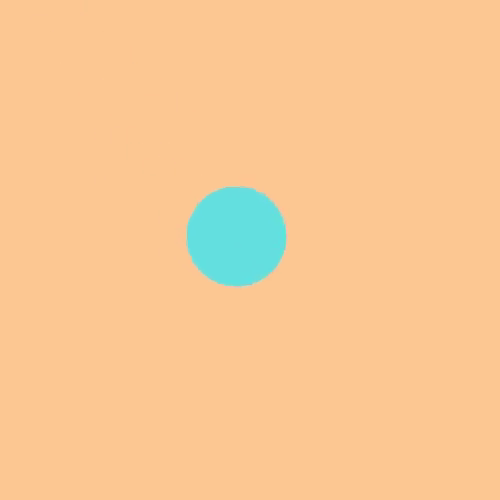

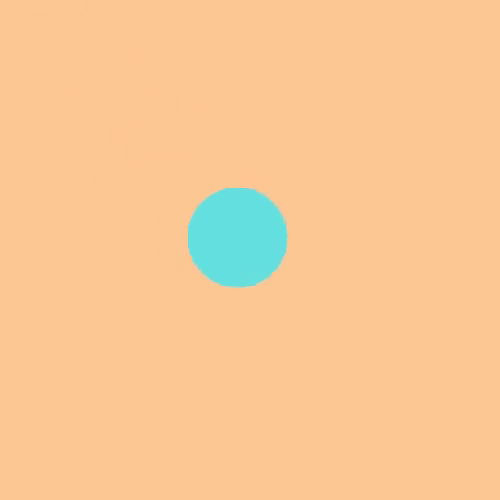

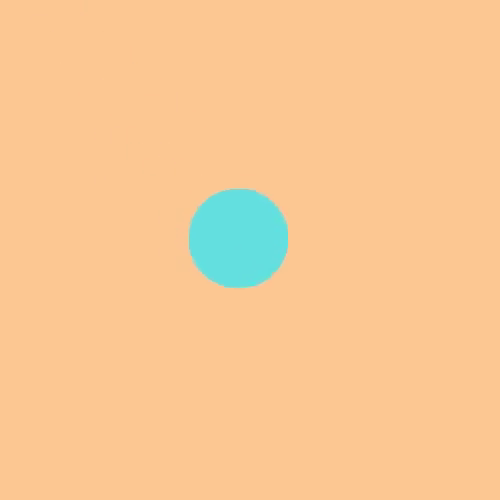

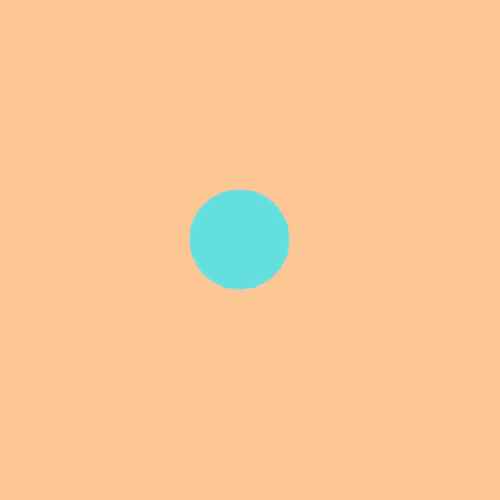

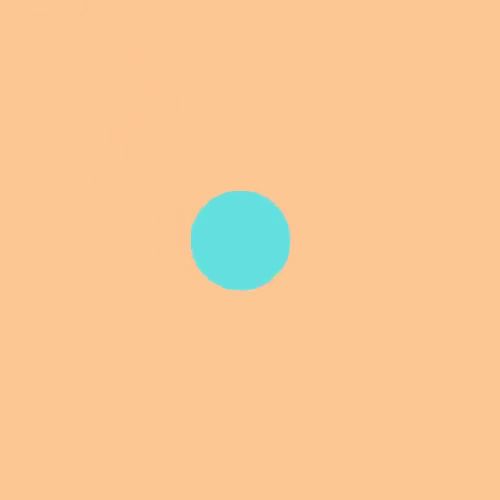

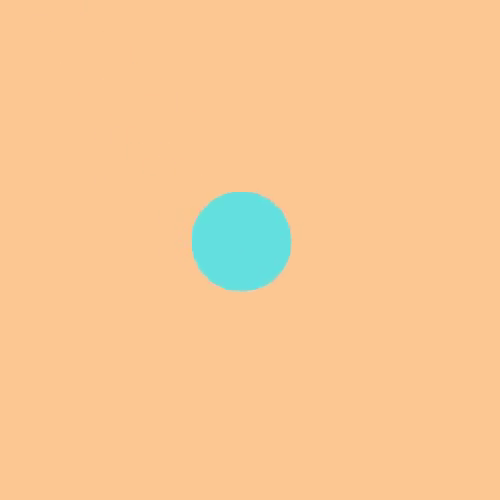

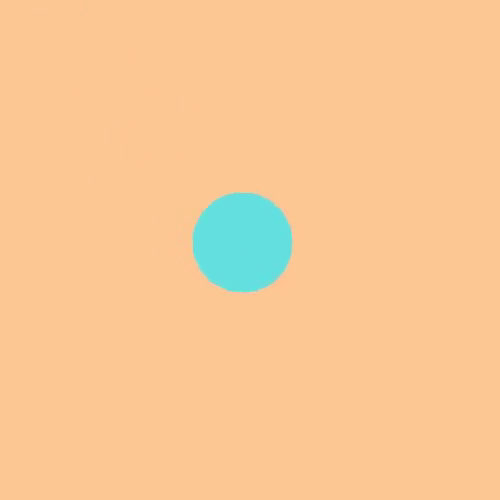

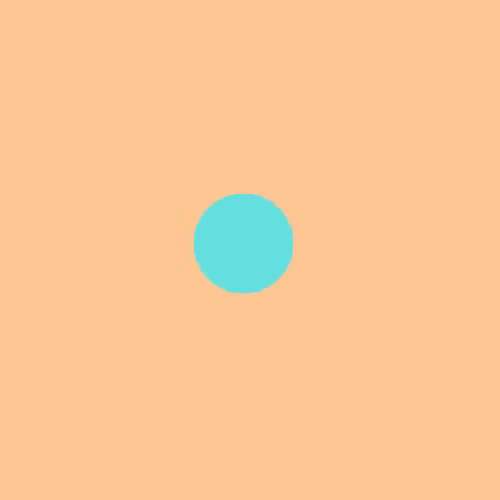

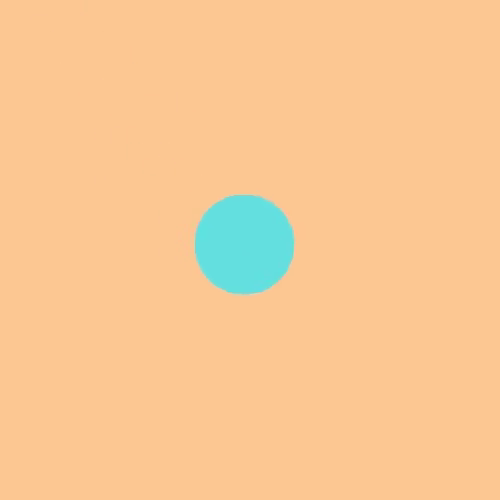

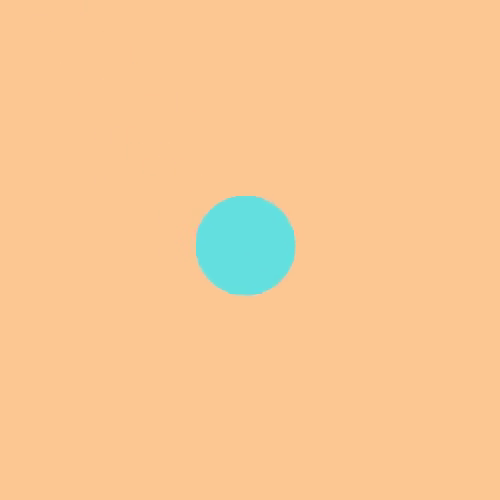

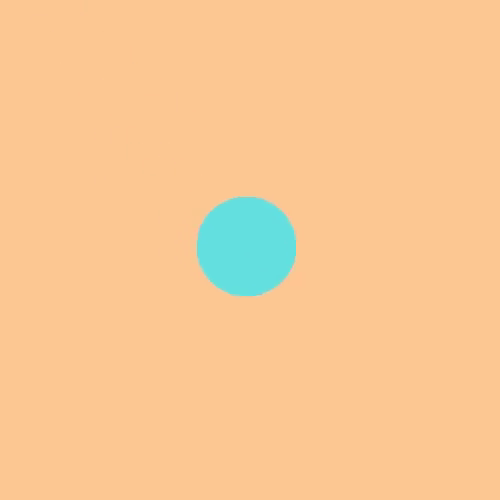

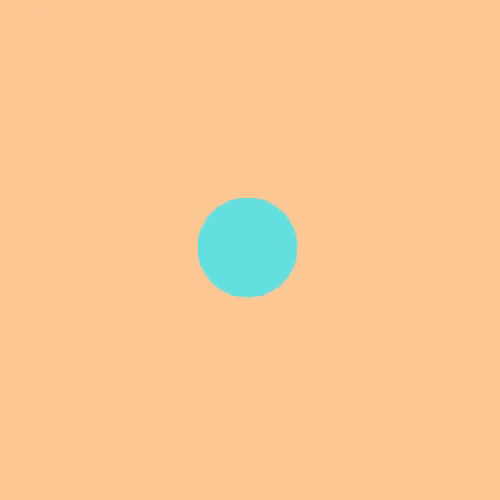

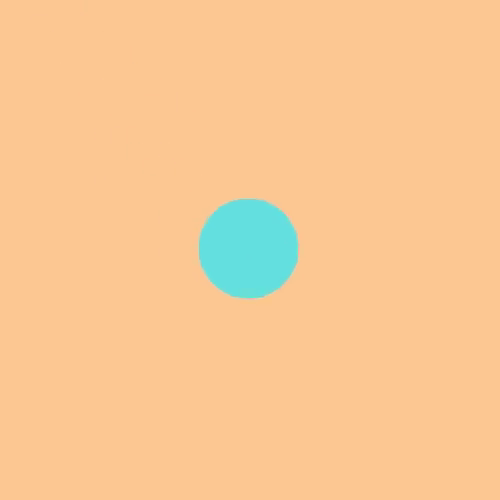

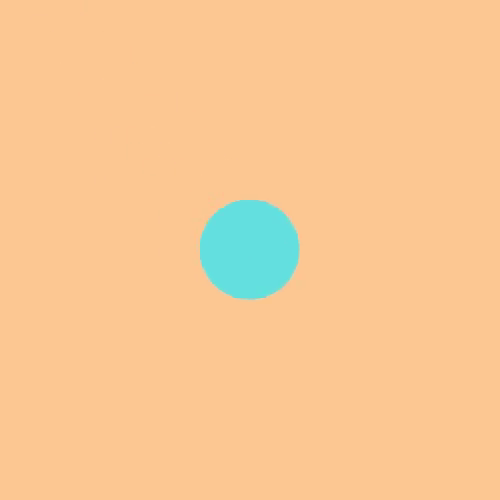

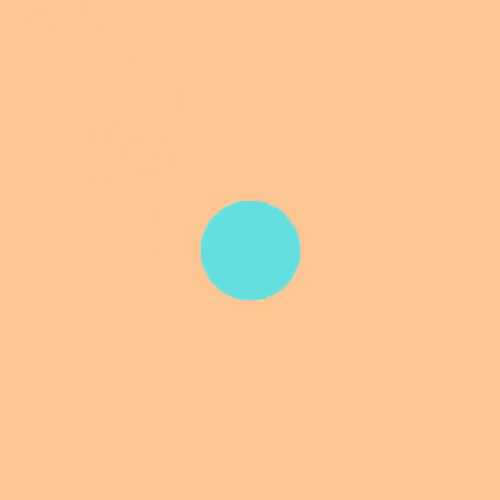

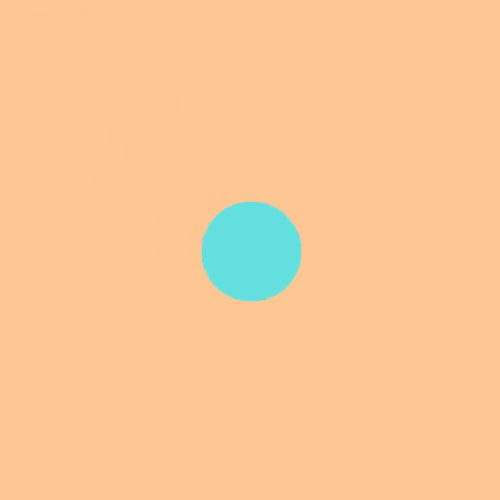

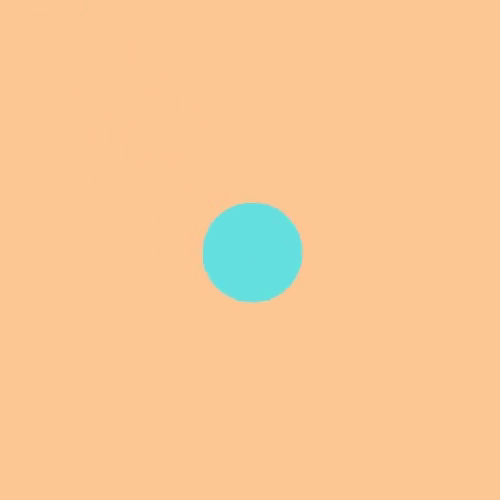

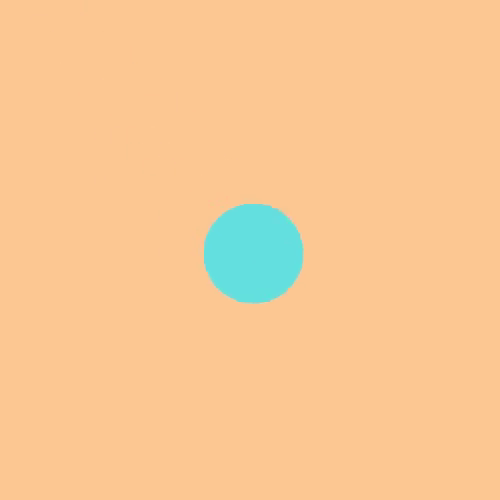

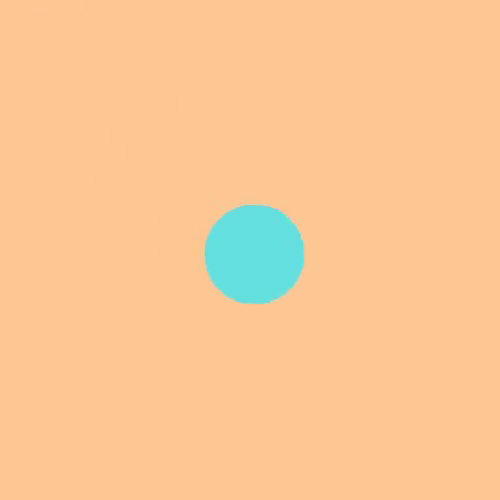

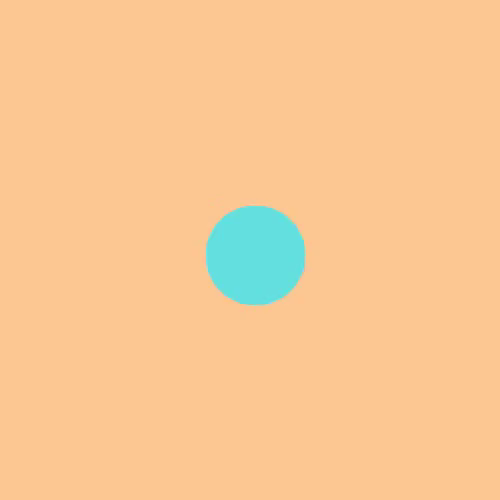

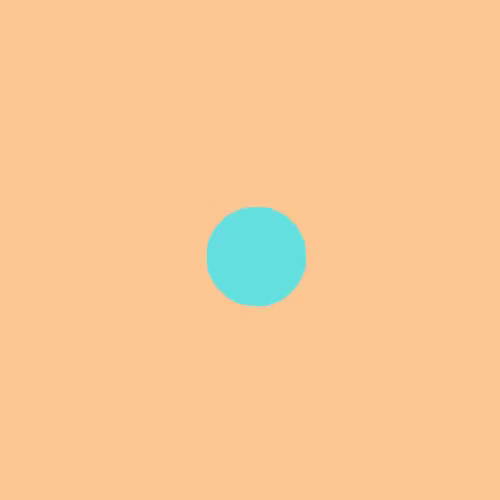

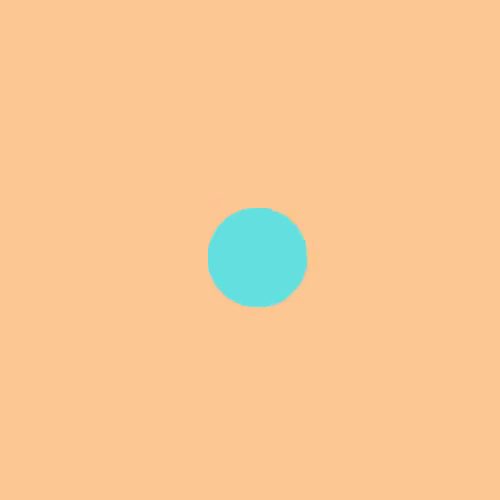

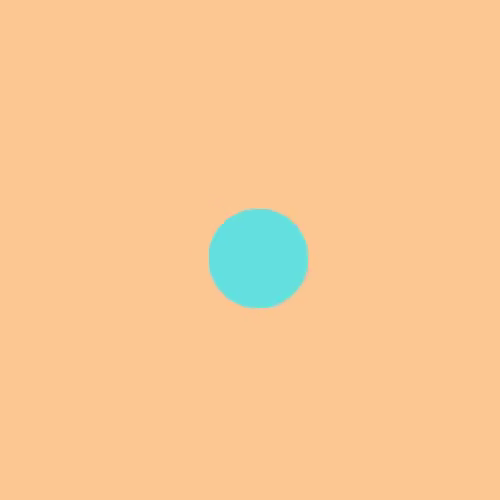

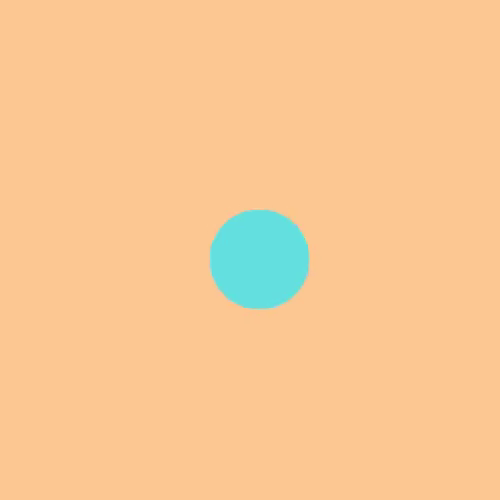

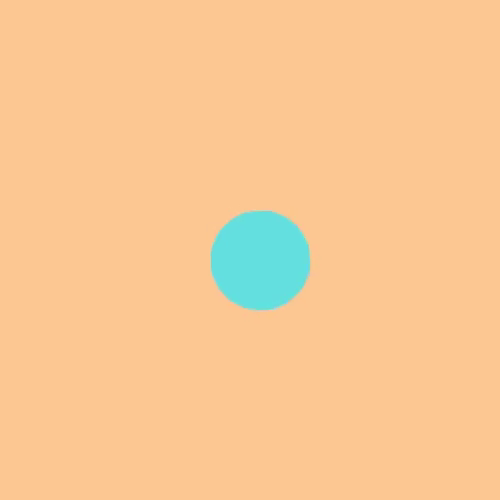

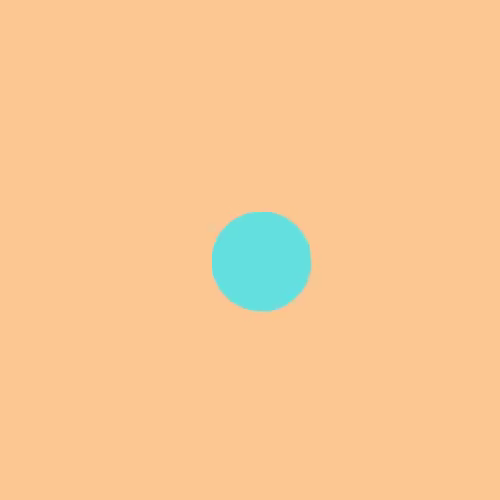

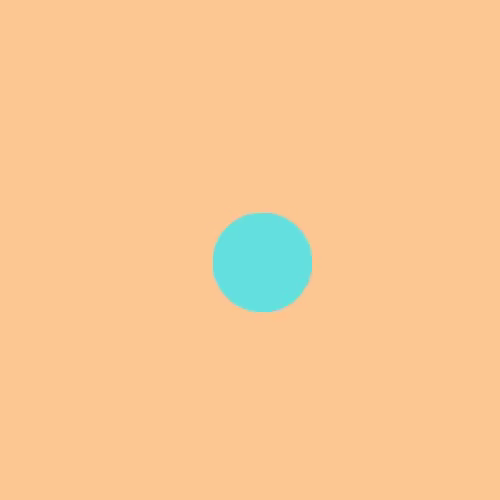

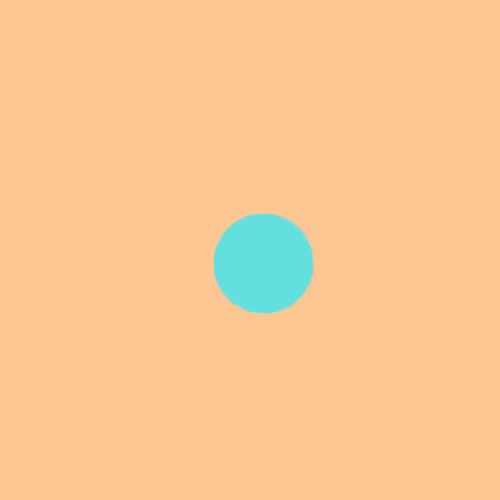

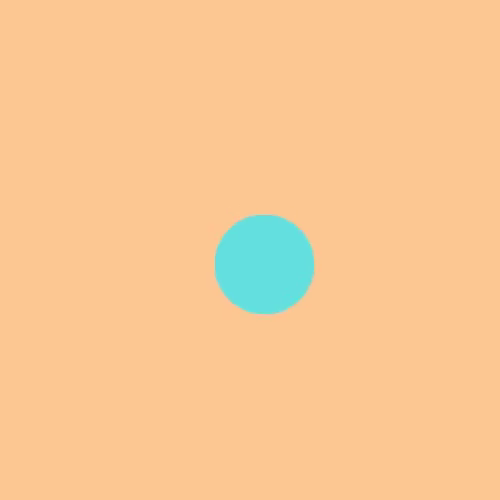

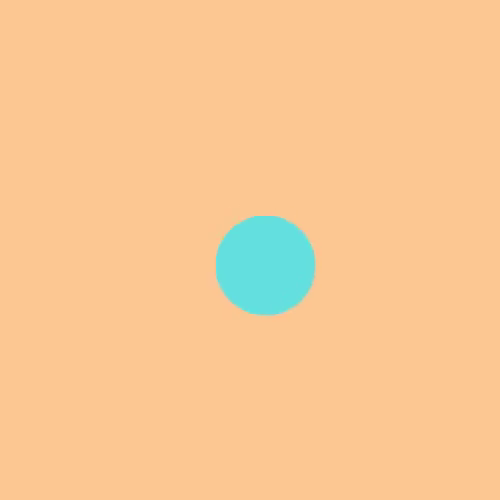

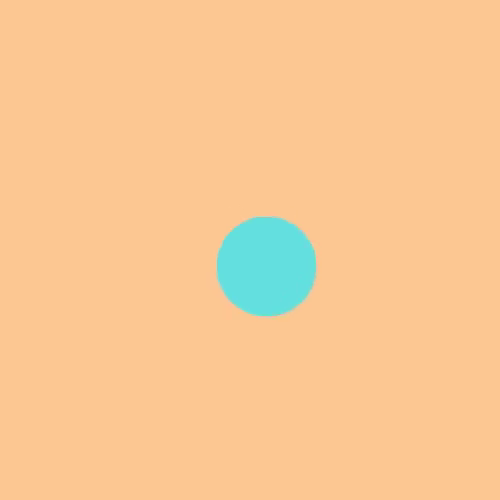

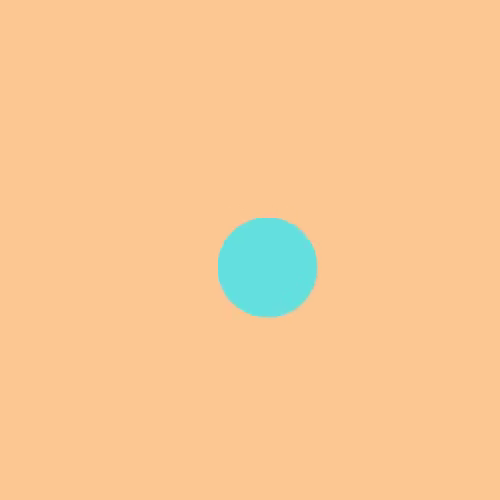

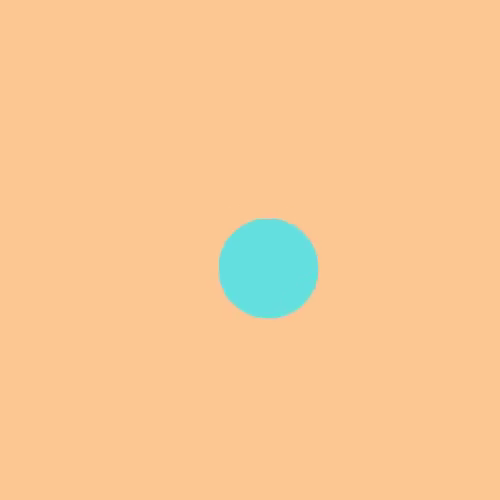

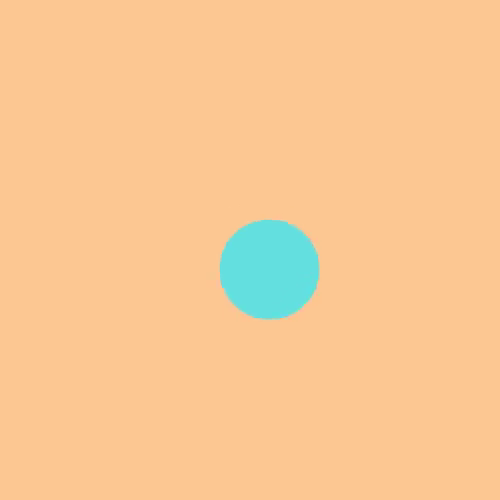

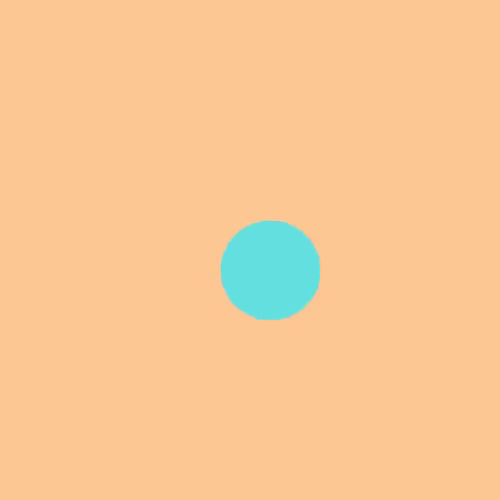

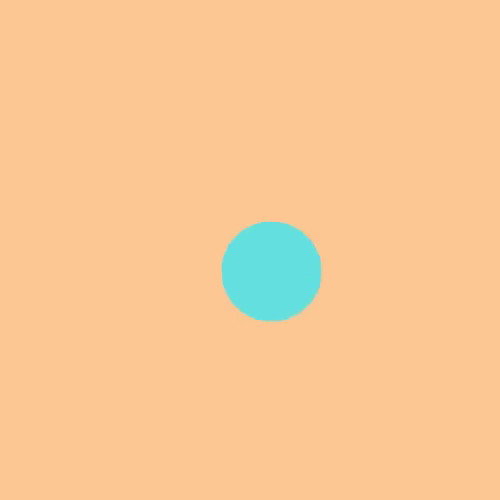

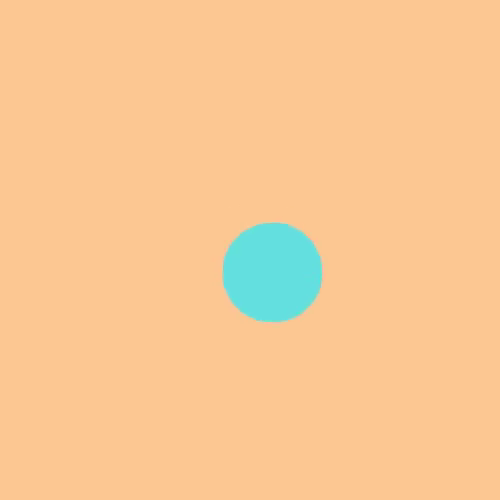

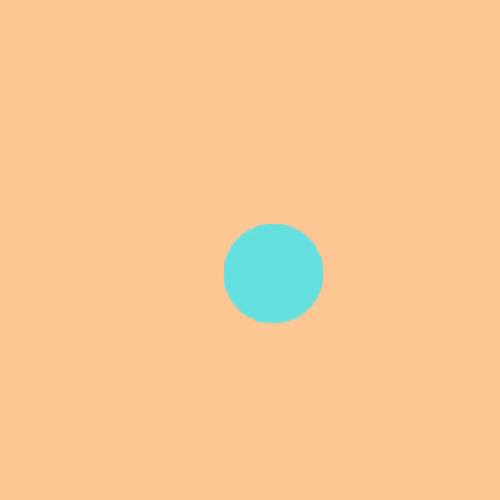

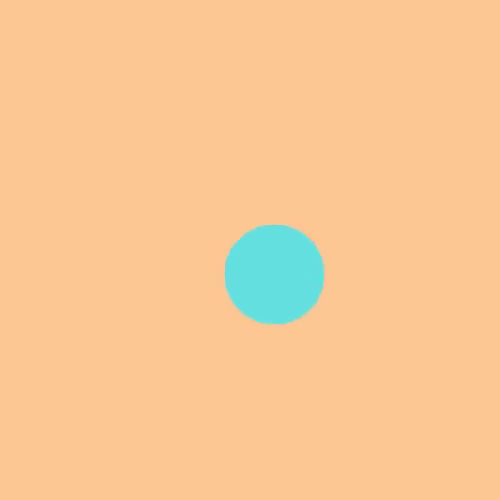

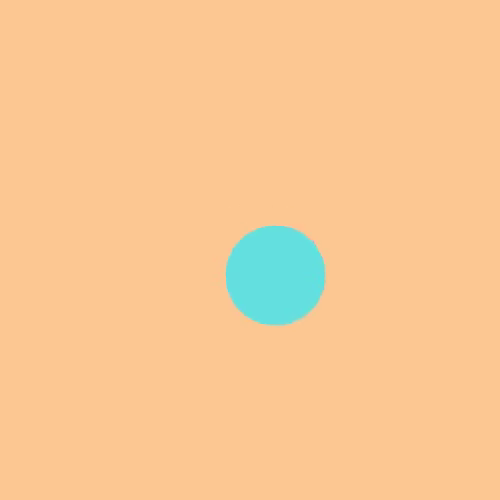

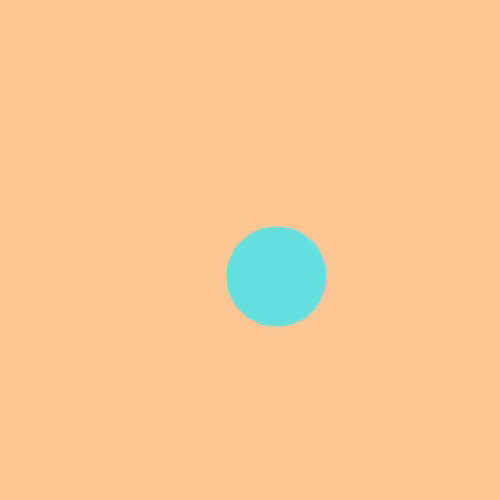

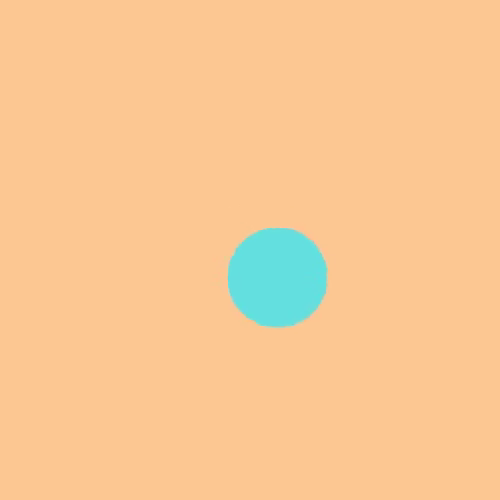

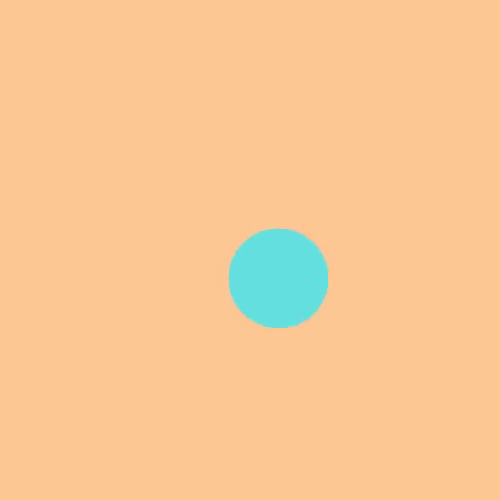

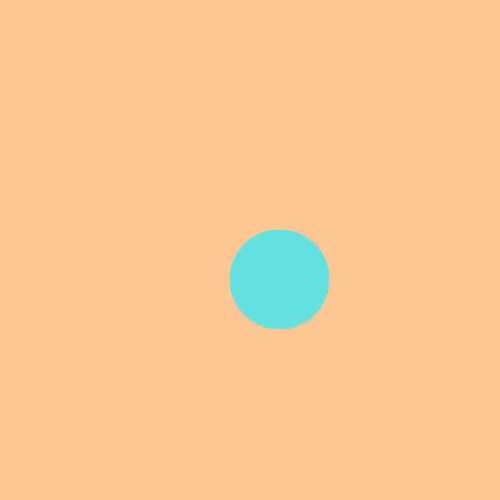

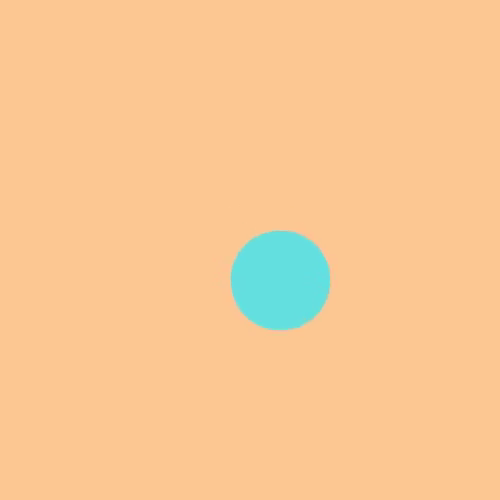

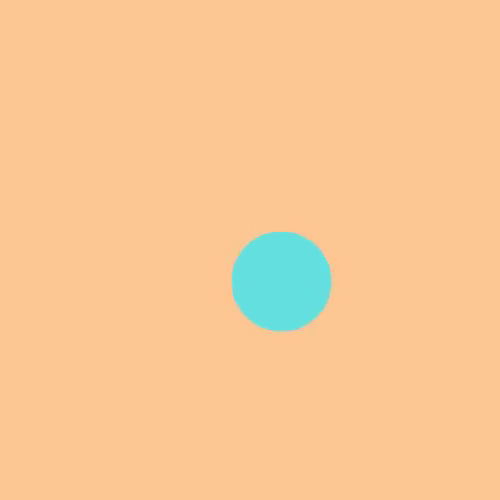

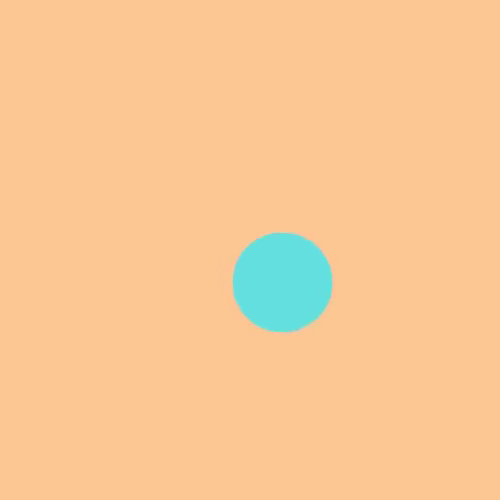

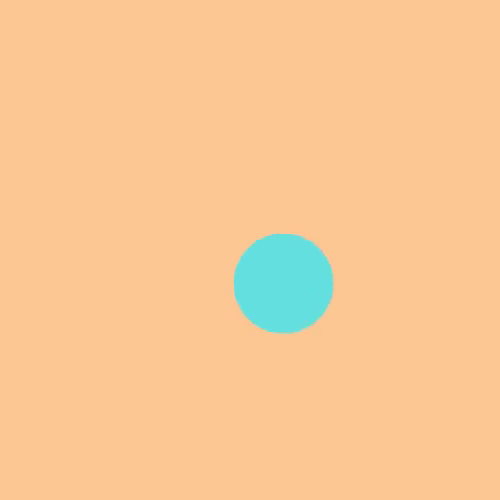

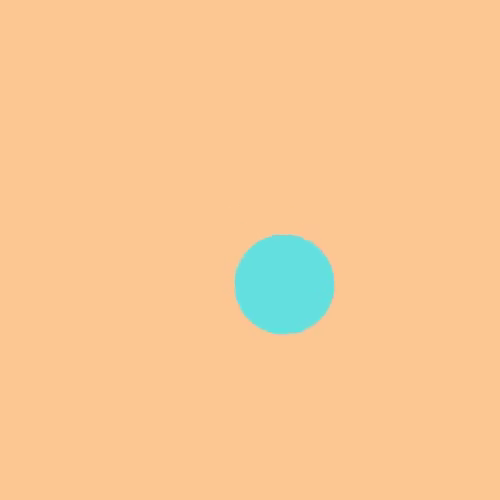

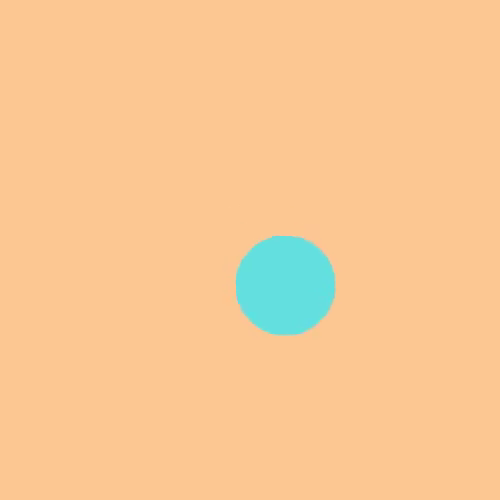

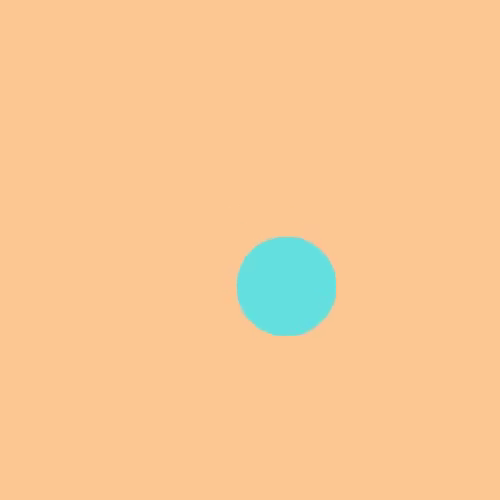

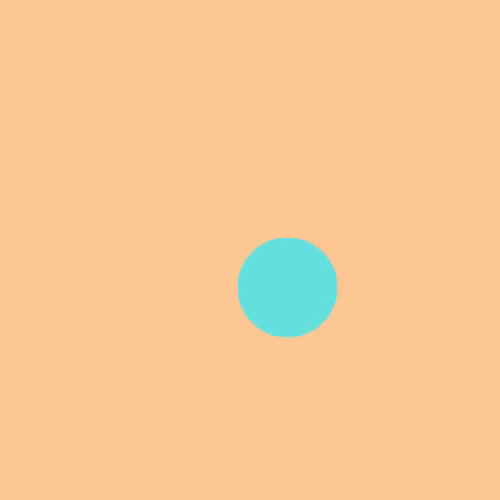

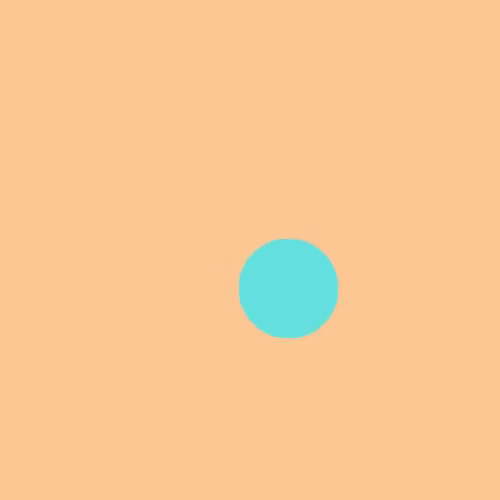

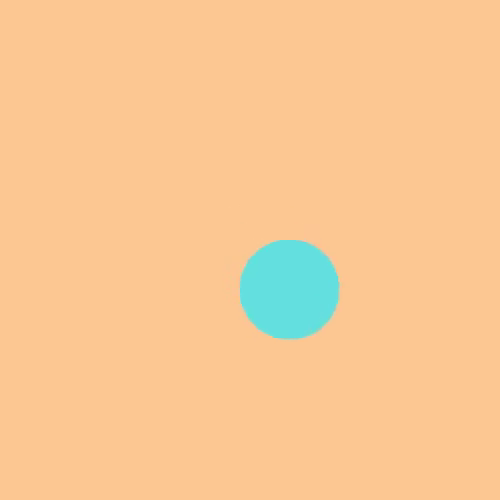

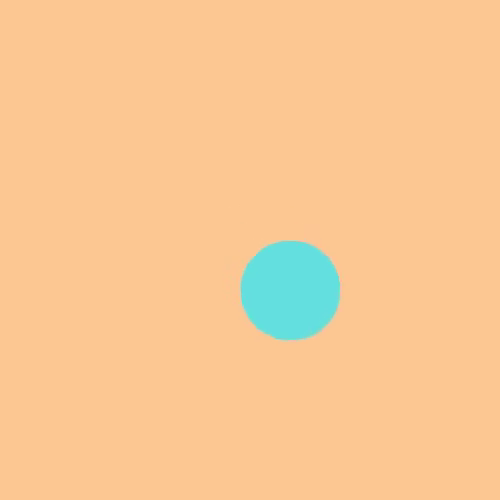

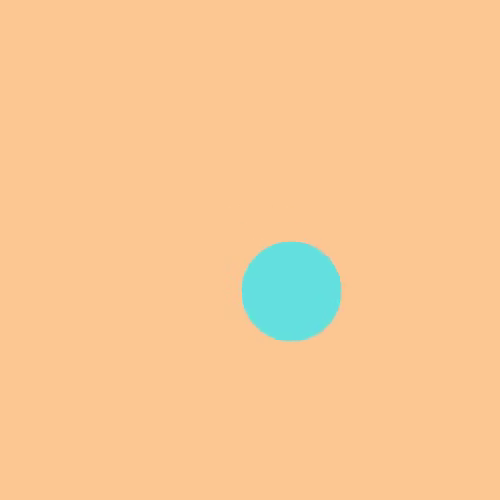

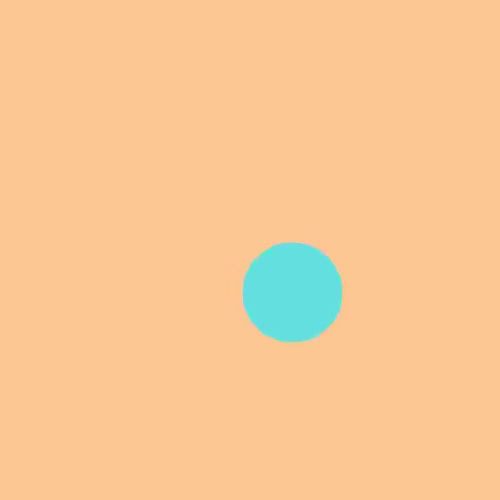

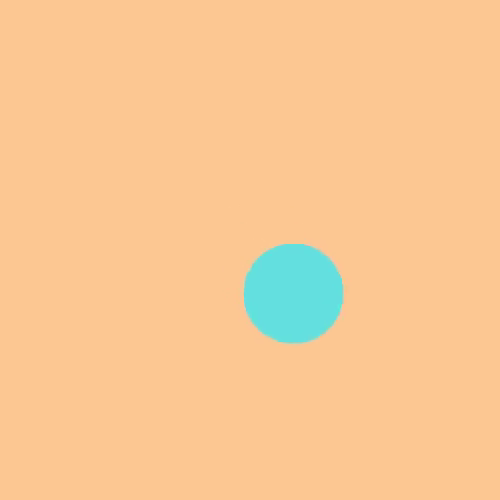

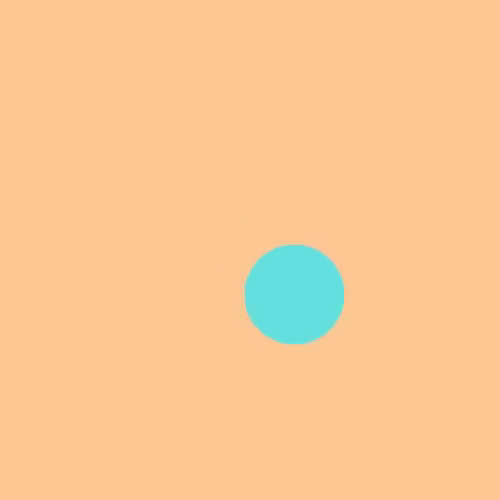

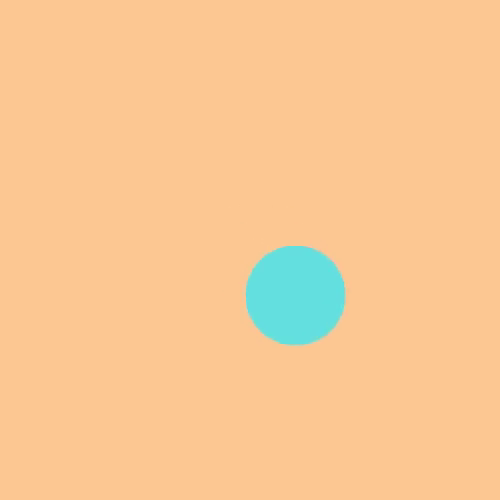

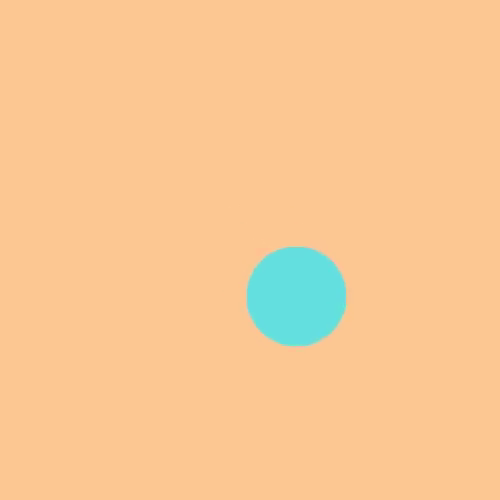

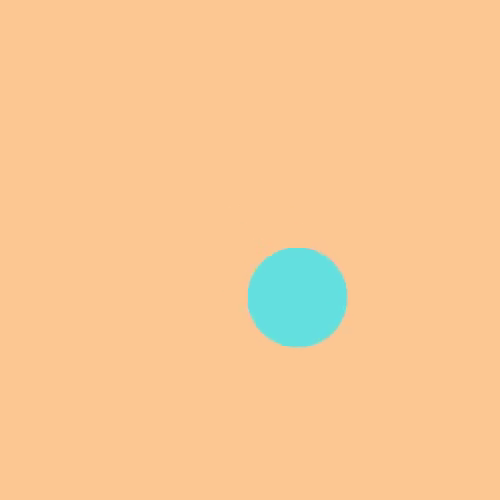

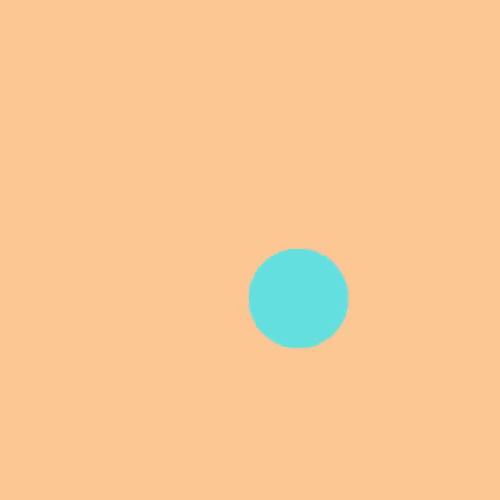

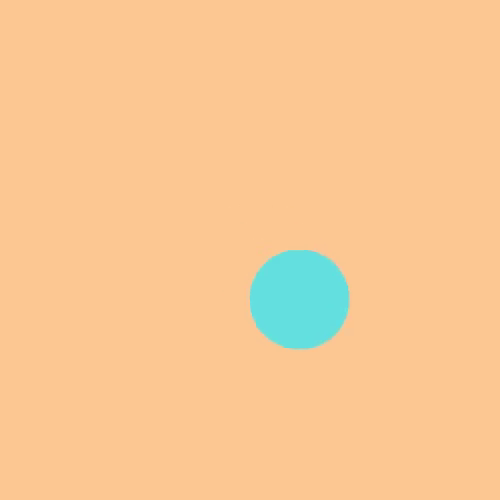

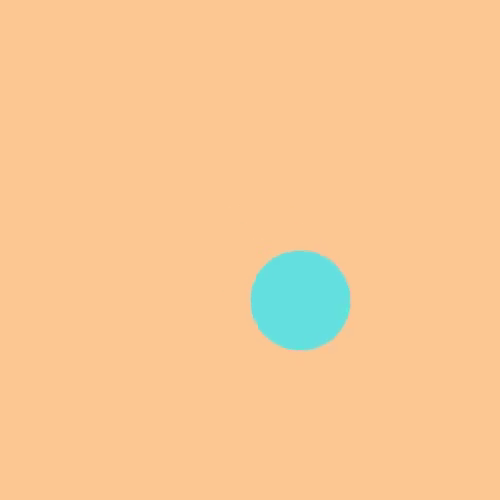

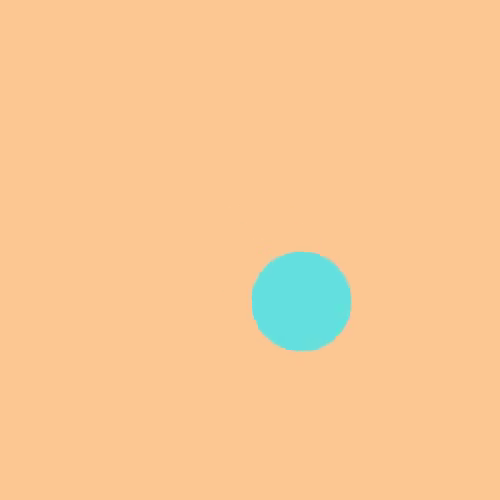

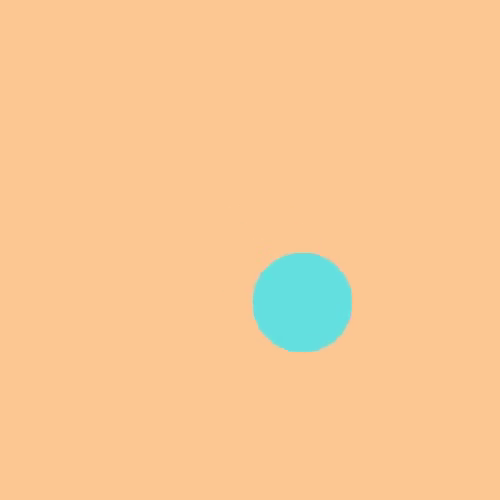

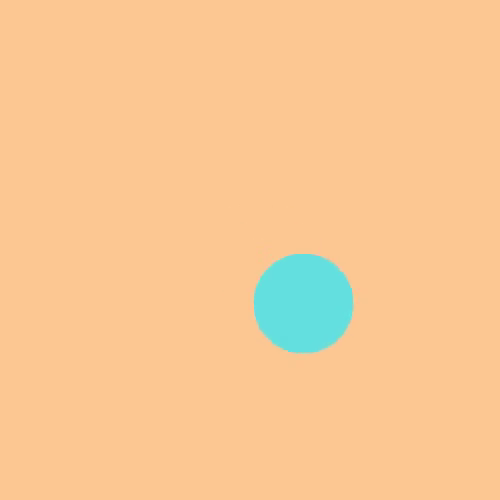

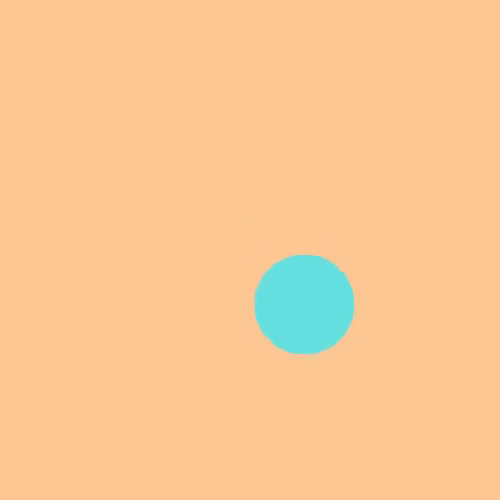

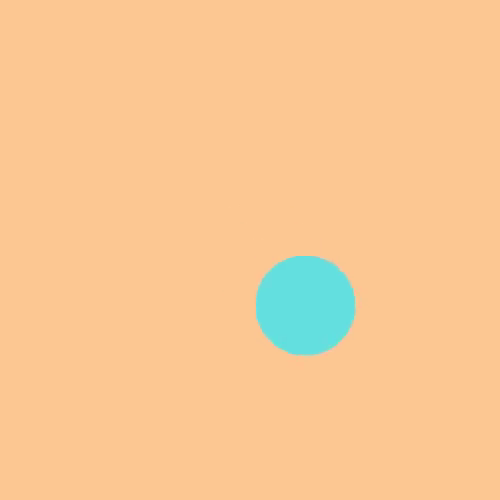

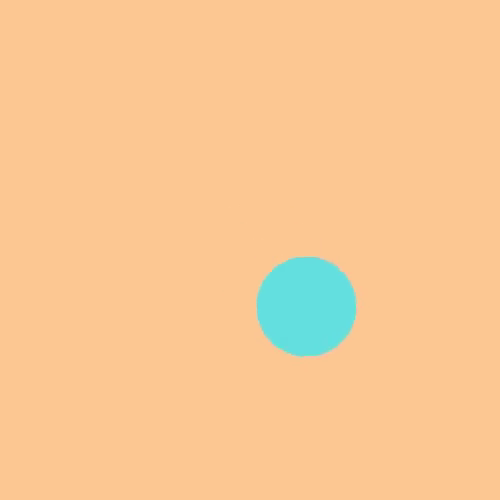

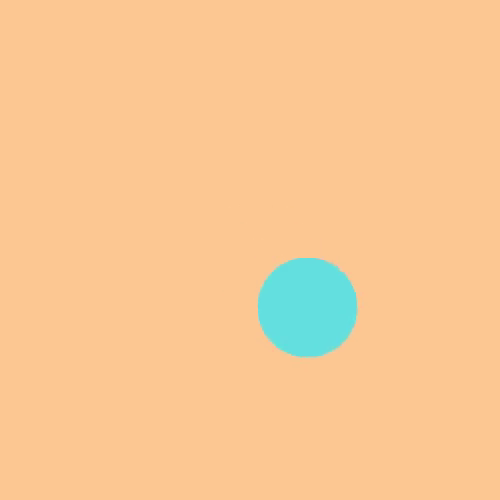

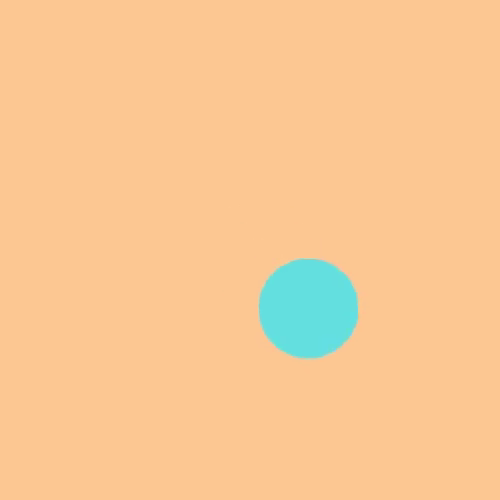

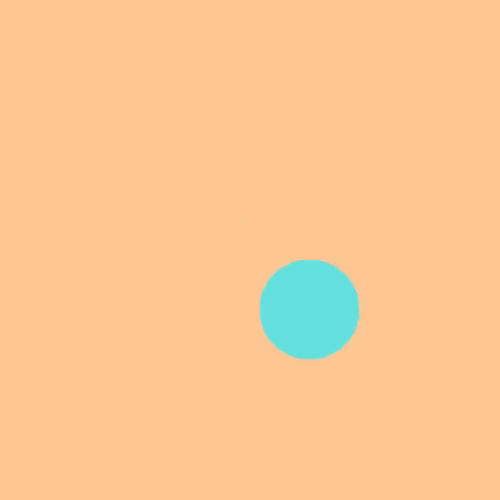

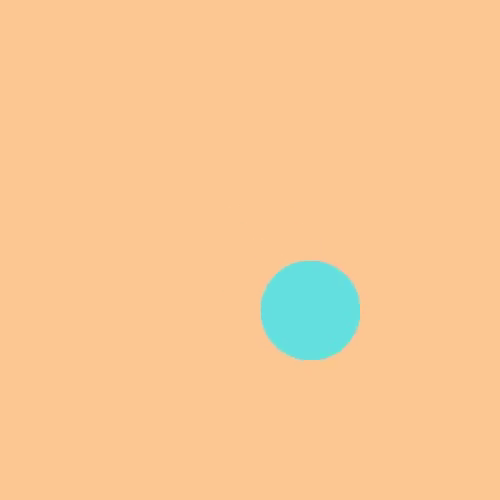

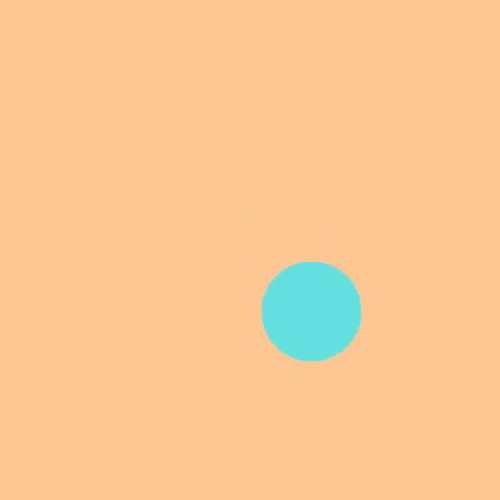

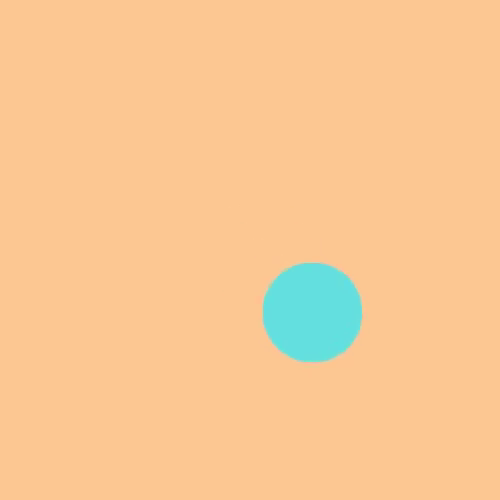

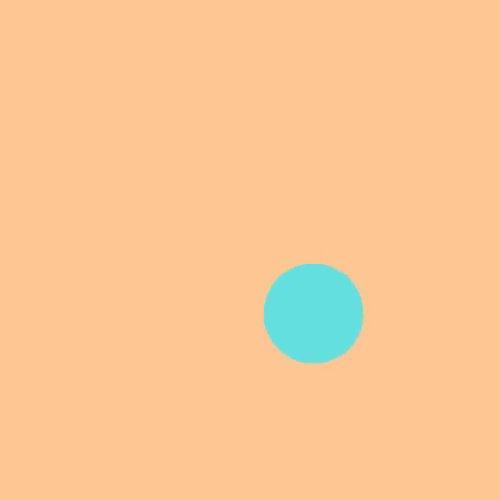

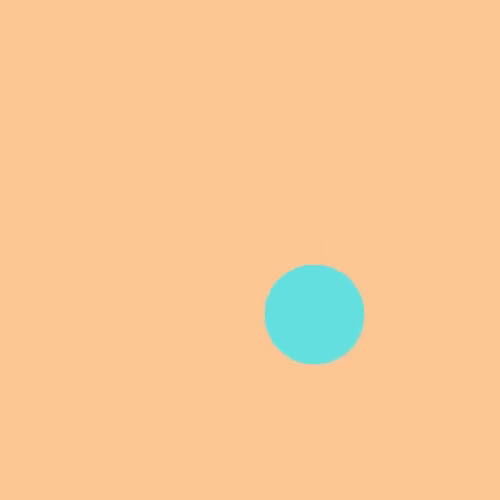

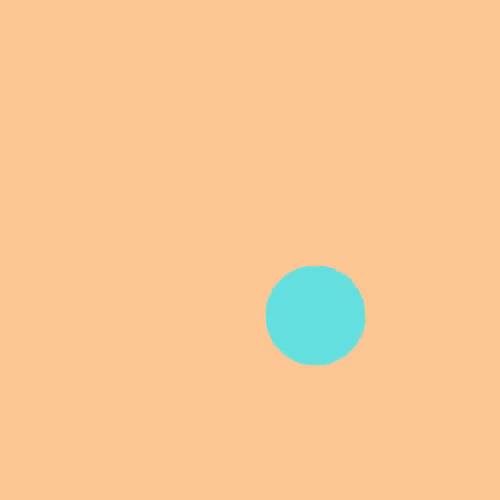

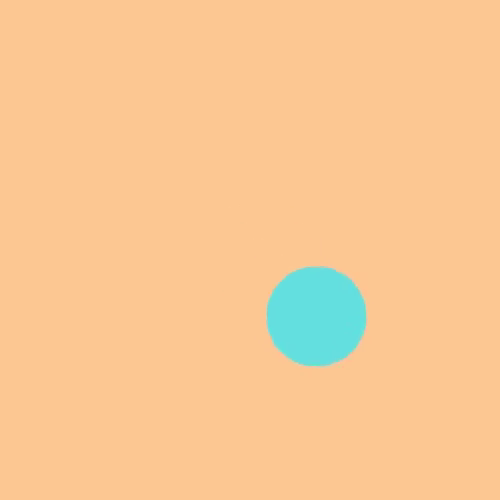

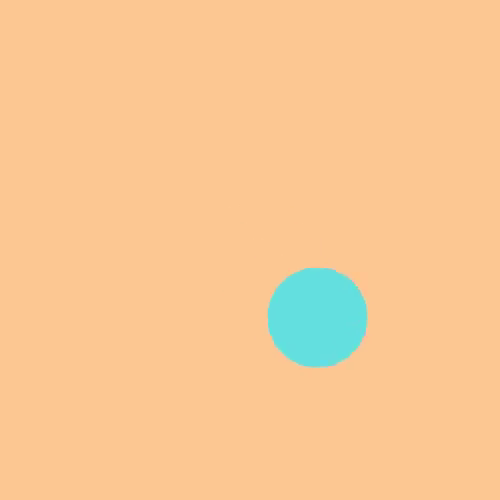

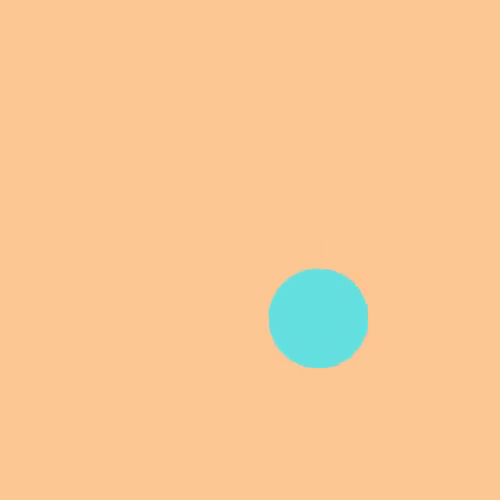

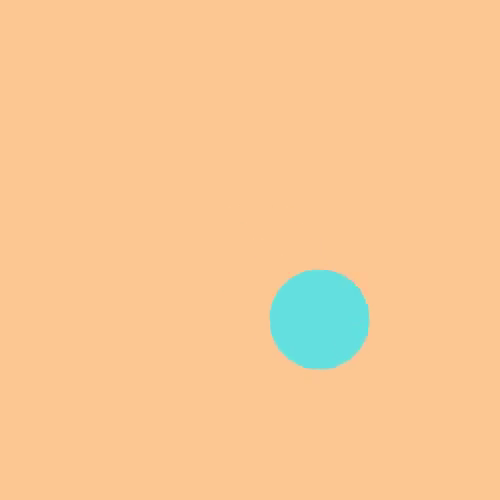

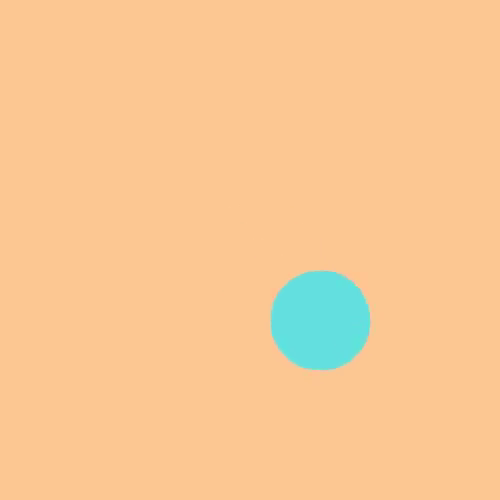

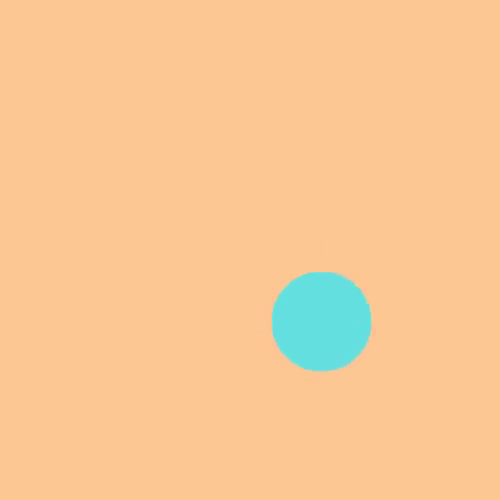

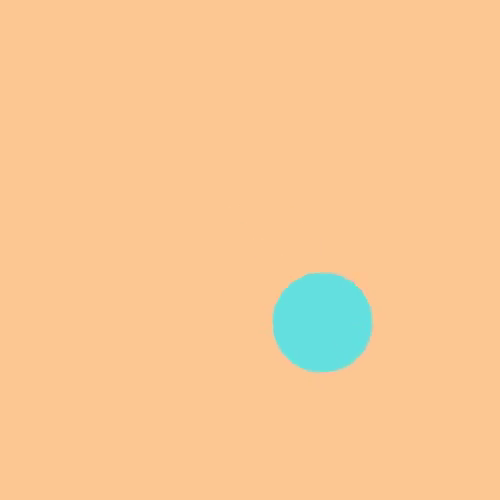

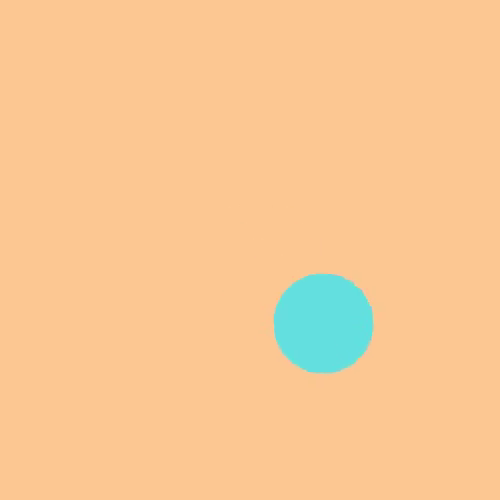

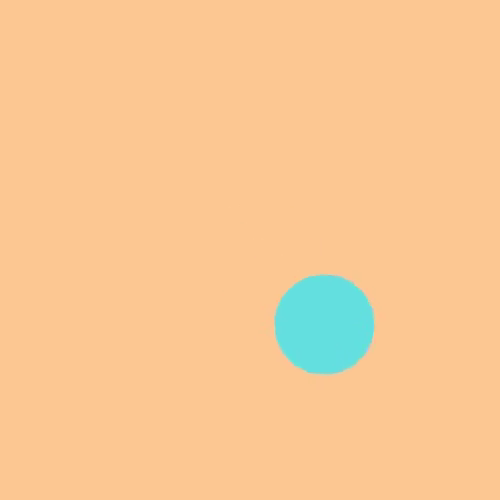

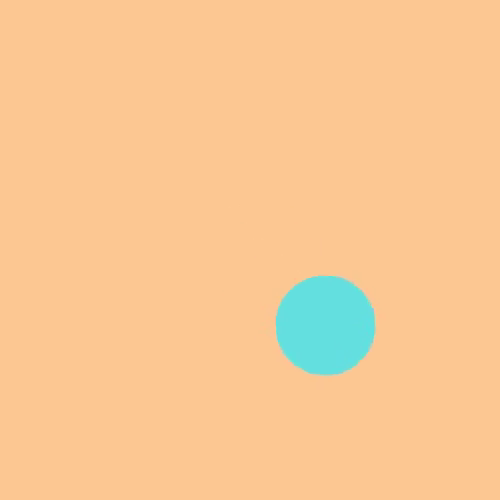

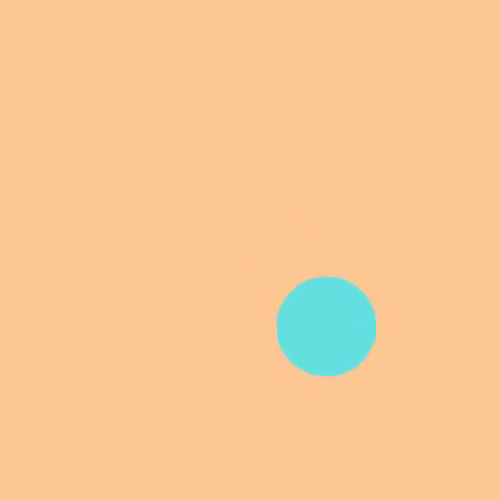

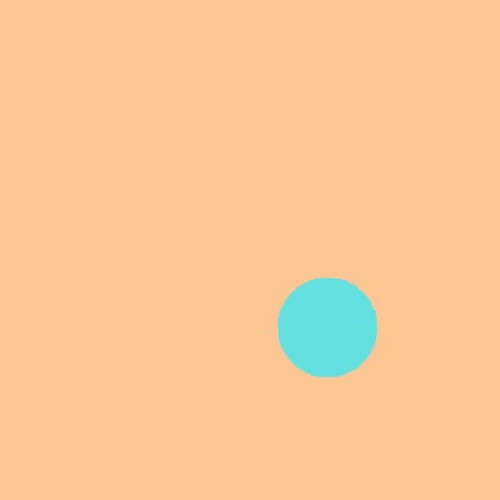

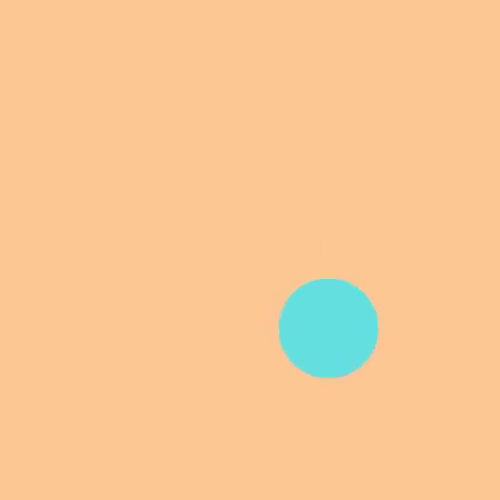

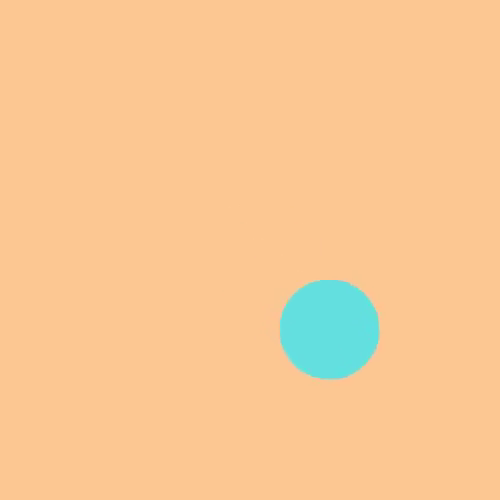

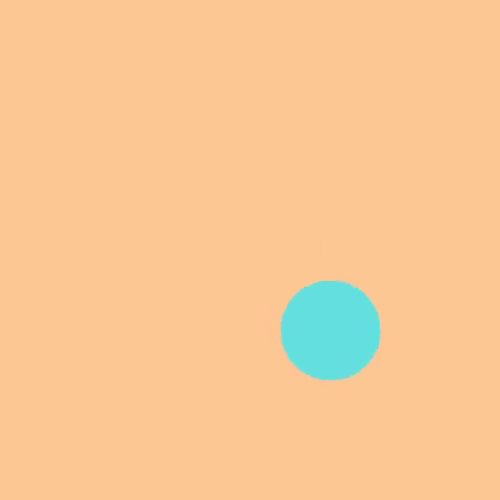

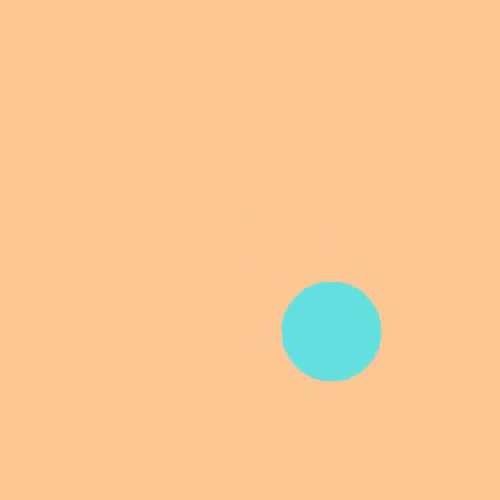

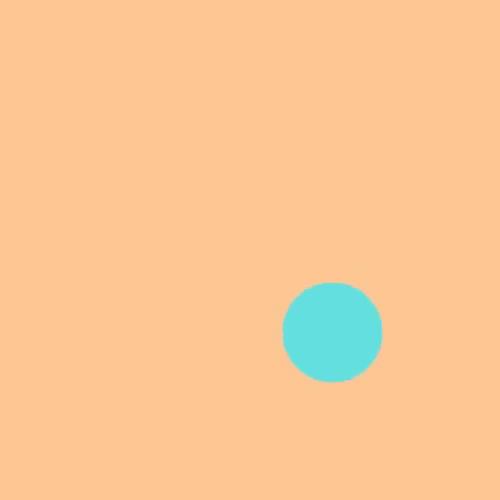

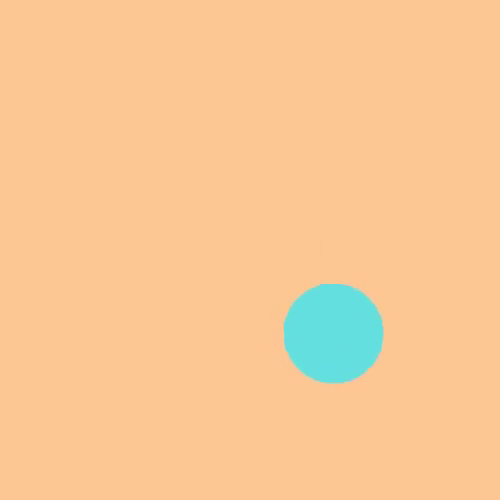

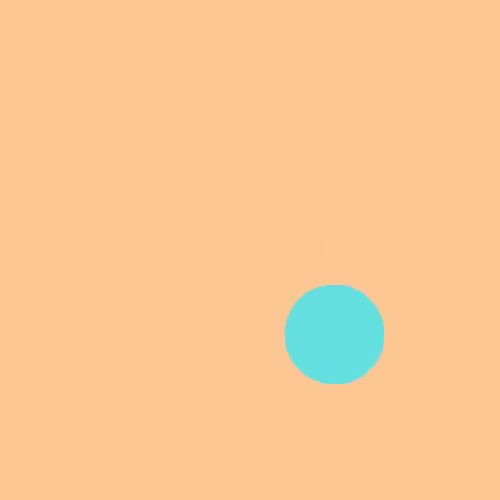

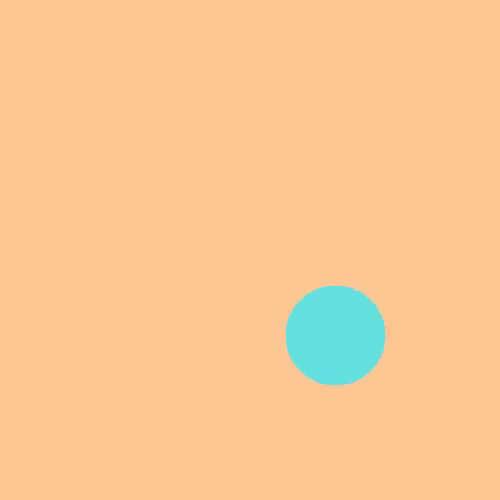

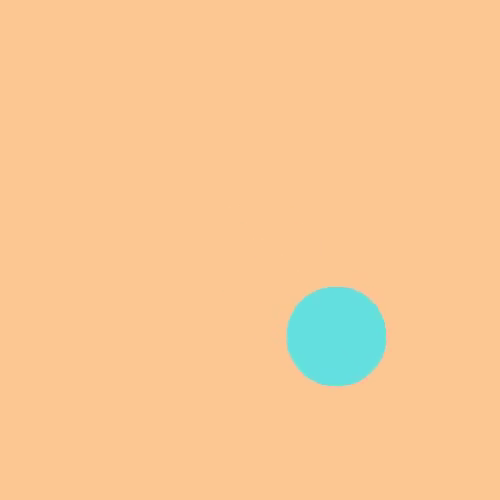

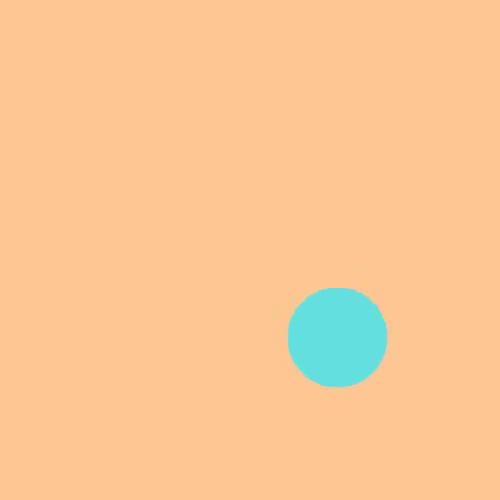

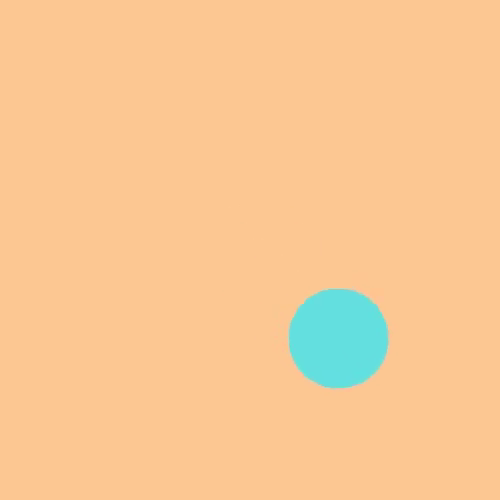

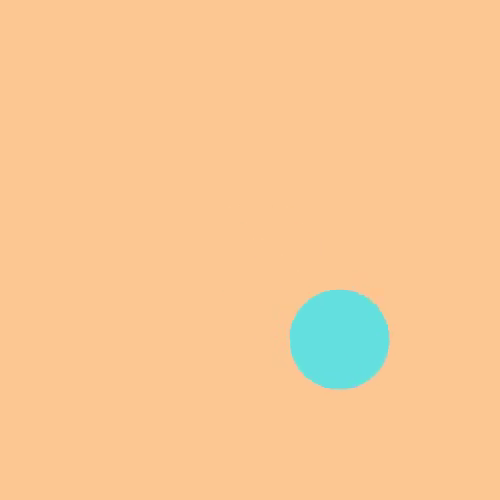

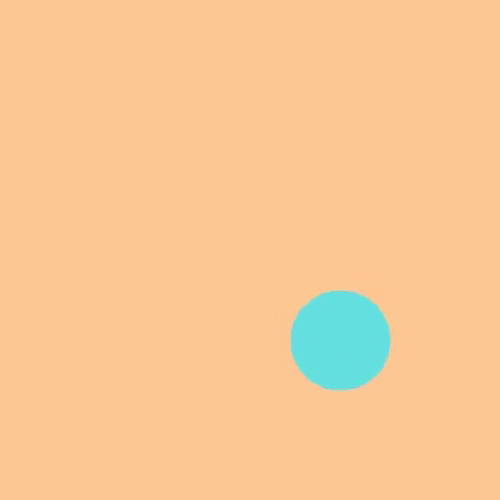

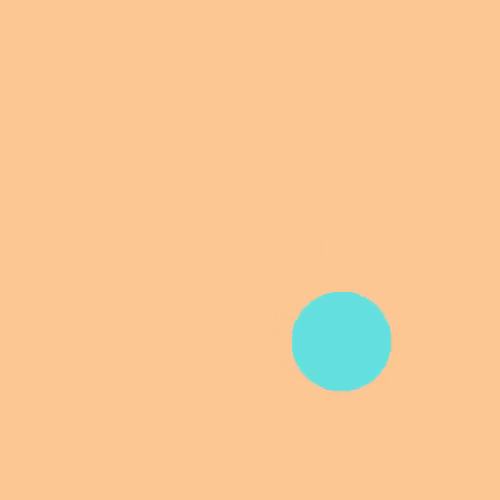

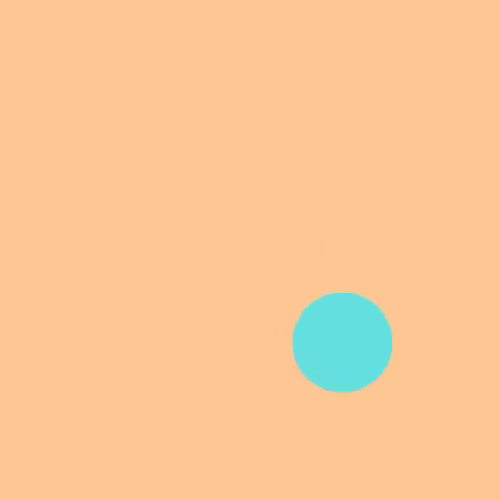

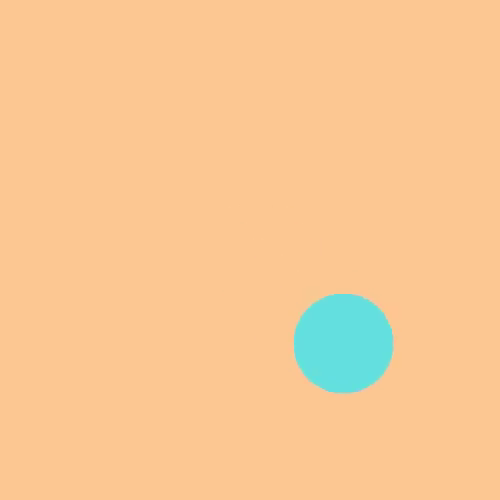

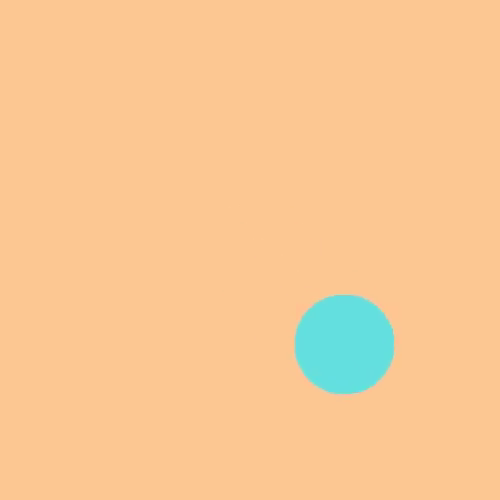

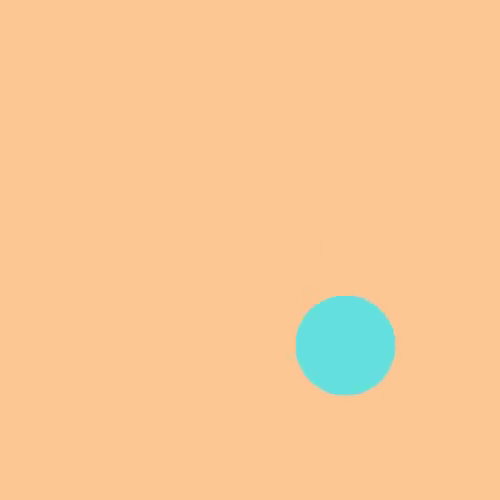

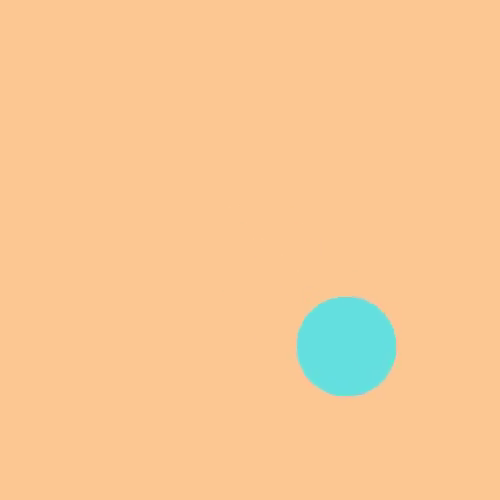

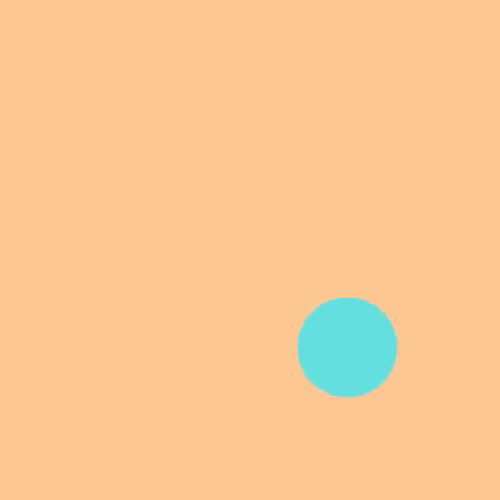

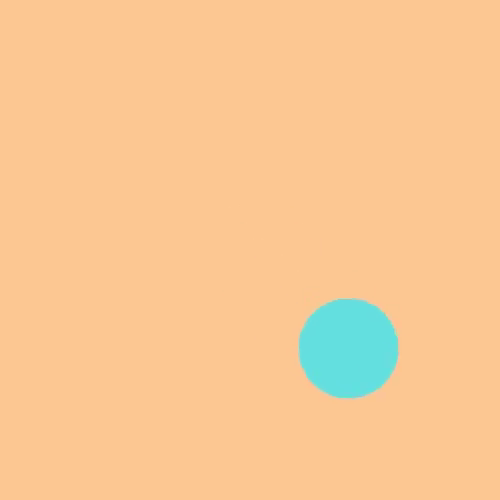

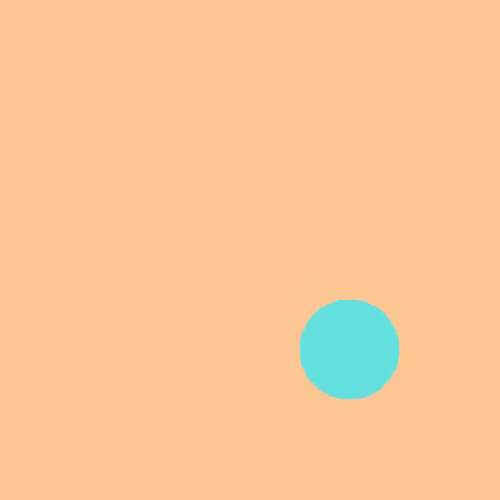

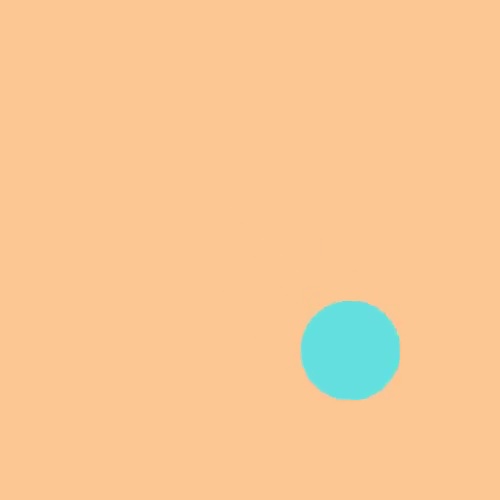

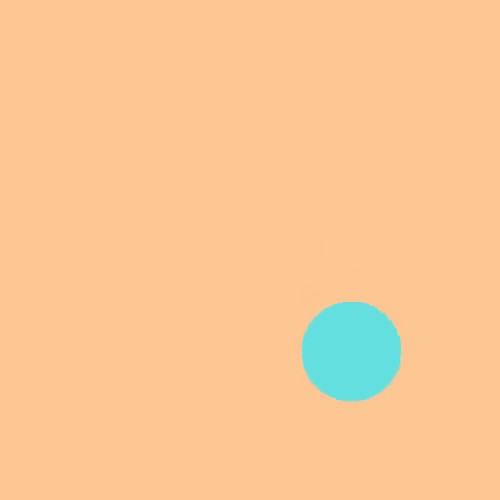

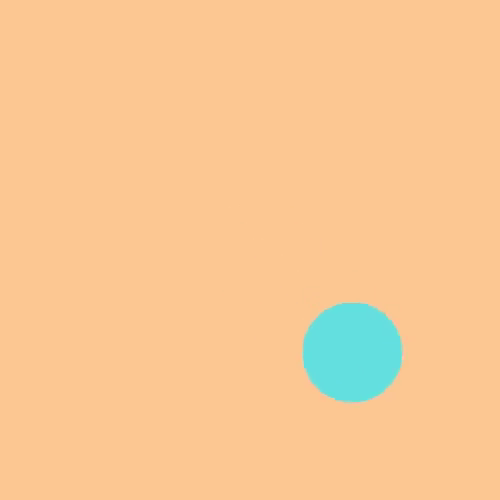

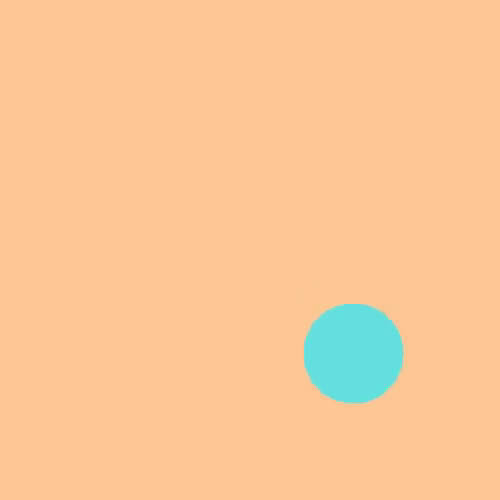

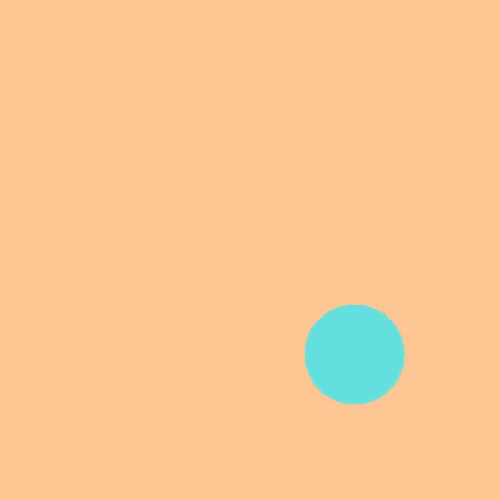

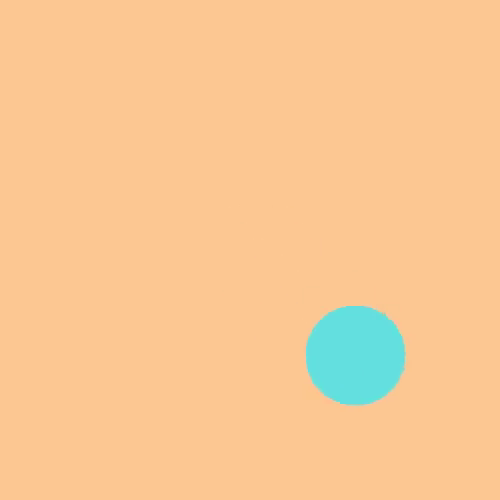

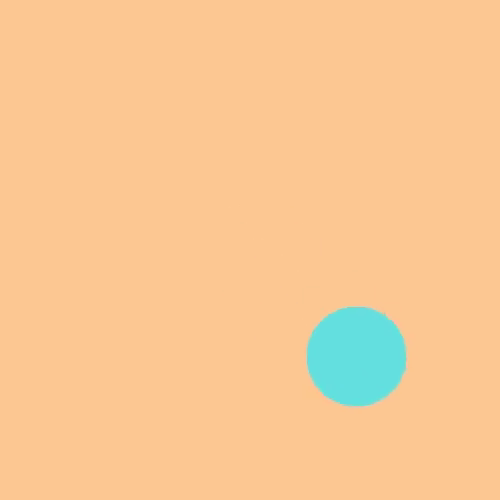

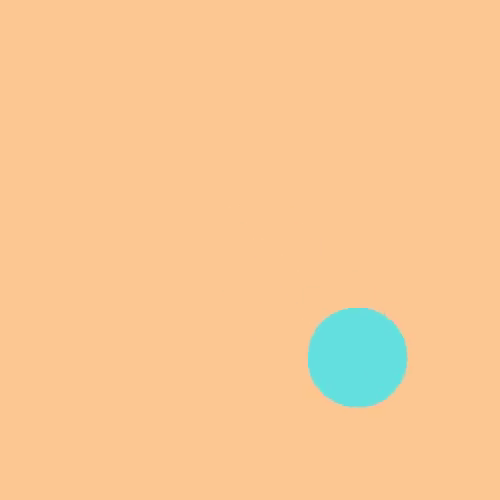

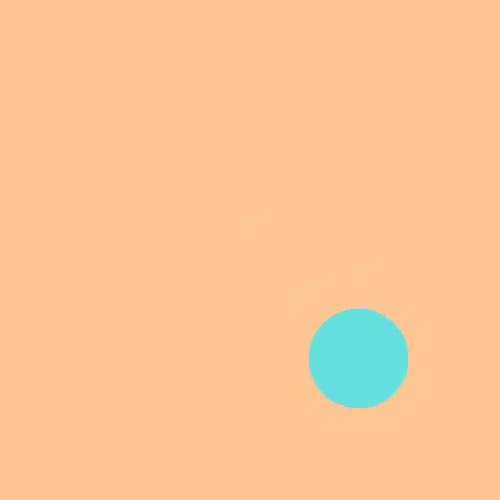

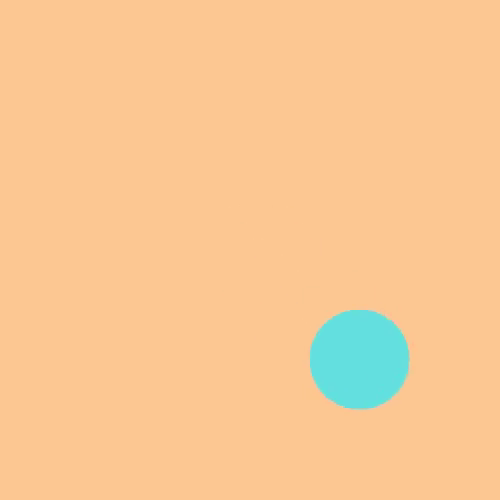

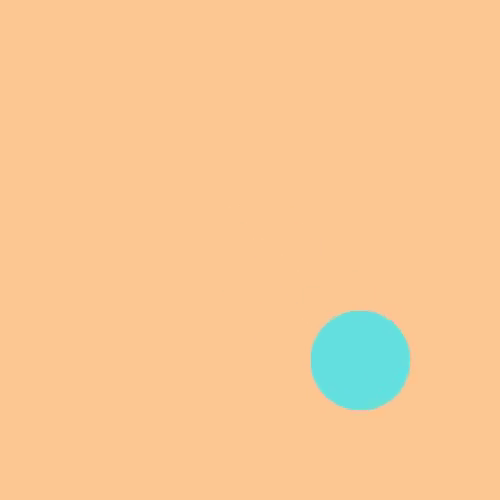

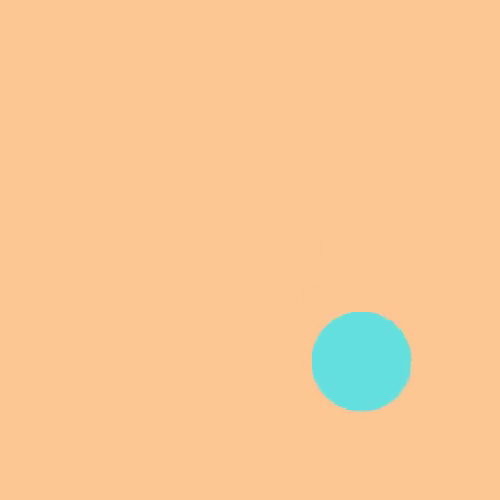

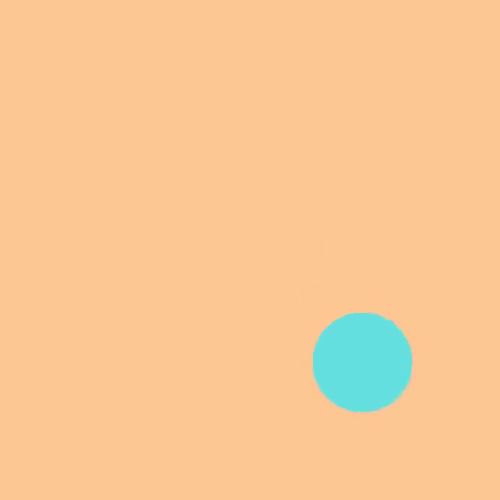

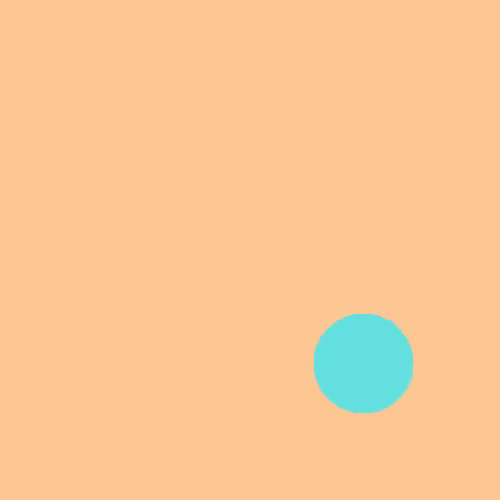

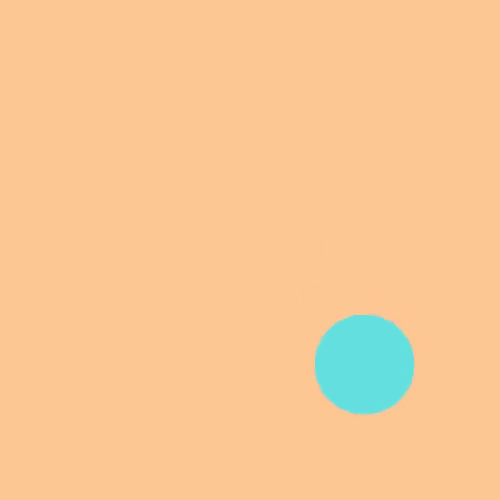

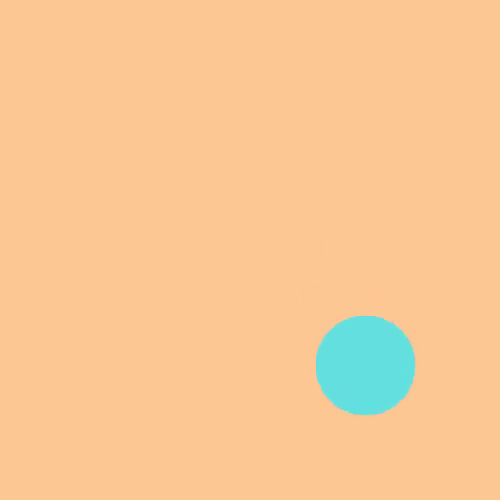

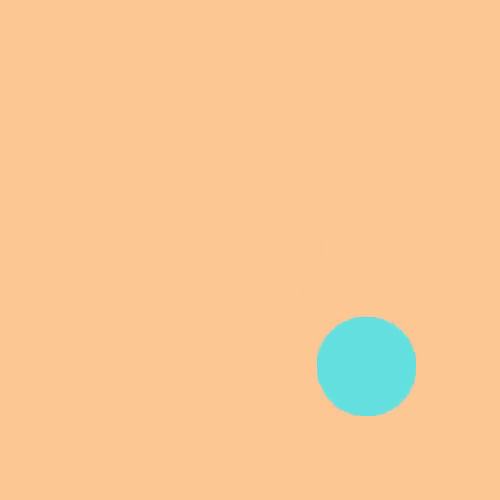

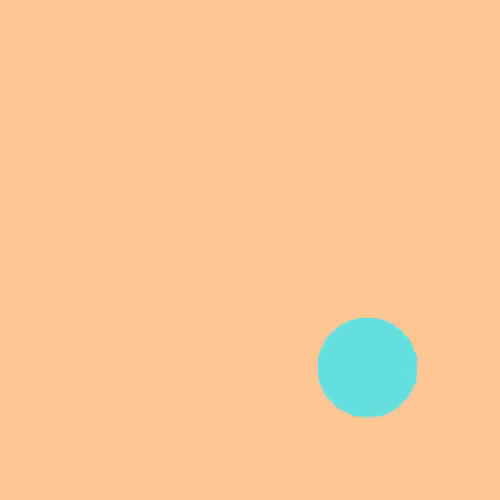

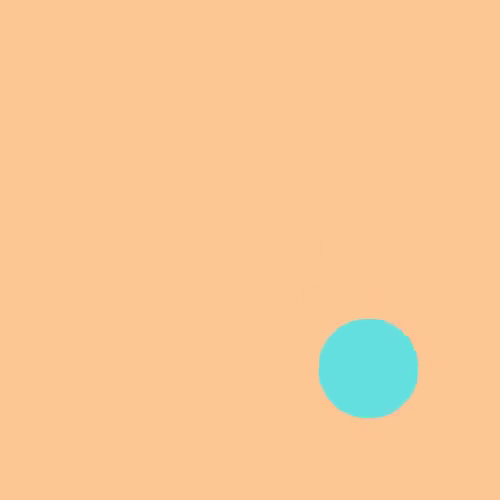

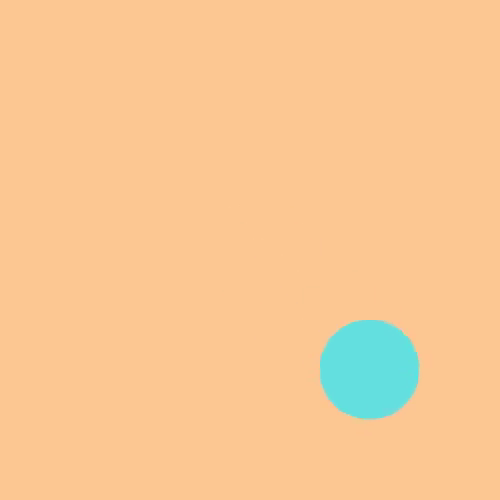

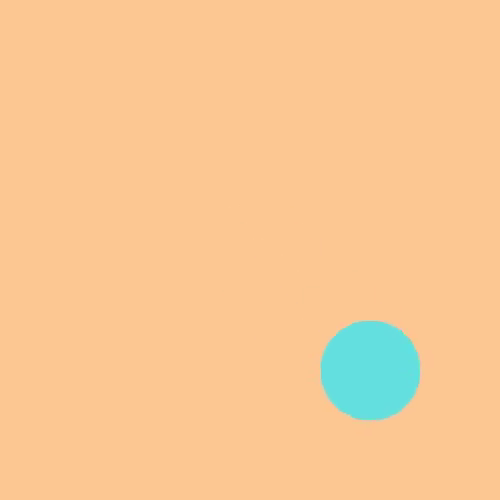

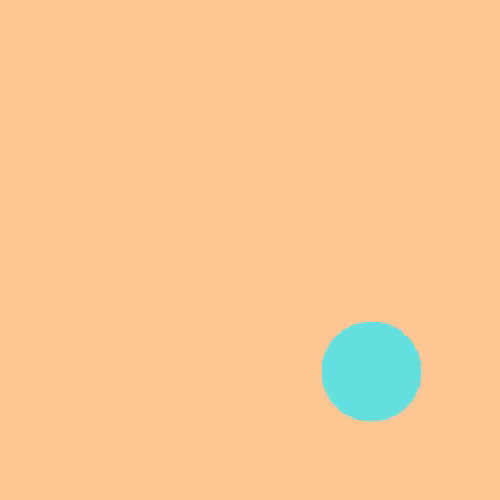

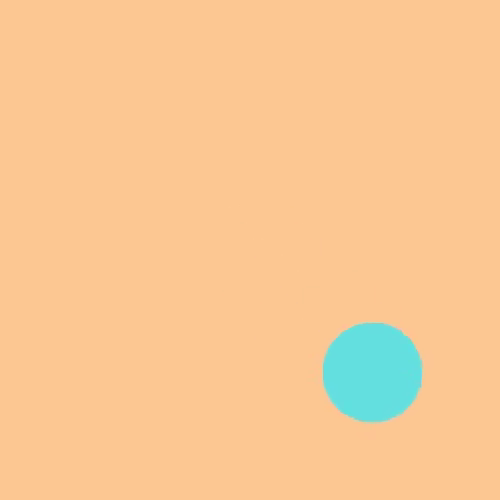

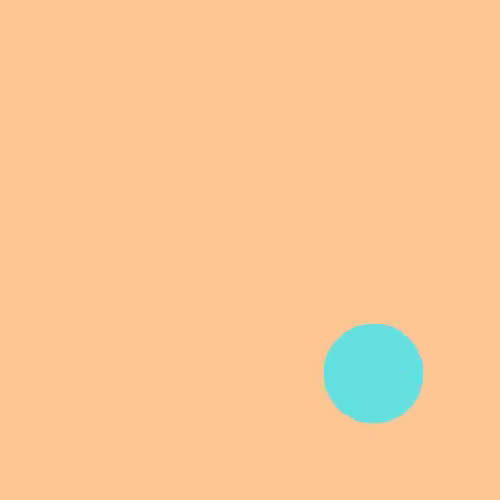

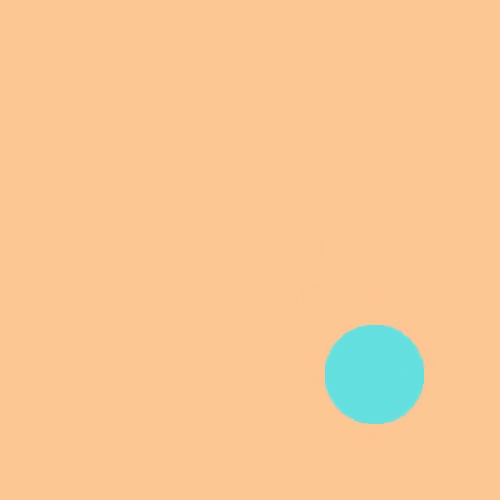

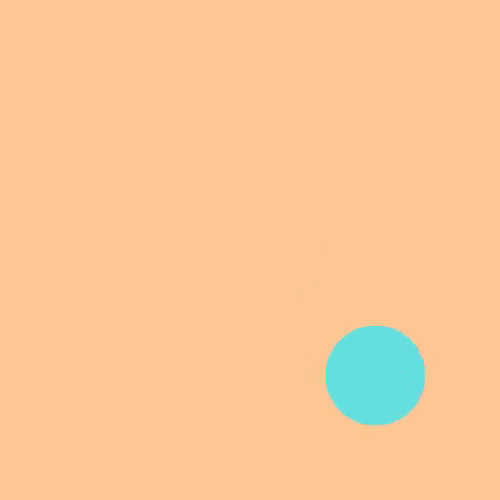

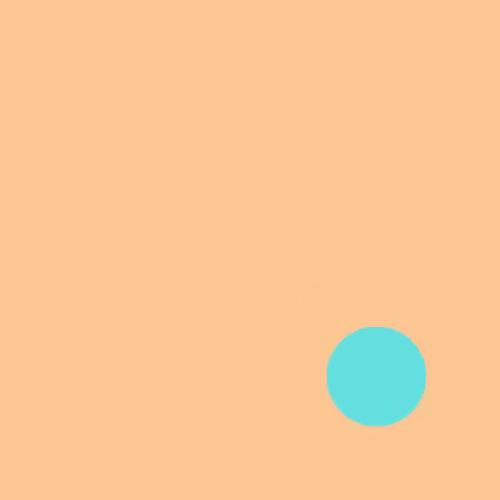

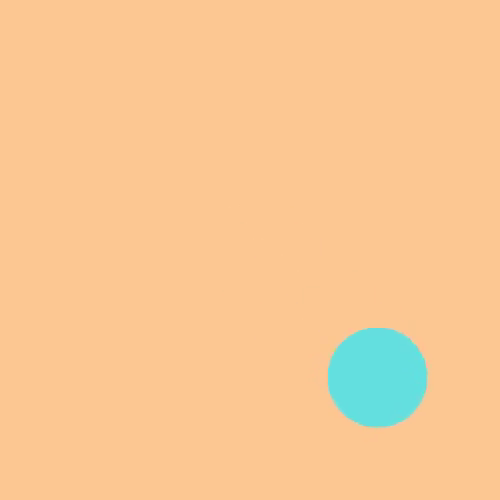

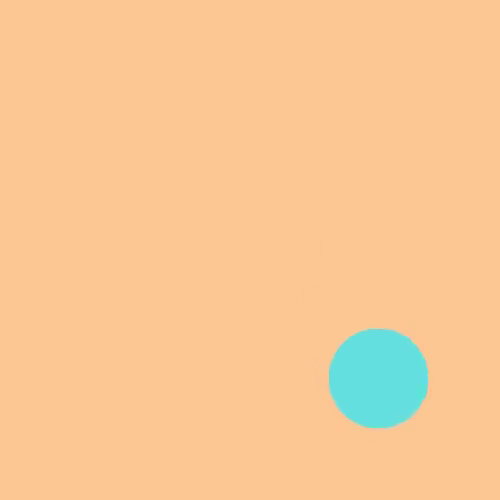

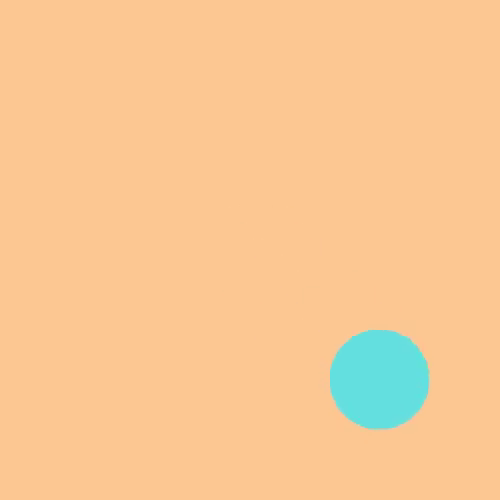

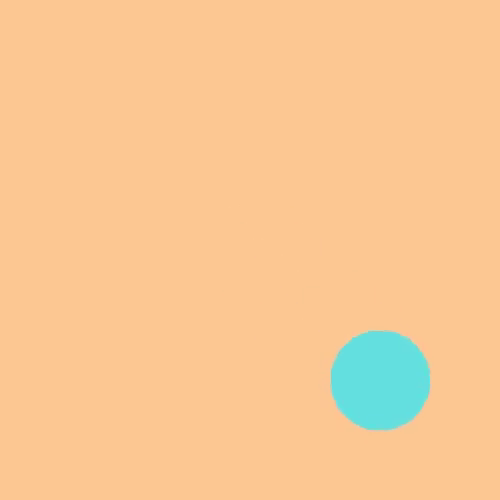

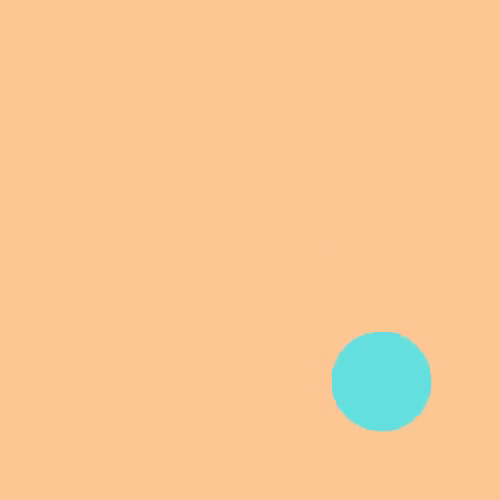

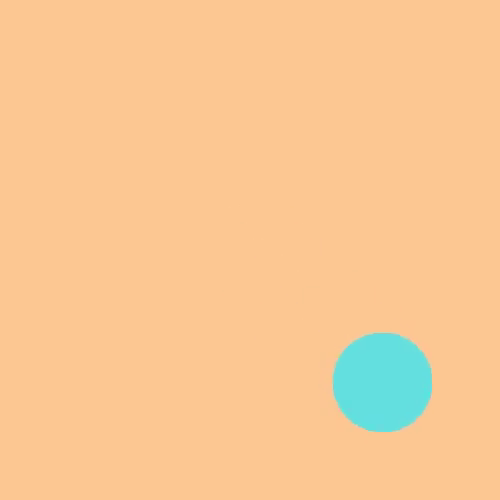

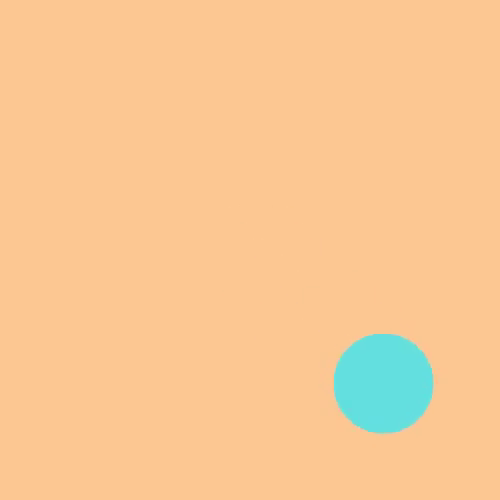

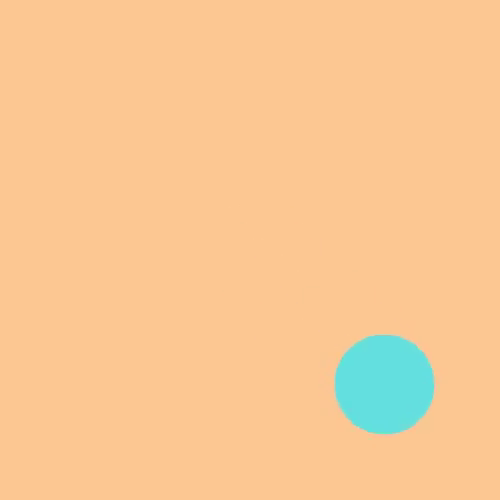

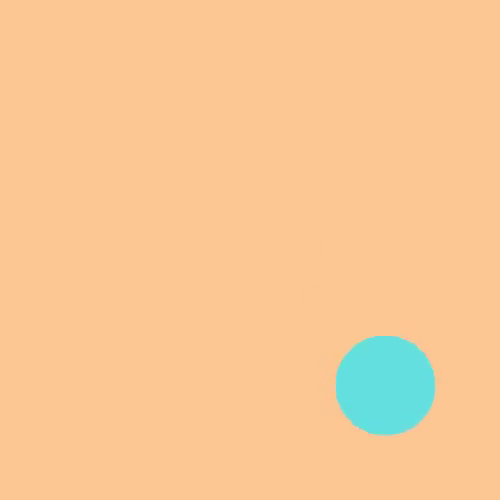

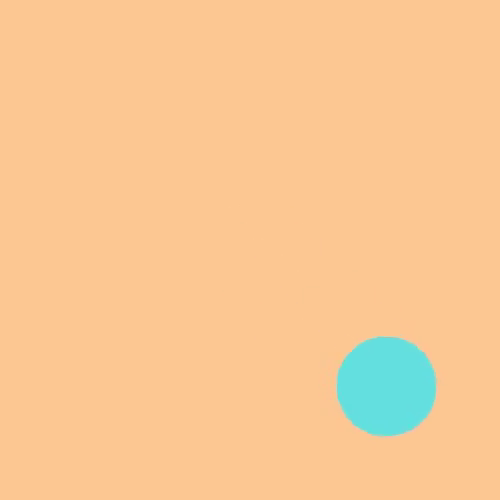

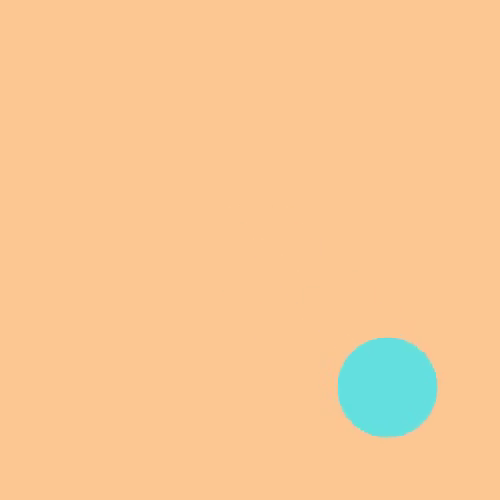

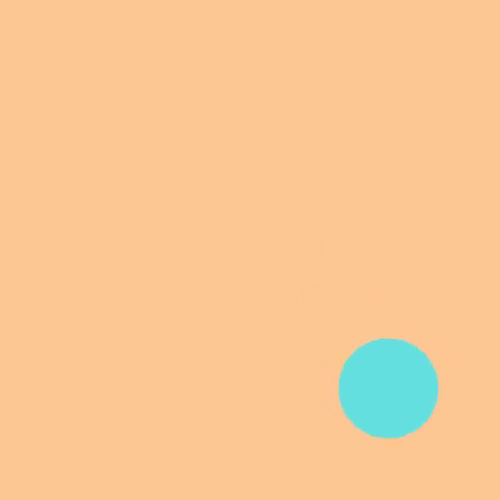

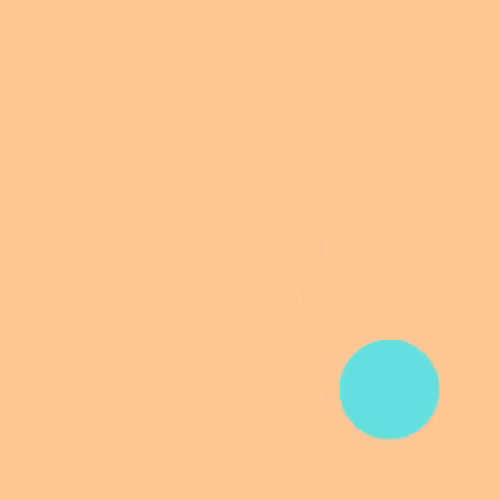

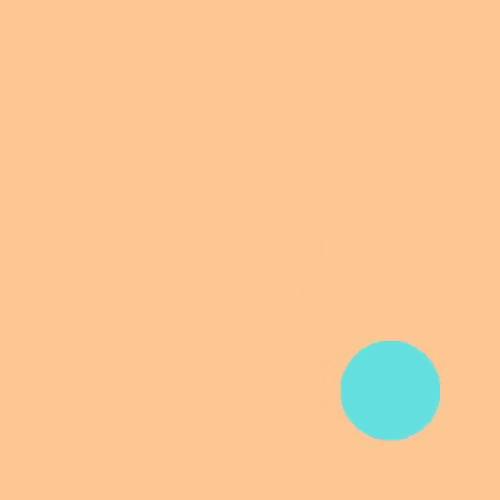

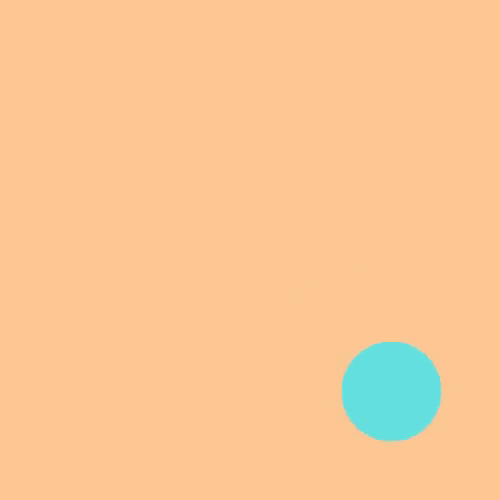

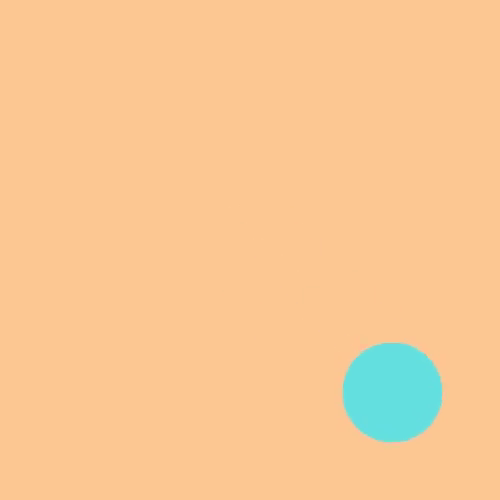

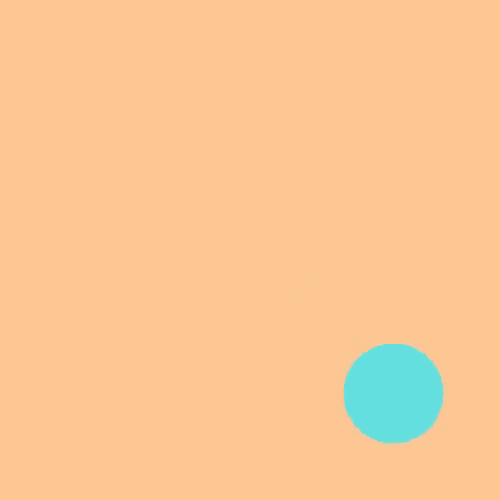

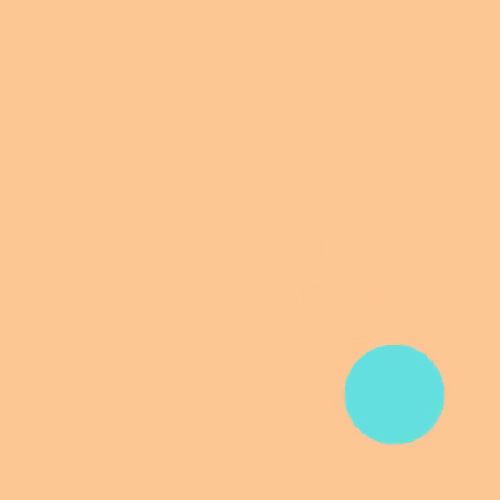

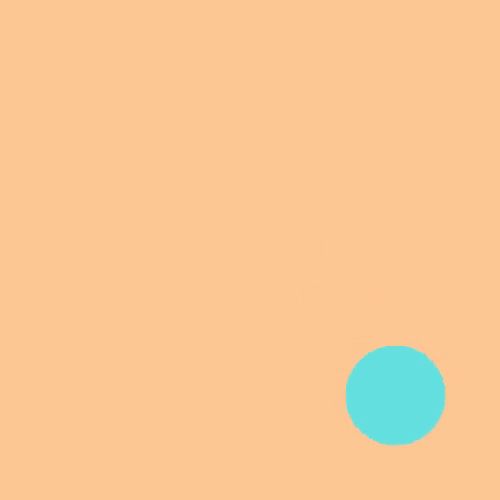

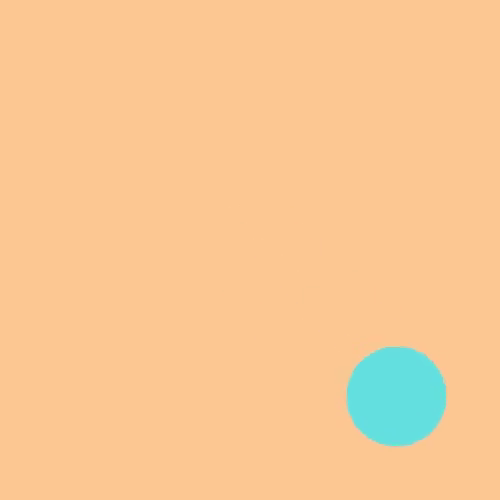

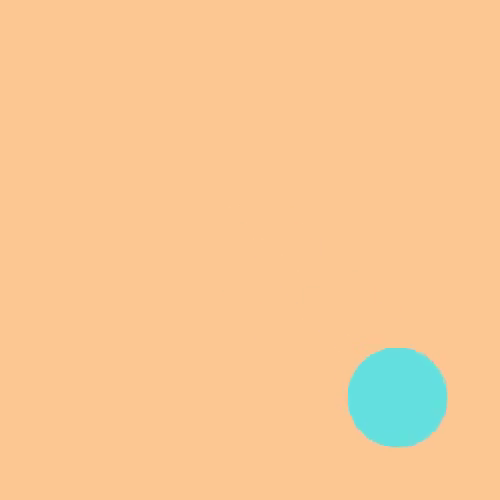

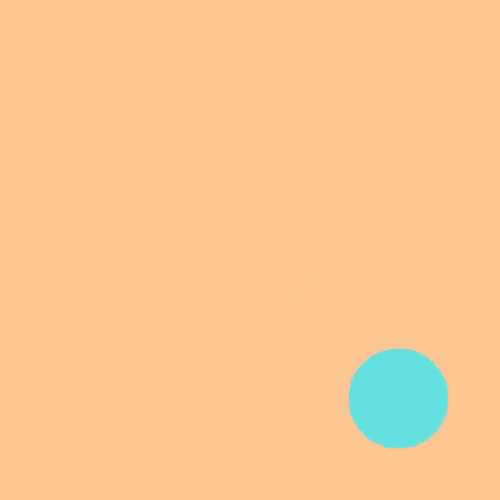

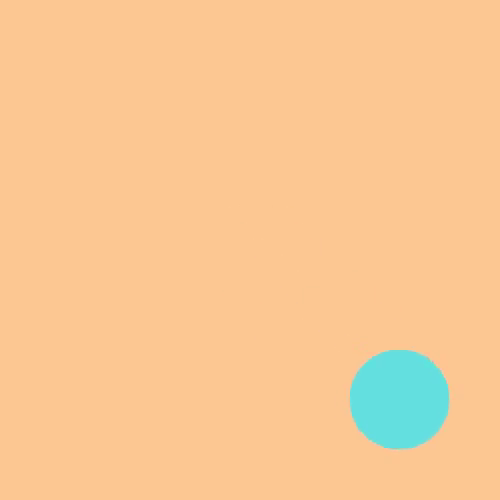

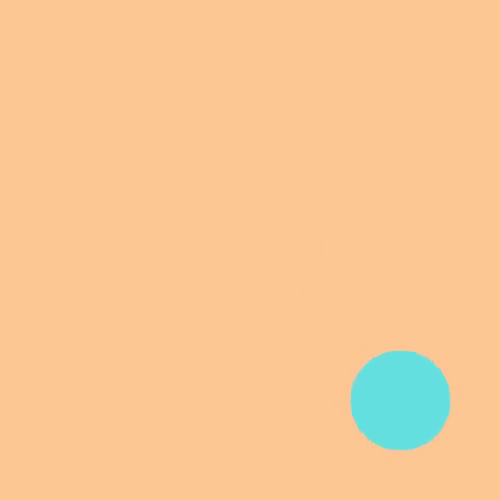

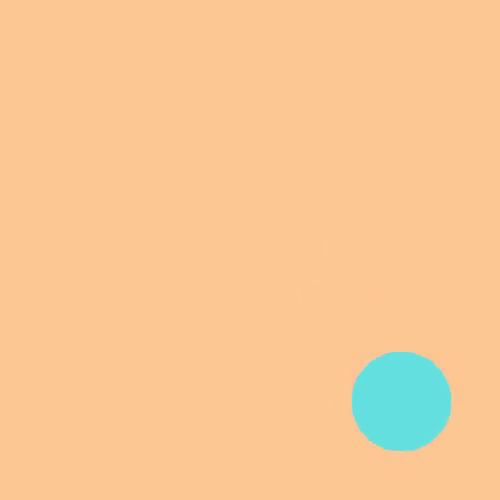

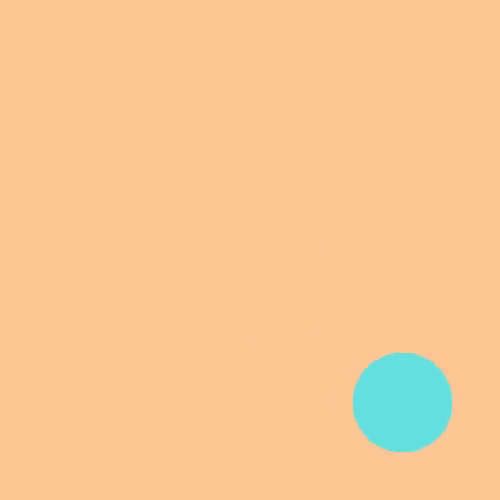

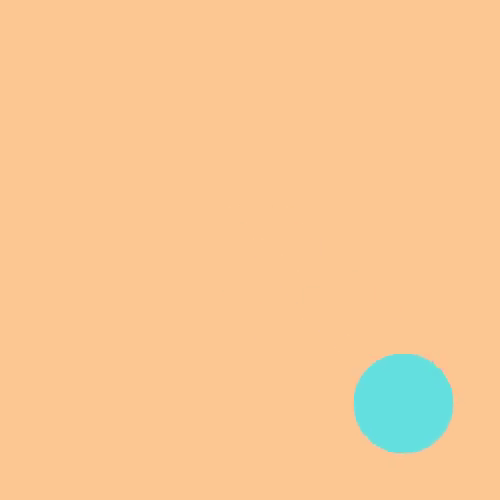

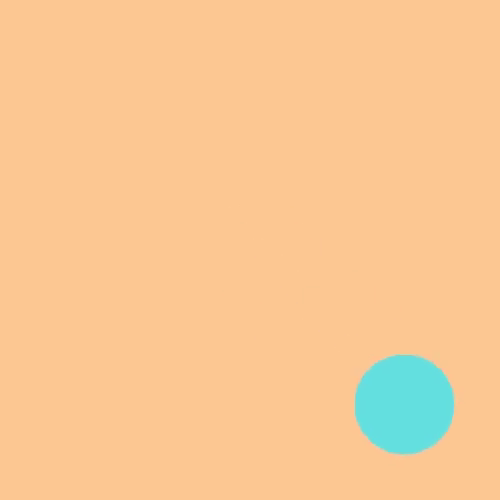

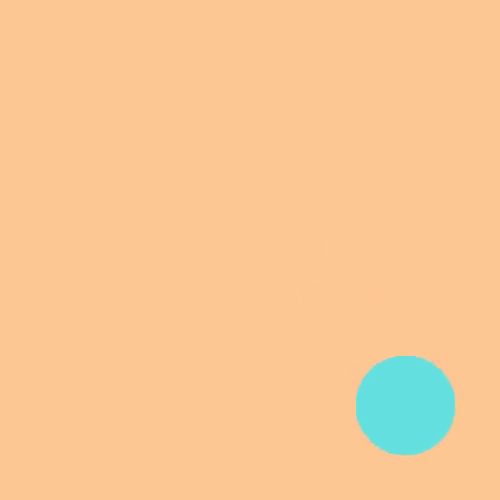

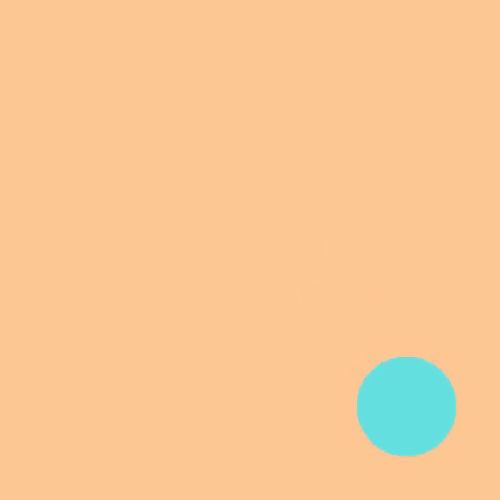

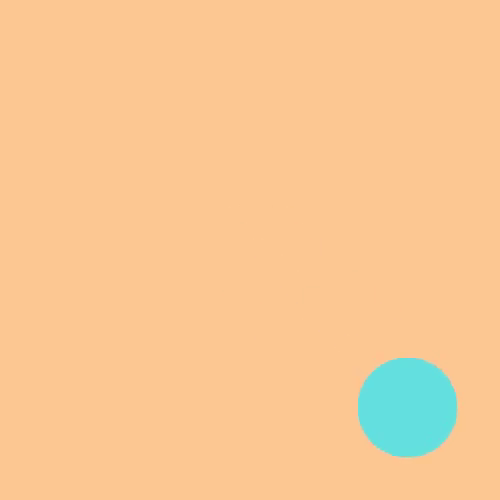

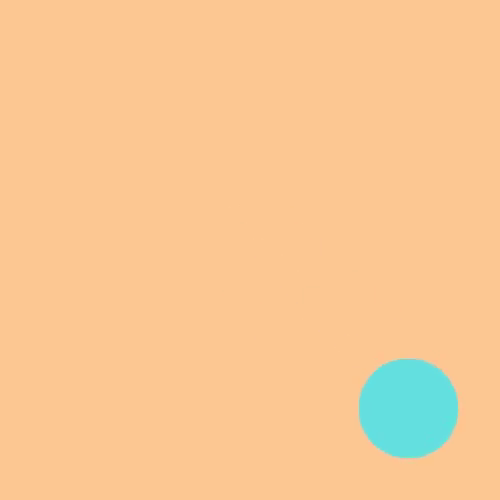

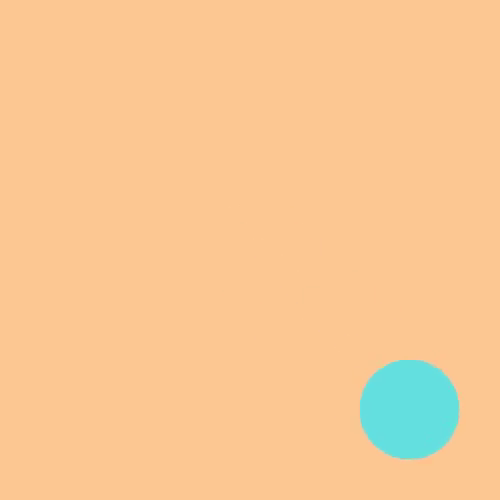

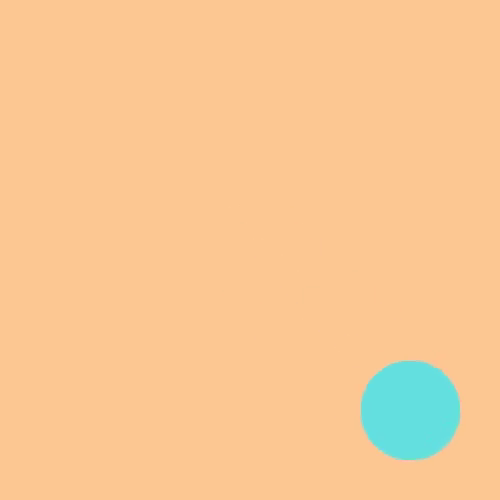

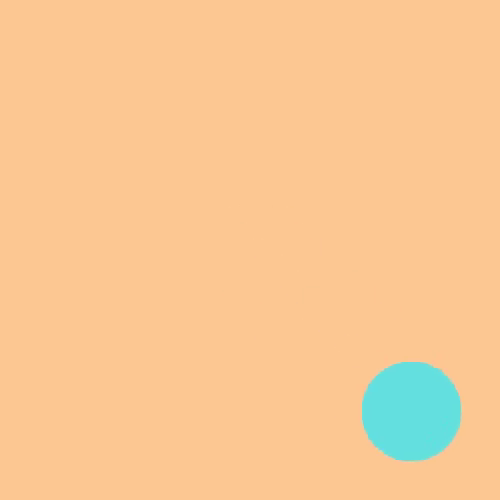

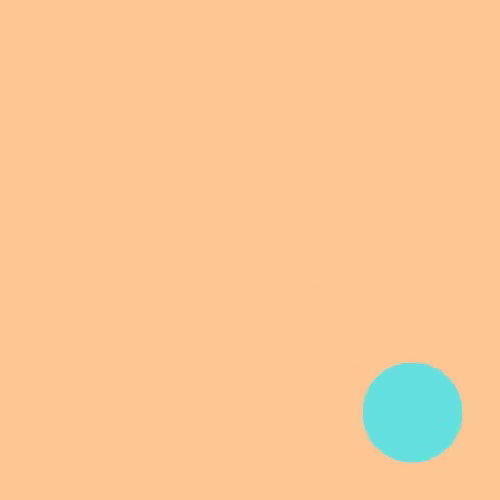

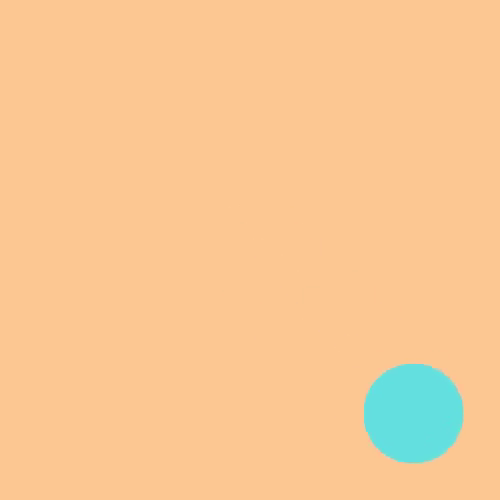

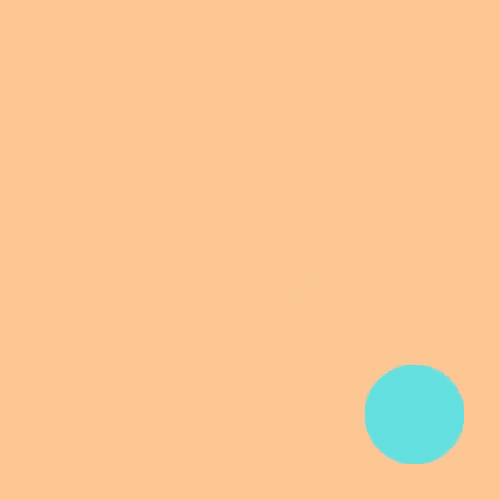

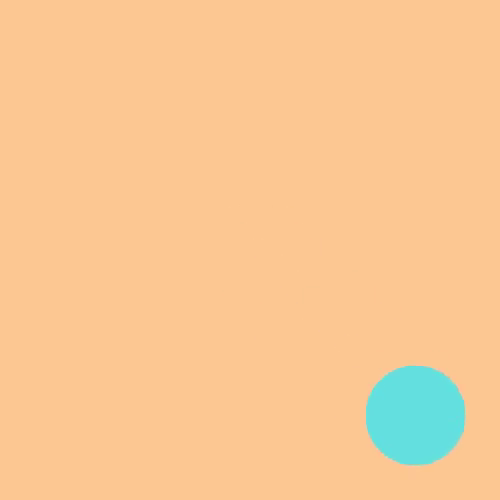

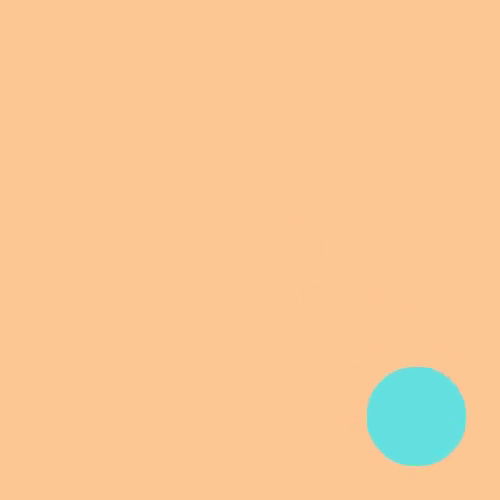

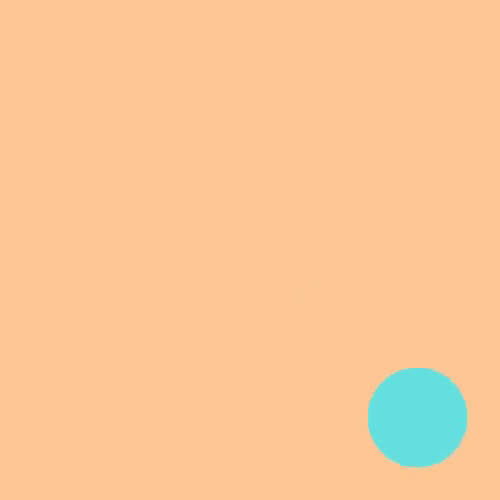

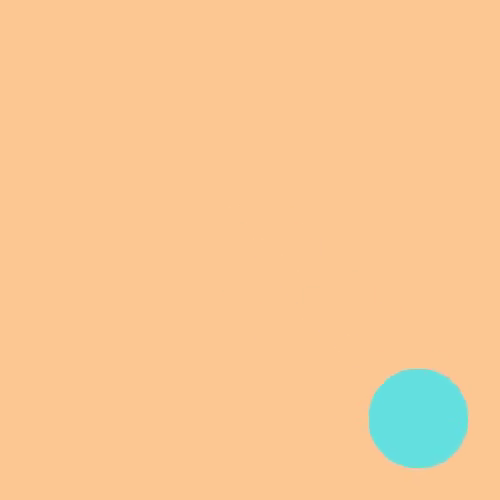

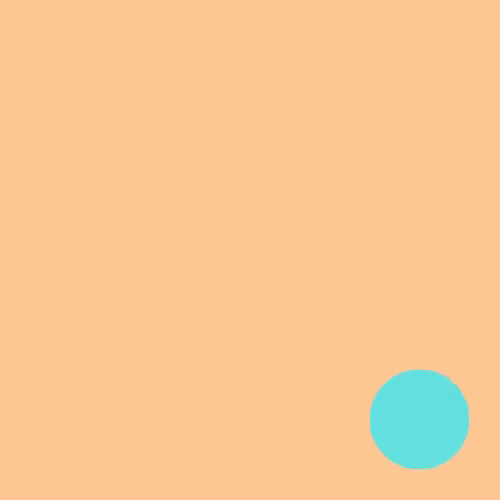

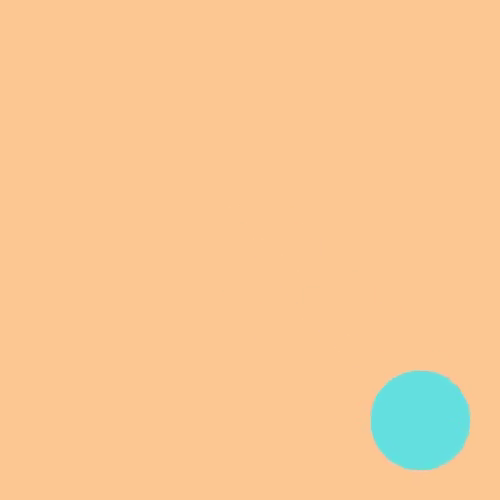

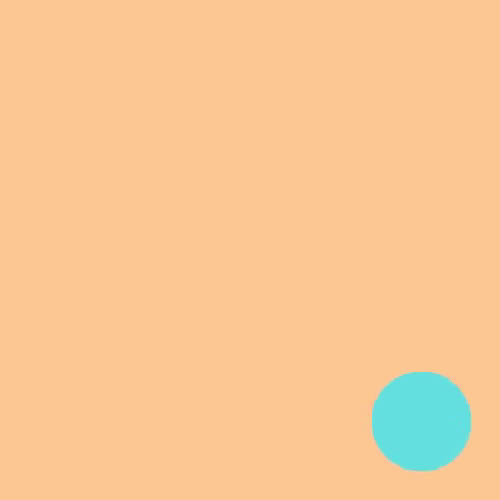

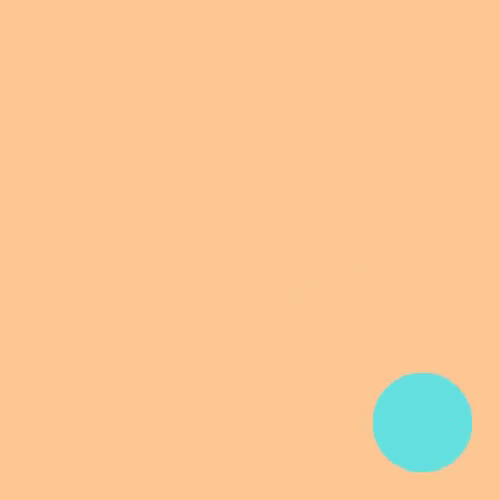

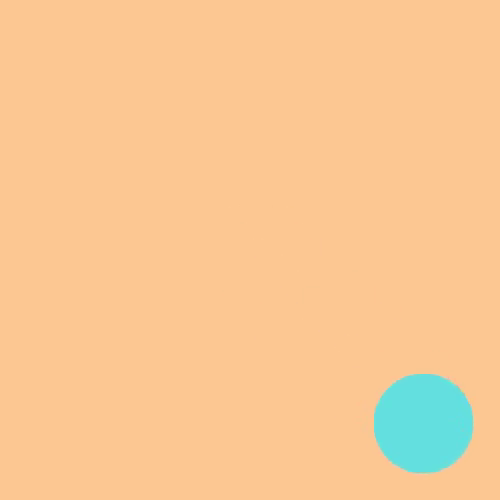

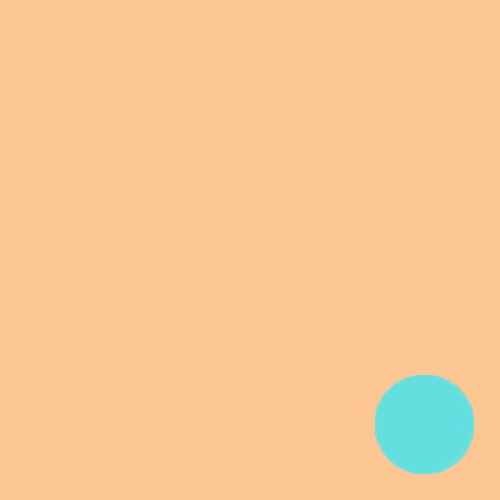

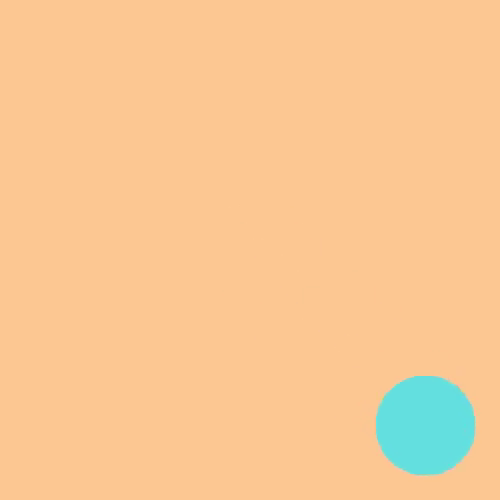

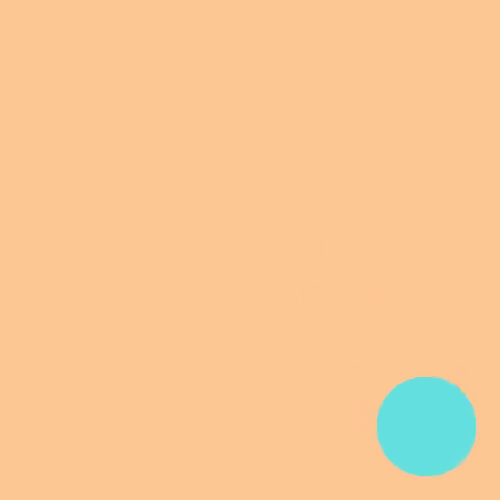

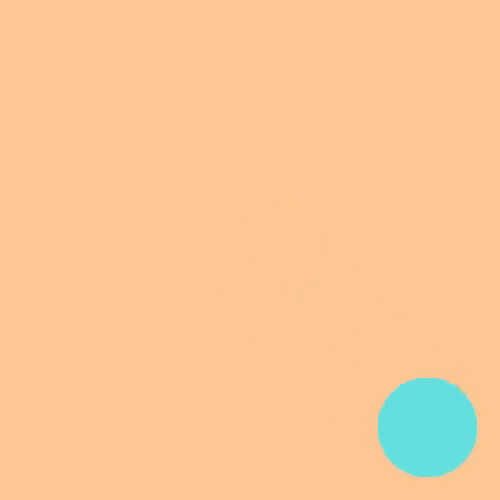

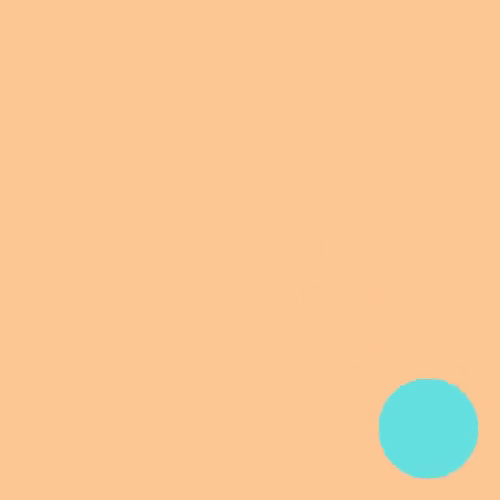

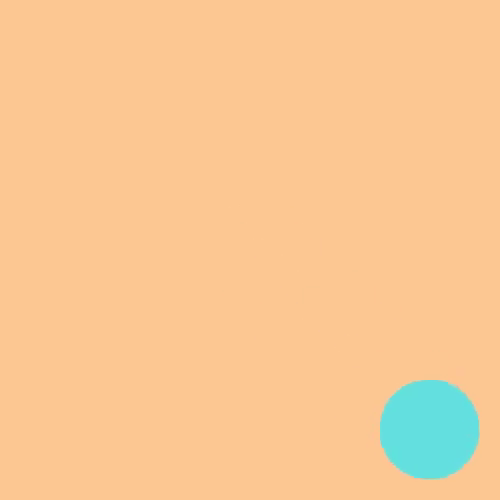

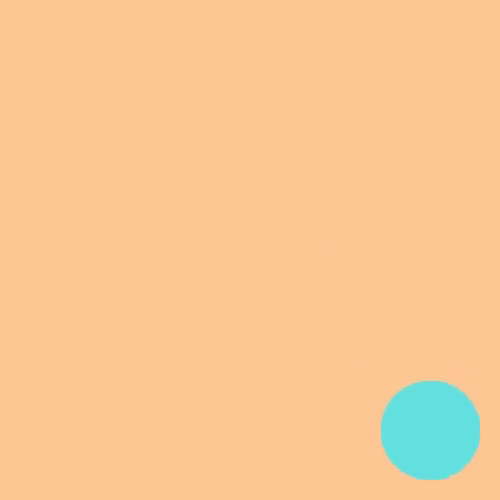

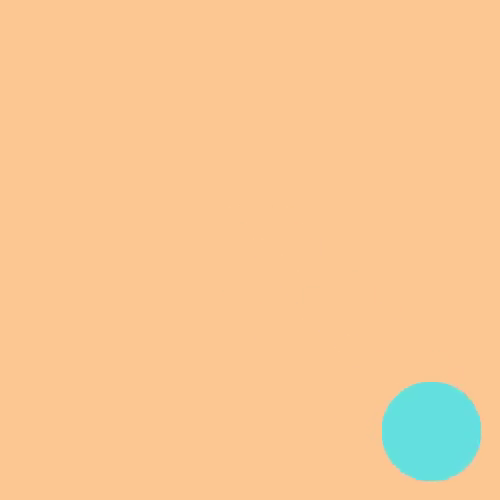

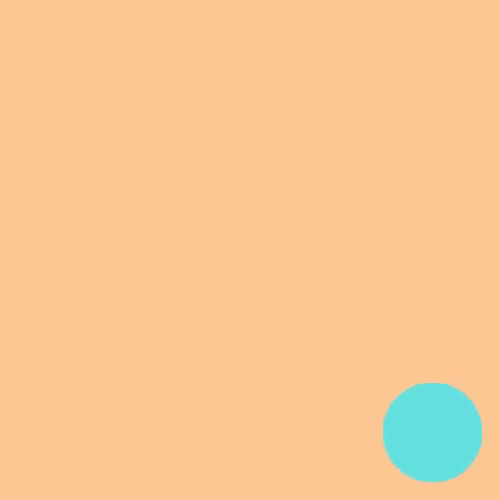

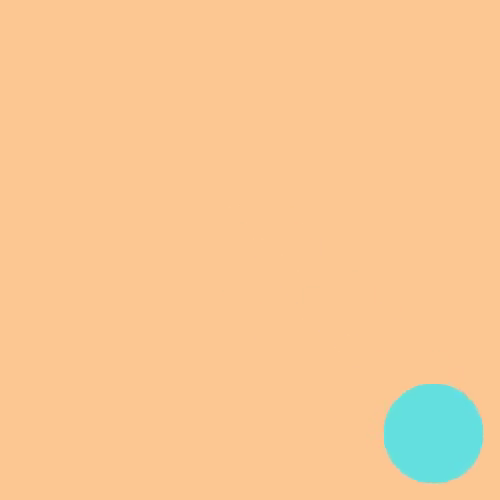

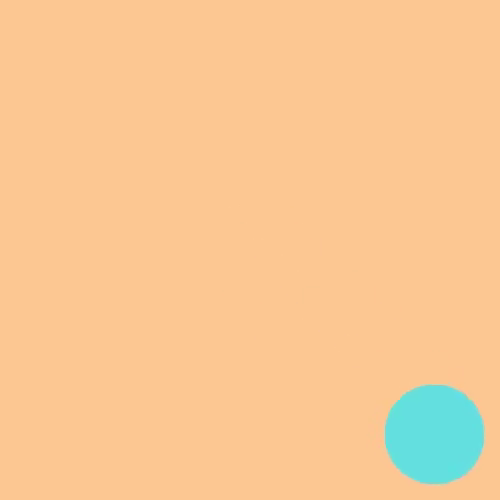

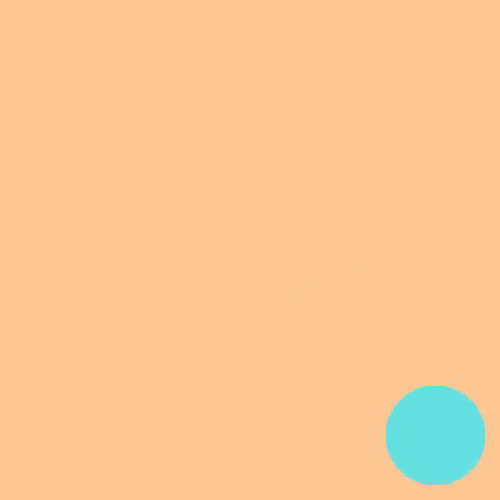

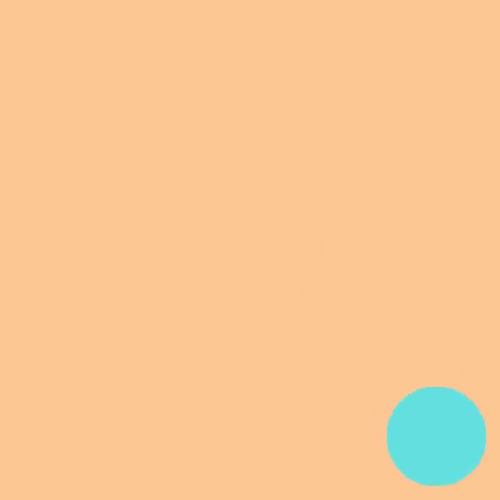

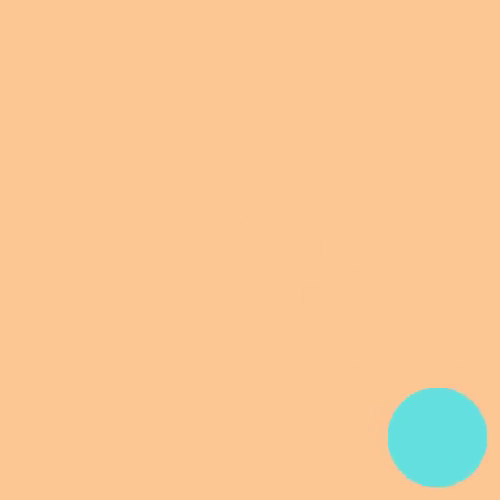

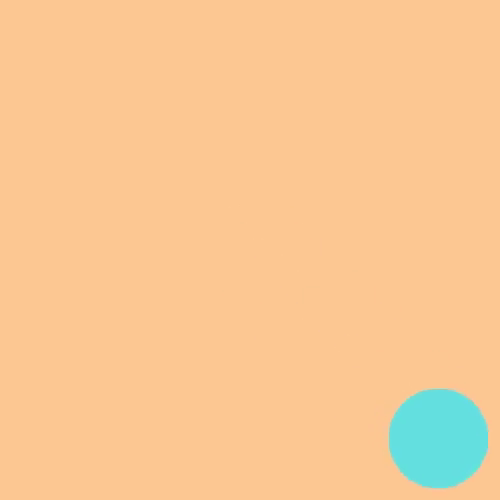

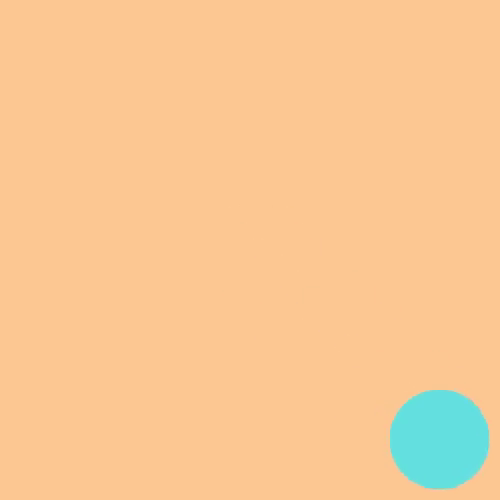

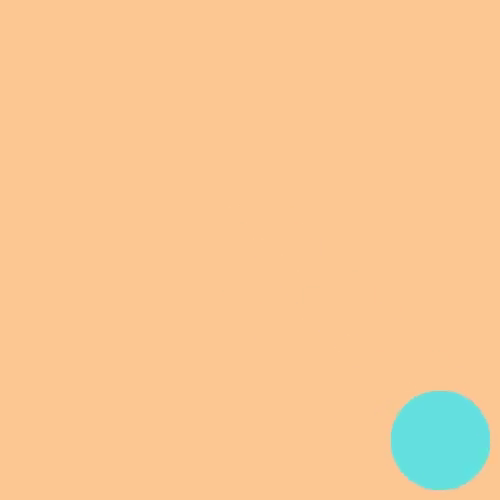

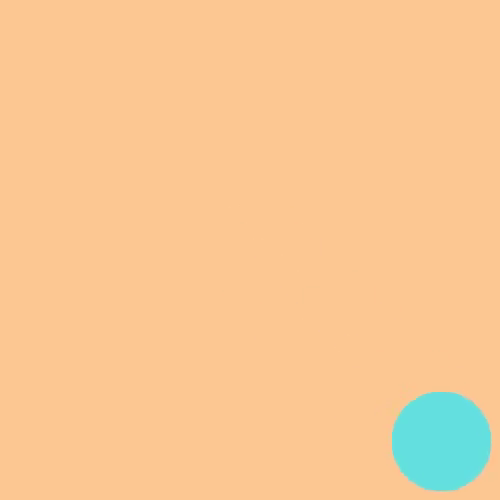

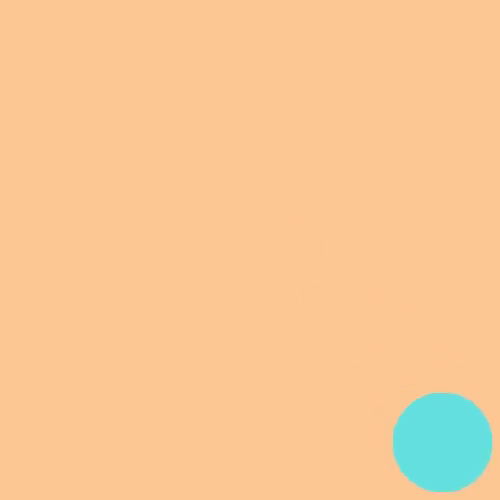

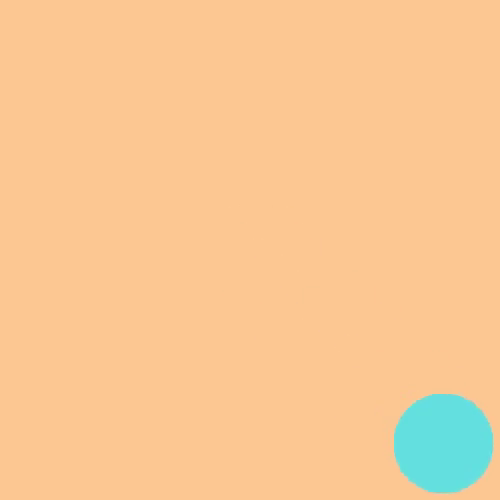

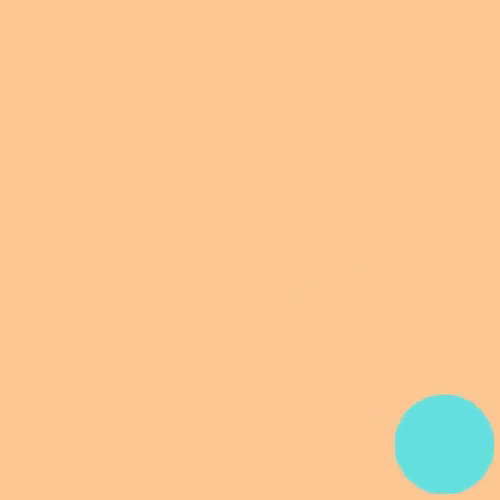

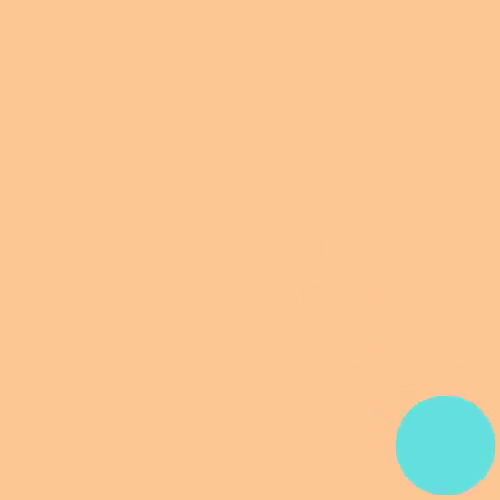

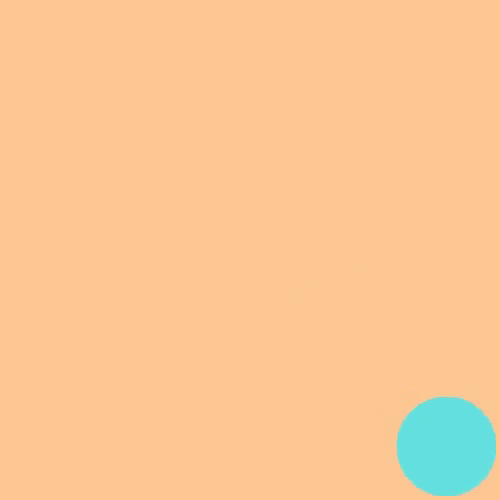

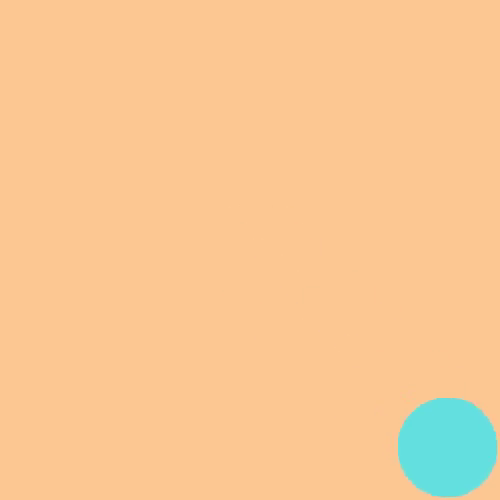

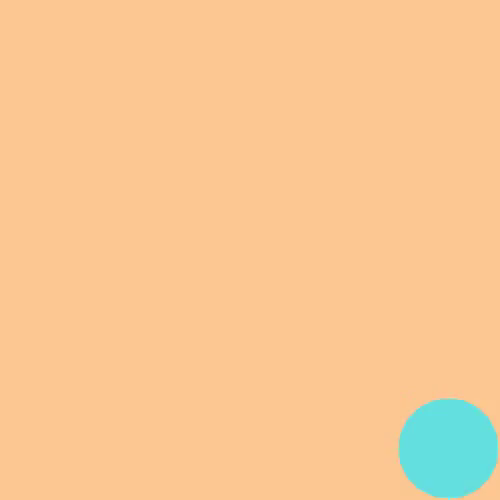

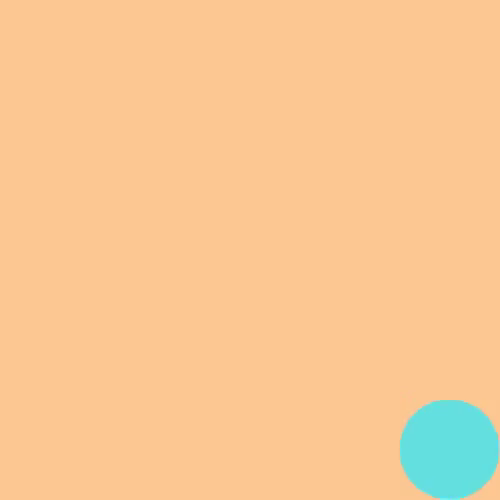

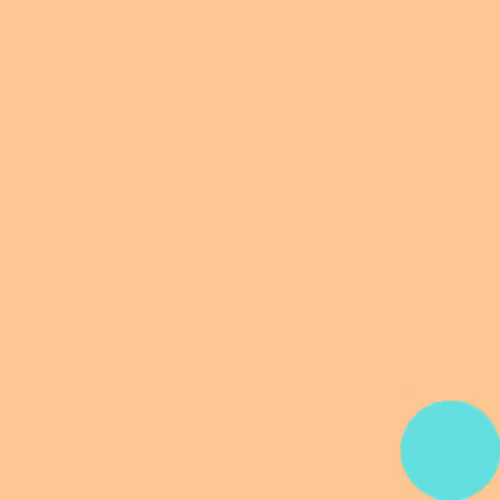

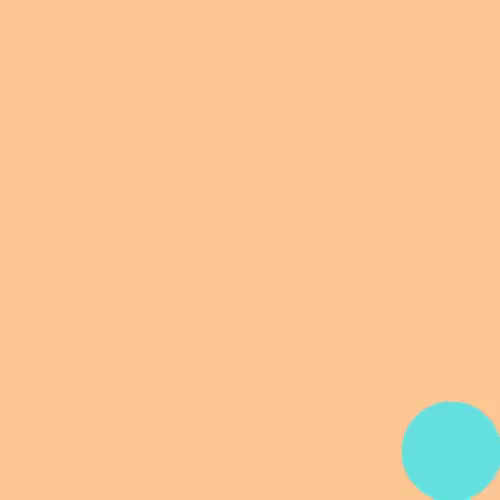

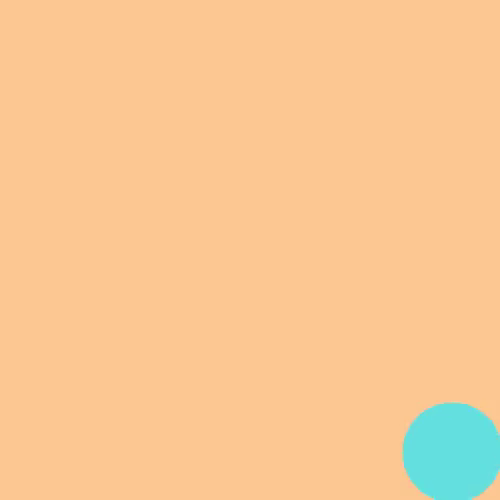

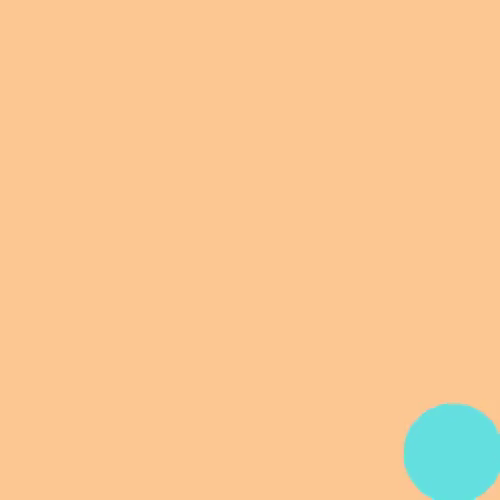

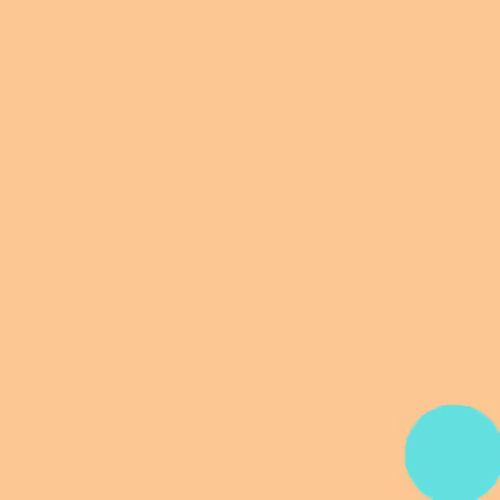

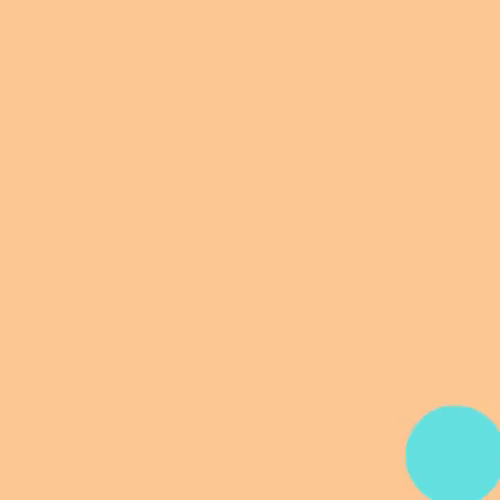

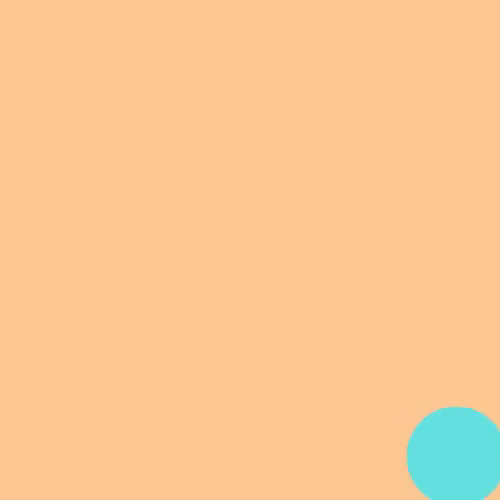

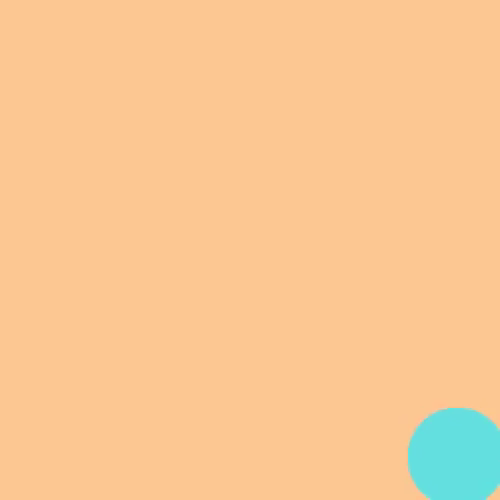

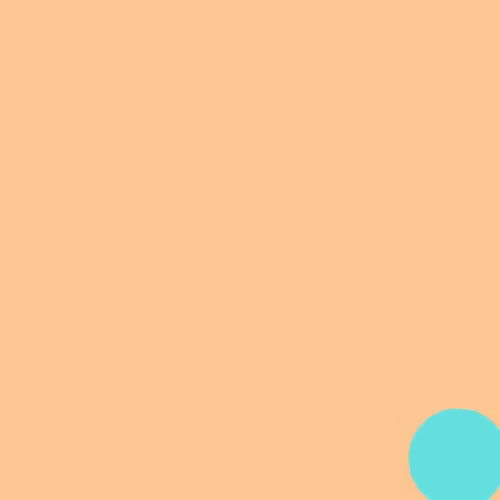

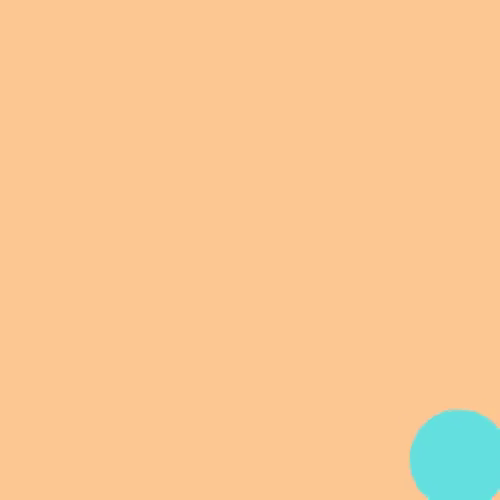

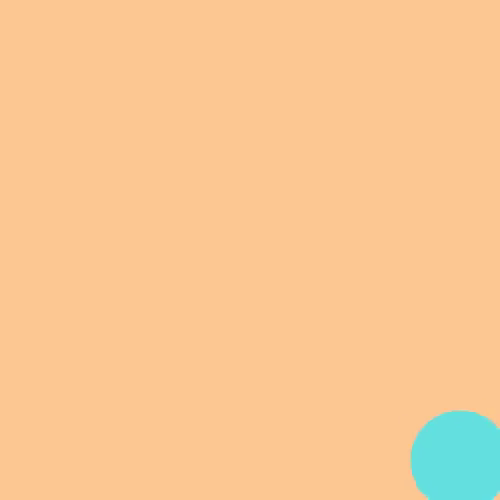

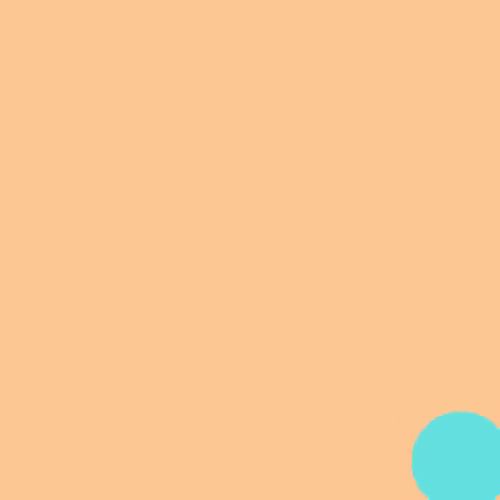

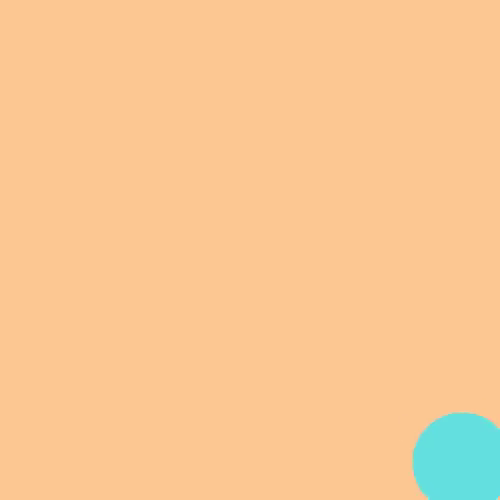

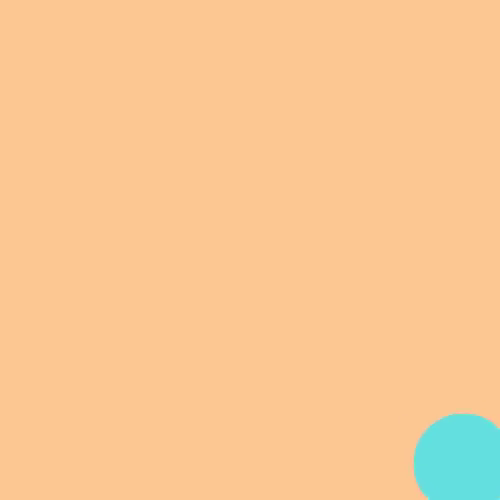

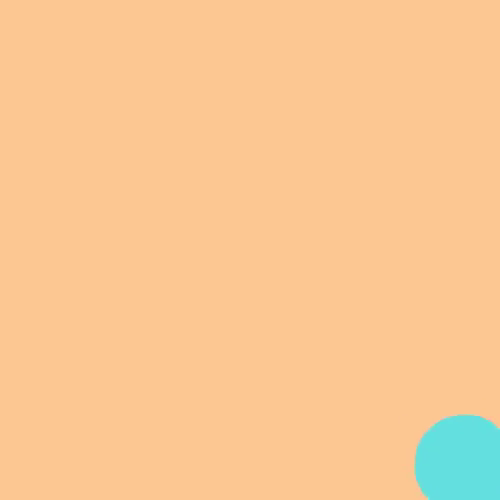

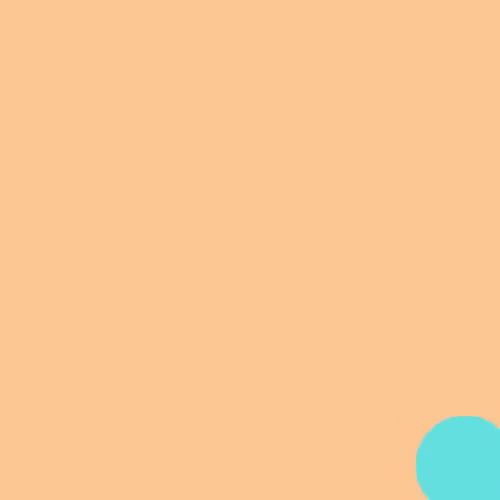

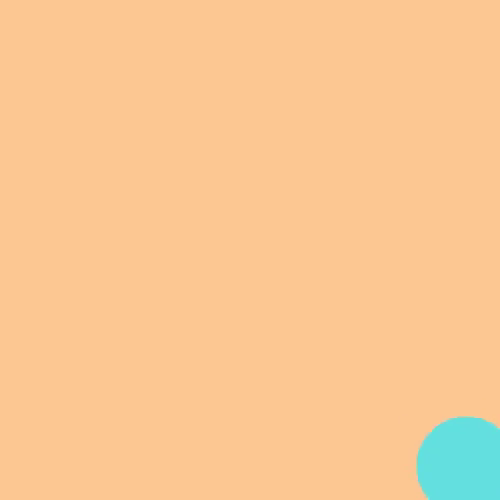

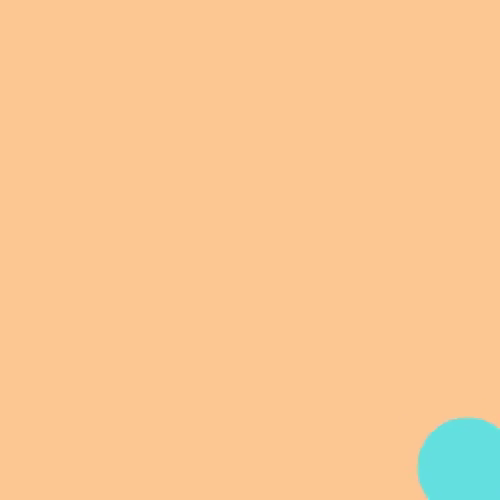

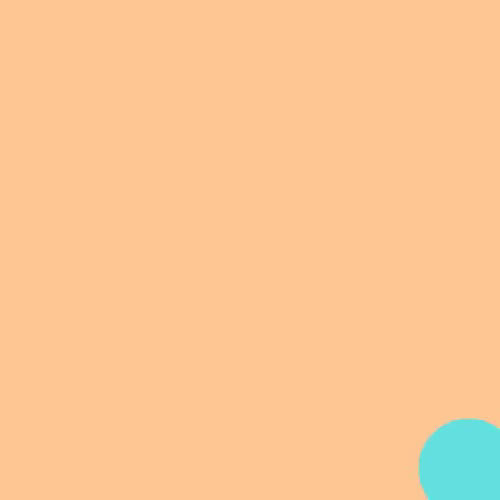

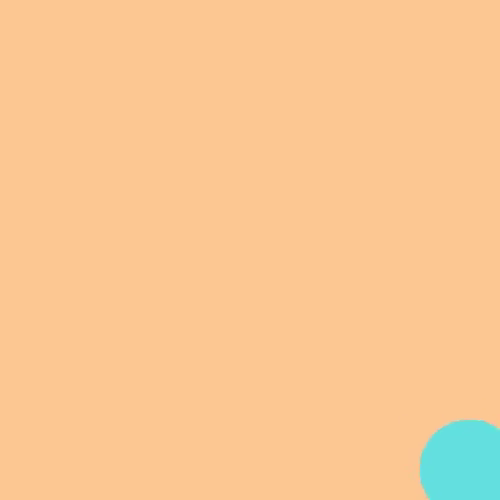

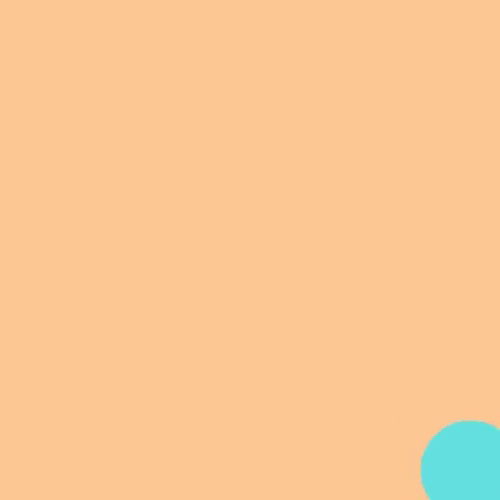

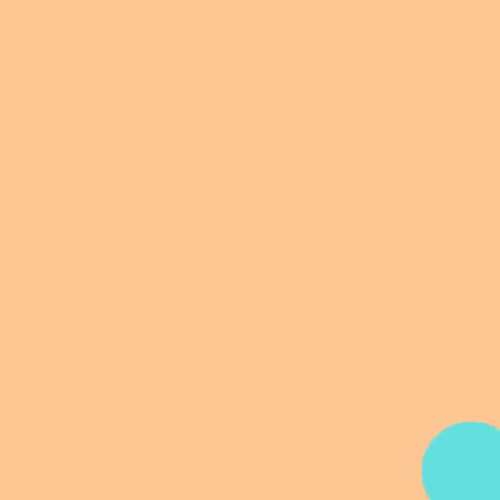

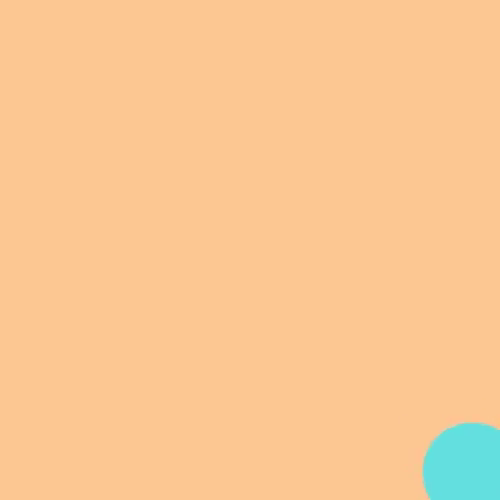

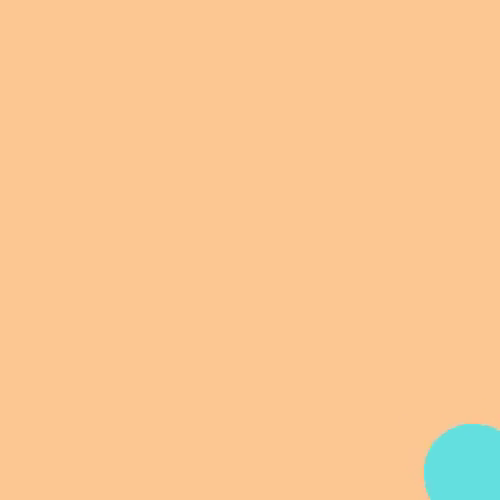

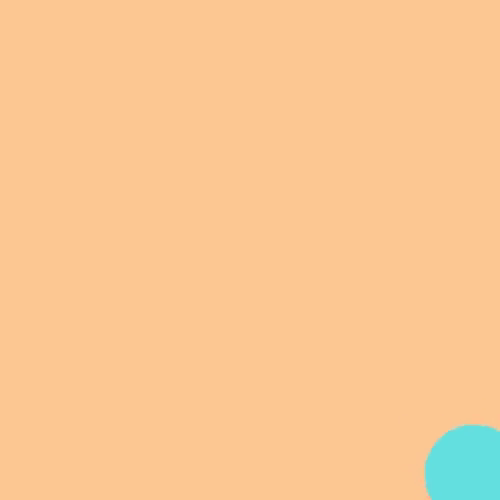

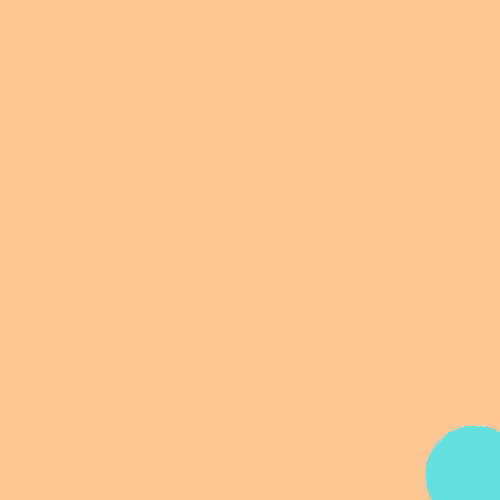

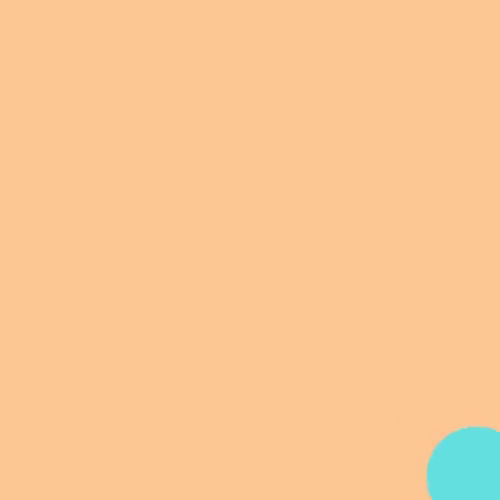

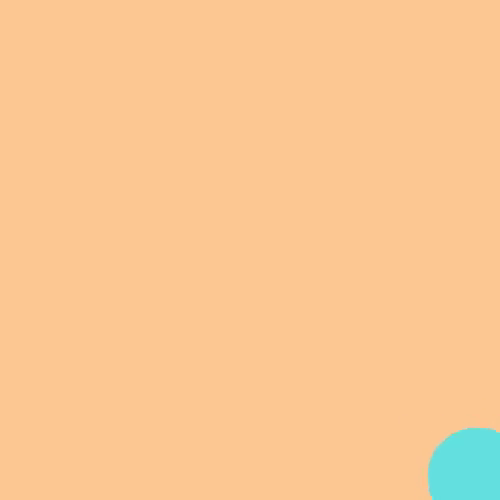

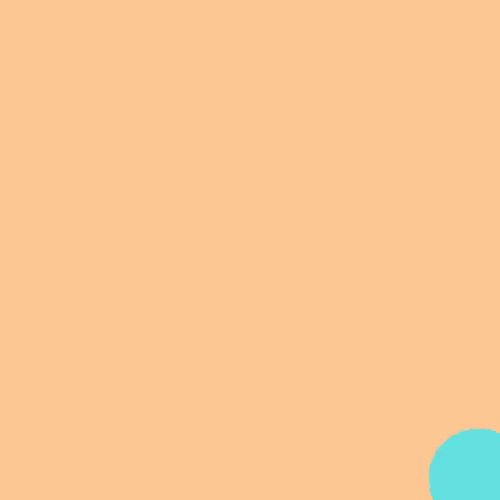

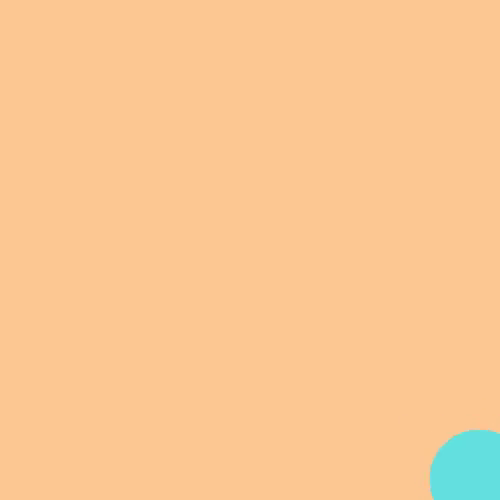

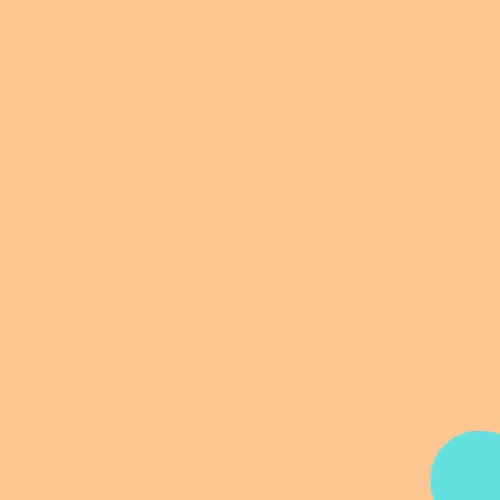

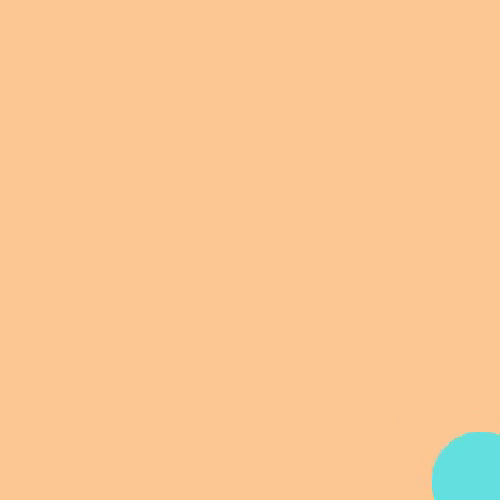

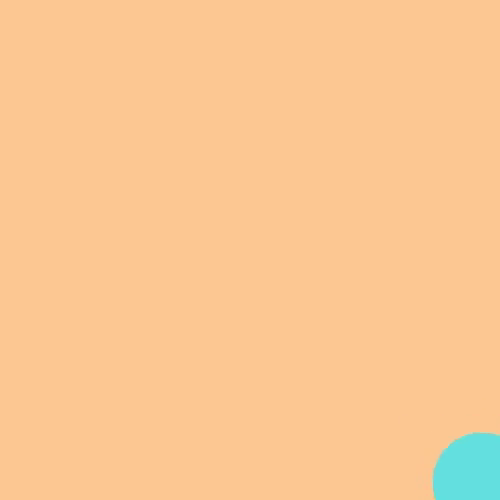

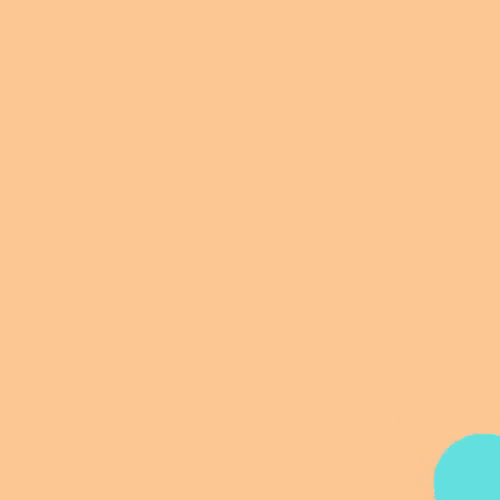

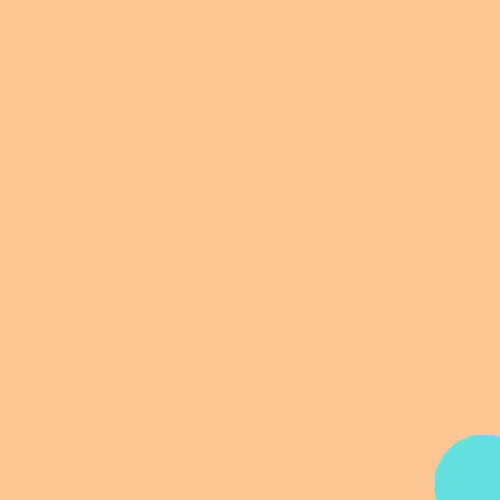

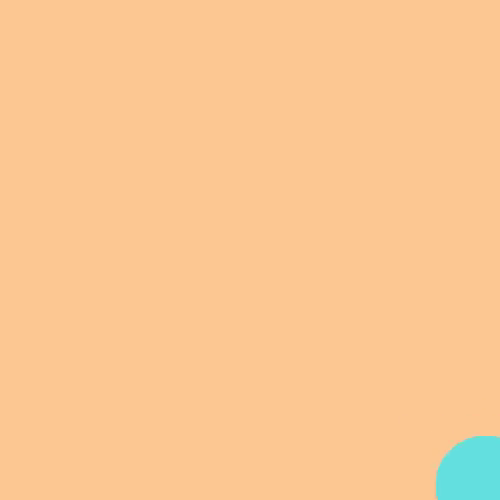

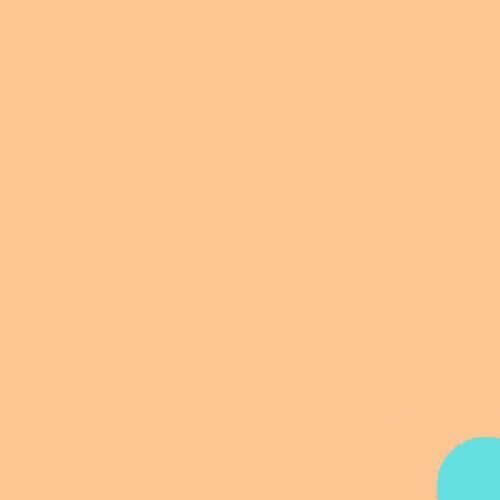

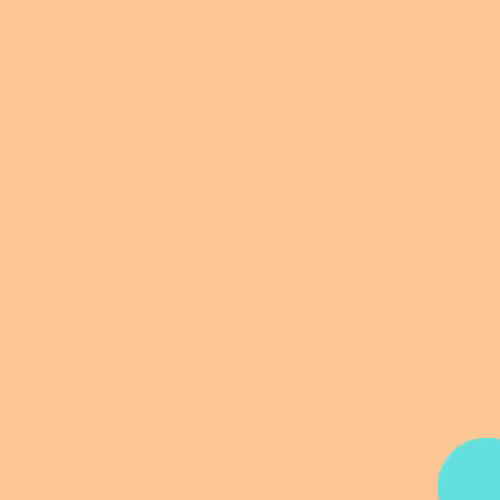

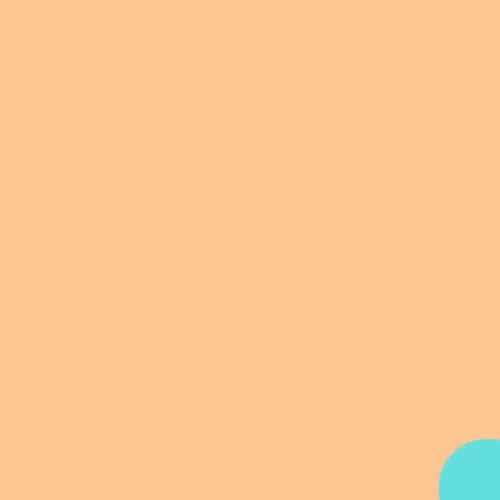

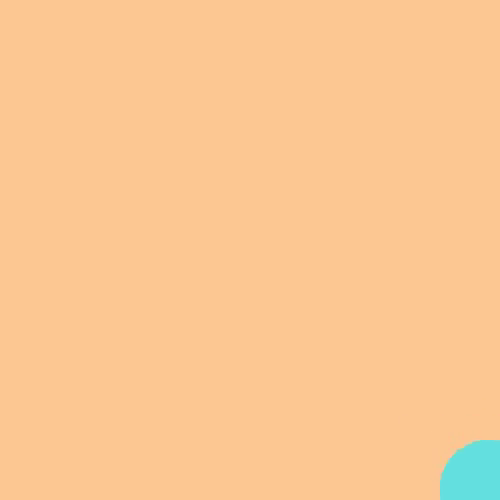

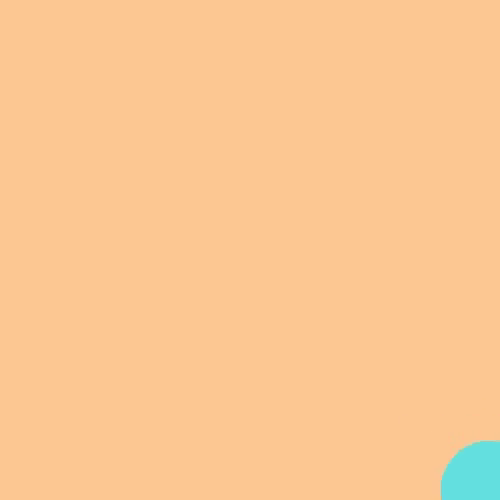

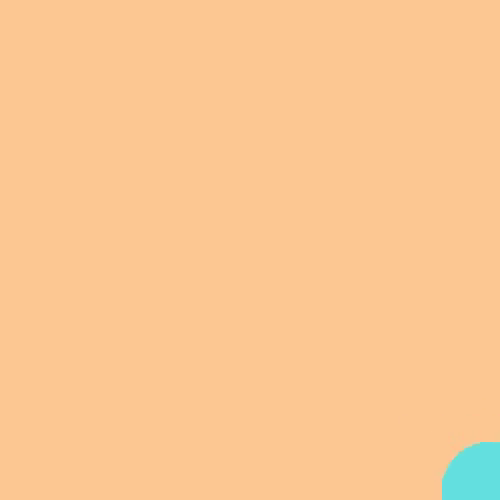

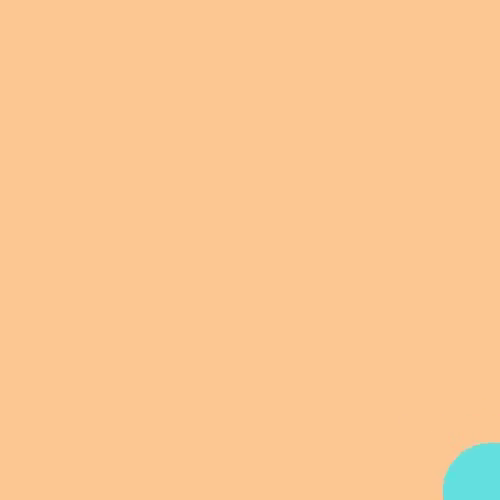

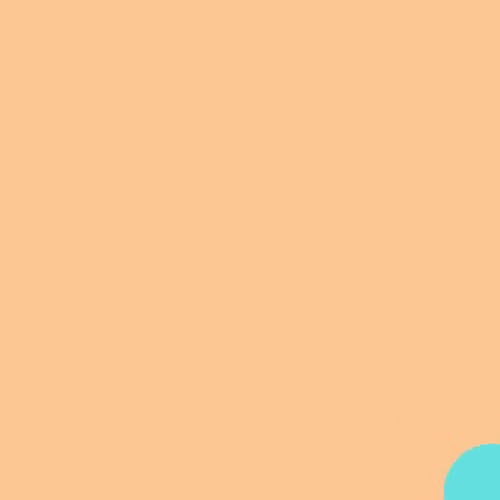

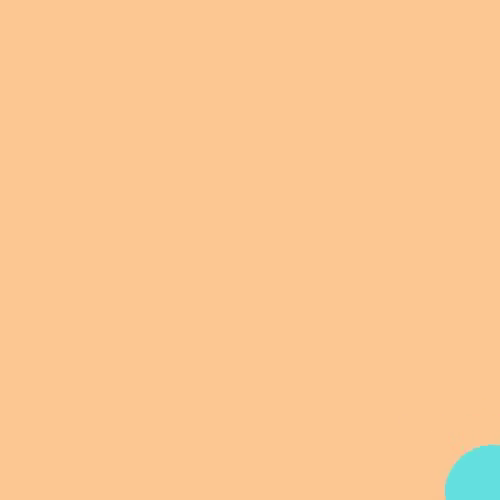

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

# p1 = cv2.VideoCapture(0) # 若需要連接電腦上的第1台攝影機所下的指令_由port決定

p1 = cv2.VideoCapture('v2.mp4')
while p1.isOpened() == True:
    ret, m1=p1.read()
    if ret == True:
        cv2_imshow(m1)
    else:
        break

從載入影片讀出成一張張的動畫，並額外加上文字，重製成新的影片。

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image

p1 = cv2.VideoCapture('v2.mp4')
p2 = cv2.VideoWriter('v3.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 60, (500, 500))
while p1.isOpened() == True:
    ret, m1 = p1.read()
    if ret == True:
        m1 = Image.fromarray(m1)
        ImageDraw.Draw(m1).text((20,25), 'AI資料工程師班', (100,45,255), ImageFont.truetype('Iansui.ttf', 24))
        m1 = np.array(m1)
        p2.write(m1)
        # cv2_imshow(m1)
    else:
        break
p2.release()

影片播放讀取時，取得來源的參數，利用.get設定。

寬： 500.0
高： 500.0
FPS： 60.0
總影格數 490.0
當前播放到的影格： 487.0


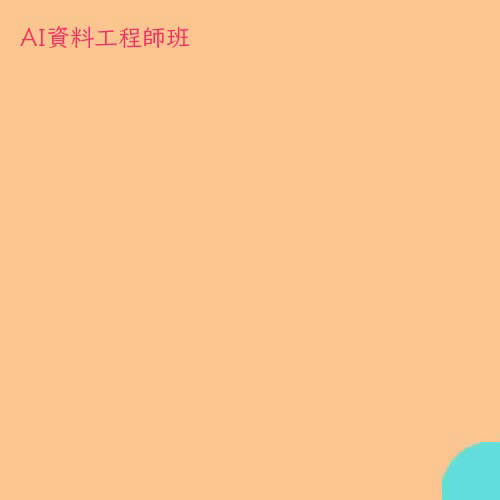

當前播放到的影格： 488.0


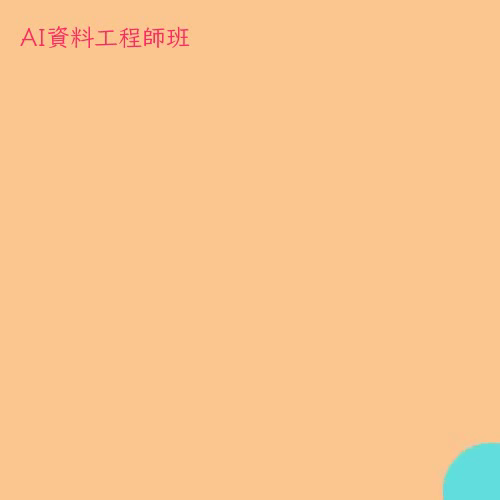

當前播放到的影格： 489.0


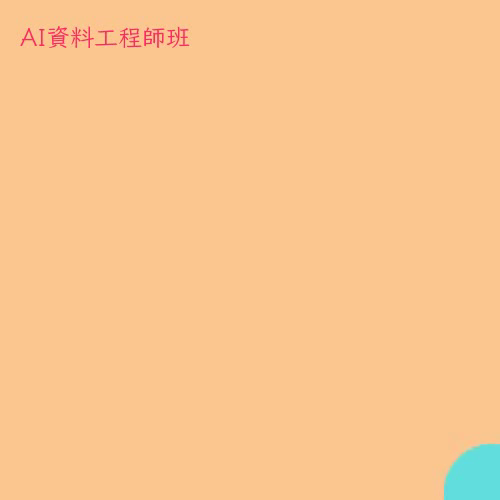

當前播放到的影格： 490.0


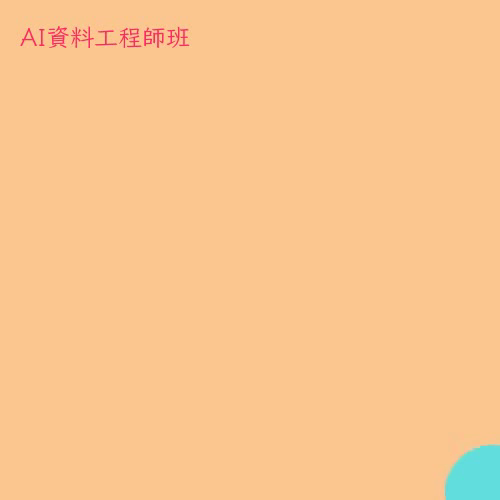

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image

p1 = cv2.VideoCapture('v3.mp4')
print('寬：',p1.get(3))
print('高：',p1.get(4))
print('FPS：',p1.get(5))
print('總影格數',p1.get(7))
p1.set(1,486)
while p1.isOpened() == True:
    ret, m1 = p1.read()
    if ret == True:
        print('當前播放到的影格：',p1.get(1))
        cv2_imshow(m1)
    else:
        break